In [1]:
import matplotlib.pyplot as plt
from simtk.openmm import app
from simtk import openmm, unit
from openeye import oechem
from sys import stdout
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import sys
import string
from rdkit import Chem
import lxml.etree as etree

from simtk.openmm.app import element as elem
from simtk.openmm.app import Topology

import os
import math
import copy
import re
import numpy
import random

from simtk import openmm, unit

import time

import itertools

from rdkit import Chem


import sys
import io
from IPython.nbformat import current
import openeye.oechem
import openeye.oeomega
import openeye.oequacpac

from openeye import oechem, oequacpac
from openeye.oechem import *
from openeye.oedepict import *
from IPython.core.display import Image, display
from openforcefield.typing.engines.smirnoff import forcefield_rdk
from openforcefield.typing.engines import smirnoff
#from openforcefield import *
from openforcefield.utils import *
def RetrieveMol2Block(fileLikeObject, delimiter="@<TRIPOS>MOLECULE"):
    """generator which retrieves one mol2 block at a time
    """
    mol2 = []
    for line in fileLikeObject:
        if line.startswith(delimiter) and mol2:
            yield "".join(mol2)
            mol2 = []
        mol2.append(line)
    if mol2:
        yield "".join(mol2)
# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/utils/")
# #from utils import *
# from utils import get_data_filename, extractPositionsFromOEMol, generateTopologyFromOEMol, extractPositionsFromRDKMol

# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/typing/engines/smirnoff/")
# from forcefield import *
# from forcefield_utils import *

/home/shuwang/anaconda3/envs/oepython3/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/home/shuwang/anaconda3/envs/oepython3/lib/python3.6/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


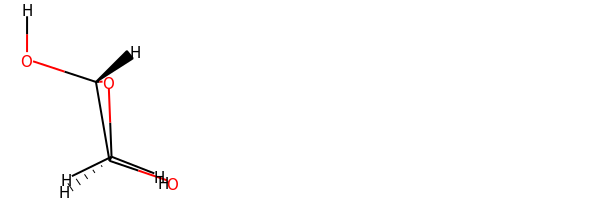

AlkEthOH_r0
     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    0.1466   -0.6972   -1.2190 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1072   -0.7754    0.3061 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.1521    0.7339    0.2375 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.0894    0.7465   -1.1920 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3221   -1.1878    0.9520 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4710    1.1671    0.6094 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.0701   -1.0576   -1.6805 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7173   -1.1199   -1.7408 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7451   -1.3515    0.6836 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6019    1.3396    0.7541 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.1323   -1.1855    1.8998 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4701    2.1287    0.5135 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  4  1  0
  2  3  1  0
  2  5  1  0
  3  4  1  0
  3  6  1  0
  1  7

In [2]:
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2"
ff_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/forcefield/smirnoff99Frosst.ffxml"

mol = Chem.MolFromMol2File(mol_filename, sanitize = True, removeHs = False)
x = Draw.MolsToGridImage([mol])
display(x)

print(Chem.MolToMolBlock(mol))
positions_rdk = extractPositionsFromRDKMol(mol)
#print positions

# atoms = mol.GetAtoms()
# print atoms[0].GetPropsAsDict()
# #print list(atoms[0].GetPropNames())
# atoms[0].SetDoubleProp("PartialCharge", 0.3)
# print atoms[0].GetPropsAsDict()["PartialCharge"]
# [float(a.GetPropsAsDict()["_TriposPartialCharge"]) if "_TriposPartialCharge" in a.GetPropsAsDict() else 0.0 for a in mol.GetAtoms()]

In [3]:

Chem.Draw.MolsToGridImage([mol],molsPerRow=1)


#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)


# Create the OpenMM system
topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(mol)
system_rdk = forcefield.createSystem(topology_rdk, [mol])

#g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology, topology, system, system, positions)

In [4]:
# Load molecule using OpenEye tools
mol = oechem.OEGraphMol()
ifs = oechem.oemolistream(mol_filename)
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
ifs.SetFlavor( oechem.OEFormat_MOL2, flavor)
oechem.OEReadMolecule(ifs, mol )
oechem.OETriposAtomNames(mol)

# Get positions in OpenMM-compatible format
positions_oe = extractPositionsFromOEMol(mol)
#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield.ForceField(ff_filename)


# Create the OpenMM system
topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(mol)
system_oe = forcefield.createSystem(topology_oe, [mol])

g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, skip_assert = True)






Num (type) 	 Num (type) 	 Num (type) 	 Num (type) 	 per 	 phase 	 k0
  0 ( C1)-   1 ( C2)- 	 2 ( C3)- 	   3 ( O1)- 	 3.000000 	 0.000000 	 0.652704 
  0 ( C1)-   1 ( C2)- 	 2 ( C3)- 	   5 ( O3)- 	 3.000000 	 0.000000 	 0.652704 
  0 ( C1)-   1 ( C2)- 	 2 ( C3)- 	   9 ( H4)- 	 3.000000 	 0.000000 	 0.669440 
  0 ( C1)-   1 ( C2)- 	 4 ( O2)- 	  10 ( H5)- 	 3.000000 	 0.000000 	 0.669440 
  0 ( C1)-   1 ( C2)- 	 4 ( O2)- 	  10 ( H5)- 	 1.000000 	 0.000000 	 1.046000 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   1 ( C2)- 	 3.000000 	 0.000000 	 1.602472 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   1 ( C2)- 	 2.000000 	 180.000000 	 0.418400 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   5 ( O3)- 	 3.000000 	 0.000000 	 0.418400 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   5 ( O3)- 	 2.000000 	 180.000000 	 3.556400 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   5 ( O3)- 	 1.000000 	 180.000000 	 5.648400 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   9 ( H4)- 	 3.000000 	 0.000000 	 1.603867 
  1 ( C2)-   0 ( C1)- 	 3 ( O1)- 	   2 ( C3)-

AlkEthOH_r0
     RDKi


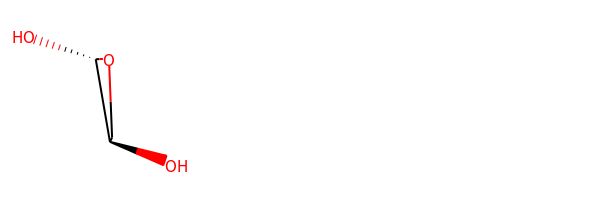

In [5]:

def getNthmol(n):
    counter  = 0
    for i in RetrieveMol2Block(open(mol_filename, "r")):
        if counter == n:
            return i
        counter += 1
        
mol2 = getNthmol(14)
mol2 = getNthmol(0)




# print(mol2)

rdkmol = Chem.MolFromMol2Block(mol2,  removeHs = True)

print (Chem.MolToMolBlock(rdkmol)[0:21])
# Chem.Kekulize(rdkmol)
rdkmol = Chem.Mol(rdkmol)
x = Draw.MolsToGridImage([rdkmol], kekulize = False)
display(x)
    

bond
17.282532556074184 kJ/mol 17.282532556074184 kJ/mol True
angle
11.365731663552795 kJ/mol 11.365731663552795 kJ/mol True
nb
76.51607776743901 kJ/mol 76.51607776743901 kJ/mol True
torsion
26.45095329394137 kJ/mol 27.600523308224005 kJ/mol False
131.61529528100738 kJ/mol 132.76486529529 kJ/mol

DrugBank_85
     RDKi


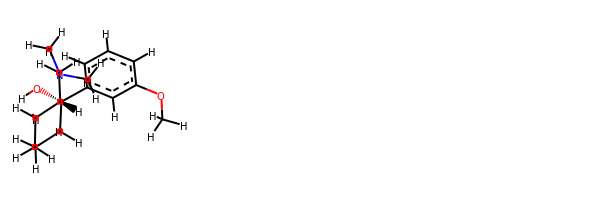

--------
bond
33.9576487733632 kJ/mol 33.9576487733632 kJ/mol True
angle
130.36300729118034 kJ/mol 130.36300729118034 kJ/mol True
nb
45.747529088050115 kJ/mol 45.747529088050115 kJ/mol True
torsion
123.05498340786654 kJ/mol 123.09768238661424 kJ/mol False
333.12316856046016 kJ/mol 333.16586753920785 kJ/mol

DrugBank_95
     RDKi


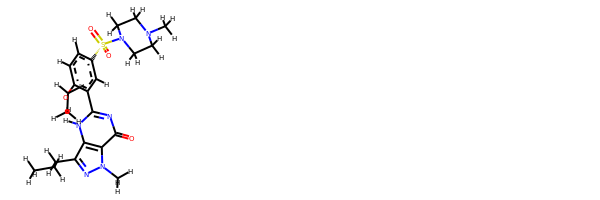

--------
bond
22.31569725903494 kJ/mol 22.31569725903494 kJ/mol True
angle
52.356411780059496 kJ/mol 52.356411780059496 kJ/mol True
nb
36.73843683627454 kJ/mol 36.73843683627454 kJ/mol True
torsion
87.03121338937532 kJ/mol 89.81037319289092 kJ/mol False
198.4417592647443 kJ/mol 201.2209190682599 kJ/mol

DrugBank_96
     RDKi


--------
bond
60.596990979303875 kJ/mol 60.596990979303875 kJ/mol True
angle
150.80556278934074 kJ/mol 150.80556278934074 kJ/mol True
nb
174.5620138147271 kJ/mol 174.5620138147271 kJ/mol True
torsion
108.5459230475558 kJ/mol 124.63285221507093 kJ/mol False
494.5104906309275 kJ/mol 510.5974197984427 kJ/mol

DrugBank_98
     RDKi


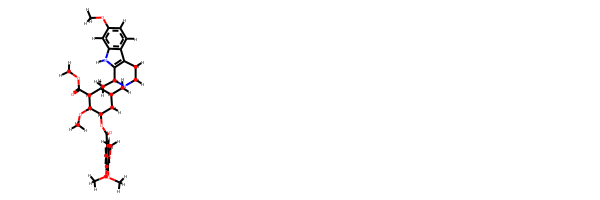

--------
bond
10.385231586688985 kJ/mol 10.385231586688985 kJ/mol True
angle
36.623859584046066 kJ/mol 36.623859584046066 kJ/mol True
nb
23.931123093393253 kJ/mol 23.931123093393253 kJ/mol True
torsion
10.410145889491153 kJ/mol 12.290788400441864 kJ/mol False
81.35036015361945 kJ/mol 83.23100266457016 kJ/mol

DrugBank_100
     RDK


--------
bond
6.967523625305382 kJ/mol 6.967523625305382 kJ/mol True
angle
386.63940951301436 kJ/mol 386.63940951301436 kJ/mol True
nb
20.125049643617768 kJ/mol 20.125049643617768 kJ/mol True
torsion
56.508926070992345 kJ/mol 57.52287239819936 kJ/mol False
470.24090885292986 kJ/mol 471.2548551801369 kJ/mol

DrugBank_108
     RDK


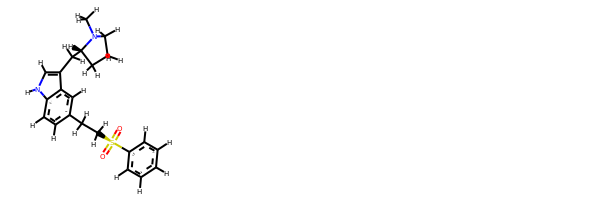

--------
bond
19.828110621407994 kJ/mol 19.828110621407994 kJ/mol True
angle
37.998208975037564 kJ/mol 37.998208975037564 kJ/mol True
nb
99.16048689282097 kJ/mol 99.16048689282097 kJ/mol True
torsion
74.39344077553498 kJ/mol 97.67645547440017 kJ/mol False
231.38024726480154 kJ/mol 254.66326196366668 kJ/mol

DrugBank_112
     RDK


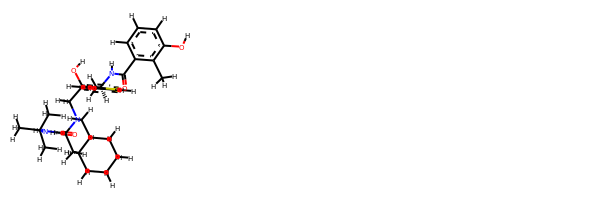

--------
bond
21.093596824328795 kJ/mol 21.093596824328795 kJ/mol True
angle
279.29440227504404 kJ/mol 279.29440227504404 kJ/mol True
nb
68.61192953970529 kJ/mol 68.61192953970529 kJ/mol True
torsion
67.746082264732 kJ/mol 93.95937616597031 kJ/mol False
436.74601090381015 kJ/mol 462.9593048050484 kJ/mol

DrugBank_116
     RDK


--------
bond
28.266047286917324 kJ/mol 28.266047286917324 kJ/mol True
angle
442.251132885777 kJ/mol 442.251132885777 kJ/mol True
nb
-2.4927537112553657 kJ/mol -2.4927537112553657 kJ/mol True
torsion
133.11522521223318 kJ/mol 134.31364734388978 kJ/mol False
601.1396516736722 kJ/mol 602.3380738053288 kJ/mol

DrugBank_121
     RDK


--------
bond
11.257263081398717 kJ/mol 11.257263081398717 kJ/mol True
angle
369.03781830112297 kJ/mol 369.03781830112297 kJ/mol True
nb
55.36670116428864 kJ/mol 55.36670116428864 kJ/mol True
torsion
81.30544478765859 kJ/mol 82.22799470364828 kJ/mol False
516.9672273344689 kJ/mol 517.8897772504586 kJ/mol

DrugBank_137
     RDK


--------
bond
17.913960968773388 kJ/mol 17.913960968773388 kJ/mol True
angle
174.10215018619013 kJ/mol 174.10215018619013 kJ/mol True
nb
42.422270917595334 kJ/mol 42.422270917595334 kJ/mol True
torsion
32.015351806425336 kJ/mol 33.12317983787712 kJ/mol False
266.45373387898417 kJ/mol 267.56156191043596 kJ/mol

DrugBank_138
     RDK


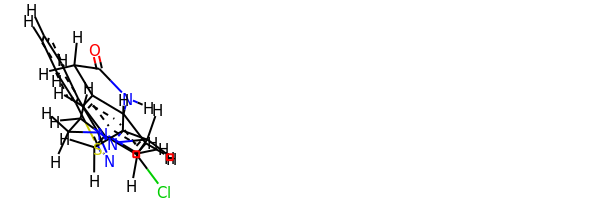

--------
bond
61.95656270521051 kJ/mol 61.95656270521051 kJ/mol True
angle
121.90728270299682 kJ/mol 121.90728270299682 kJ/mol True
nb
73.46568350911065 kJ/mol 73.46568350911065 kJ/mol True
torsion
50.6143502042831 kJ/mol 51.67026353113906 kJ/mol False
307.94387912160107 kJ/mol 308.999792448457 kJ/mol

DrugBank_140
     RDK


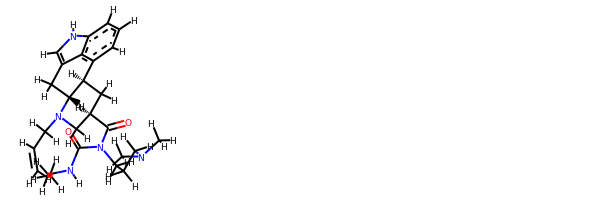

--------
bond
39.52237427255393 kJ/mol 39.52237427255393 kJ/mol True
angle
340.27238134085553 kJ/mol 340.27238134085553 kJ/mol True
nb
132.43682170568658 kJ/mol 132.43682170568658 kJ/mol True
torsion
99.91575302121485 kJ/mol 100.51394977459188 kJ/mol False
612.1473303403109 kJ/mol 612.7455270936879 kJ/mol

DrugBank_143
     RDK


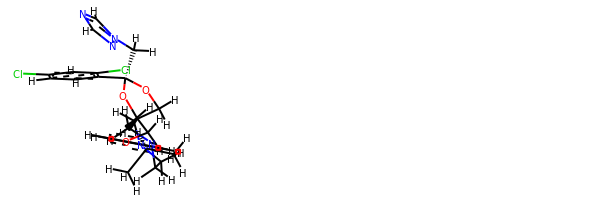

--------
bond
25.009504805323985 kJ/mol 25.009504805323985 kJ/mol True
angle
42.596815940977244 kJ/mol 42.596815940977244 kJ/mol True
nb
163.78758532326486 kJ/mol 163.78758532326486 kJ/mol True
torsion
75.9542378199309 kJ/mol 76.9075614618177 kJ/mol False
307.348143889497 kJ/mol 308.3014675313838 kJ/mol

DrugBank_146
     RDK


--------
bond
28.714014387013997 kJ/mol 28.714014387013997 kJ/mol True
angle
85.57132116198629 kJ/mol 85.57132116198629 kJ/mol True
nb
163.56116494516442 kJ/mol 163.56116494516442 kJ/mol True
torsion
68.3100284162562 kJ/mol 69.29573696079359 kJ/mol False
346.1565289104209 kJ/mol 347.14223745495826 kJ/mol

DrugBank_148
     RDK


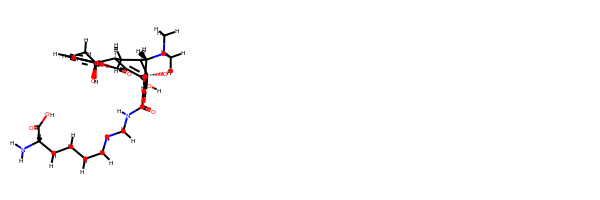

--------
bond
14.699993971481312 kJ/mol 14.699993971481312 kJ/mol True
angle
136.15332518203908 kJ/mol 136.15332518203908 kJ/mol True
nb
32.77770347704402 kJ/mol 32.77770347704402 kJ/mol True
torsion
21.133330284688007 kJ/mol 24.626265212363545 kJ/mol False
204.76435291525243 kJ/mol 208.25728784292795 kJ/mol

DrugBank_160
     RDK


--------
bond
14.530734239506536 kJ/mol 14.530734239506536 kJ/mol True
angle
25.17861098815458 kJ/mol 25.17861098815458 kJ/mol True
nb
91.46327776220095 kJ/mol 91.46327776220095 kJ/mol True
torsion
21.653950061468713 kJ/mol 44.99424587062334 kJ/mol False
152.82657305133077 kJ/mol 176.1668688604854 kJ/mol

DrugBank_173
     RDK


--------
bond
11.176053591365168 kJ/mol 11.176053591365168 kJ/mol True
angle
298.3074564288296 kJ/mol 298.3074564288296 kJ/mol True
nb
91.25663264626031 kJ/mol 91.25663264626031 kJ/mol True
torsion
51.63981875506935 kJ/mol 52.65312869607703 kJ/mol False
452.37996142152446 kJ/mol 453.3932713625321 kJ/mol

DrugBank_175
     RDK


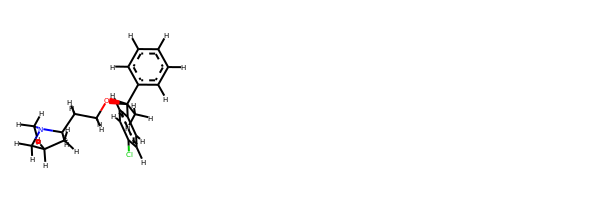

--------
bond
29.755232224794387 kJ/mol 29.755232224794387 kJ/mol True
angle
152.87554962605364 kJ/mol 152.87554962605364 kJ/mol True
nb
36.5596528416054 kJ/mol 36.5596528416054 kJ/mol True
torsion
77.27584189723838 kJ/mol 77.72322750845595 kJ/mol False
296.4662765896918 kJ/mol 296.91366220090936 kJ/mol

DrugBank_187
     RDK


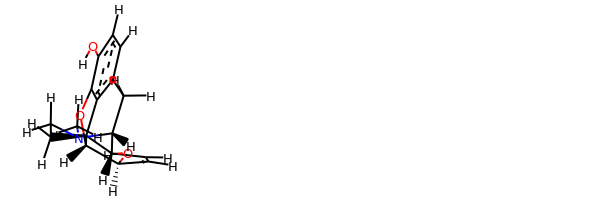

--------
bond
11.668087622987972 kJ/mol 11.668087622987972 kJ/mol True
angle
29.283764973934836 kJ/mol 29.283764973934836 kJ/mol True
nb
51.863662784429216 kJ/mol 51.863662784429216 kJ/mol True
torsion
34.06639450586584 kJ/mol 52.68736533457938 kJ/mol False
126.88190988721786 kJ/mol 145.5028807159314 kJ/mol

DrugBank_188
     RDK


--------
bond
11.717704785962948 kJ/mol 11.717704785962948 kJ/mol True
angle
84.93904388955033 kJ/mol 84.93904388955033 kJ/mol True
nb
35.06072163252959 kJ/mol 35.06072163252959 kJ/mol True
torsion
49.068095389021934 kJ/mol 50.17549800180676 kJ/mol False
180.78556569706478 kJ/mol 181.8929683098496 kJ/mol

DrugBank_190
     RDK


--------
bond
54.38745290713058 kJ/mol 54.38745290713058 kJ/mol True
angle
538.1984095199298 kJ/mol 538.1984095199298 kJ/mol True
nb
234.69560502256746 kJ/mol 234.69560502256746 kJ/mol True
torsion
187.36160658575423 kJ/mol 194.51210189023493 kJ/mol False
1014.6430740353821 kJ/mol 1021.7935693398629 kJ/mol

DrugBank_201
     RDK


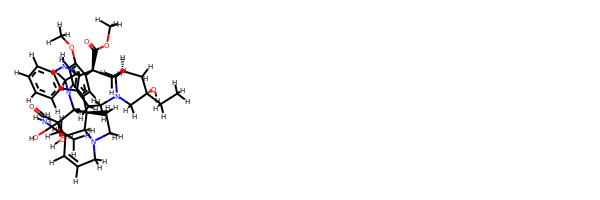

--------
bond
21.17917323943288 kJ/mol 21.17917323943288 kJ/mol True
angle
258.78112352935347 kJ/mol 258.78112352935347 kJ/mol True
nb
12.978405950177601 kJ/mol 12.978405950177601 kJ/mol True
torsion
49.146015694825884 kJ/mol 50.51139459332092 kJ/mol False
342.08471841378986 kJ/mol 343.45009731228487 kJ/mol

DrugBank_207
     RDK


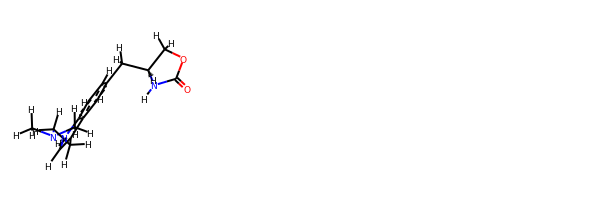

--------
bond
30.66469913258394 kJ/mol 30.66469913258394 kJ/mol True
angle
42.26038356580242 kJ/mol 42.26038356580242 kJ/mol True
nb
63.613188153490974 kJ/mol 63.613188153490974 kJ/mol True
torsion
72.86689443288905 kJ/mol 74.05195134122752 kJ/mol False
209.40516528476638 kJ/mol 210.59022219310486 kJ/mol

DrugBank_209
     RDK


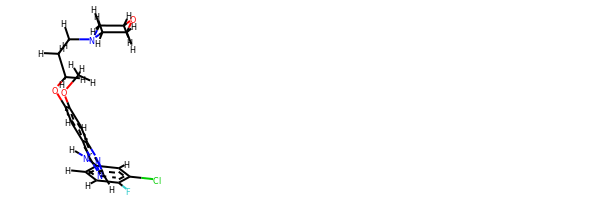

--------
bond
36.02966494187996 kJ/mol 36.02966494187996 kJ/mol True
angle
153.68890672949354 kJ/mol 153.68890672949354 kJ/mol True
nb
56.72706907818975 kJ/mol 56.72706907818975 kJ/mol True
torsion
77.27876219251111 kJ/mol 77.72614780372868 kJ/mol False
323.72440294207433 kJ/mol 324.1717885532919 kJ/mol

DrugBank_210
     RDK


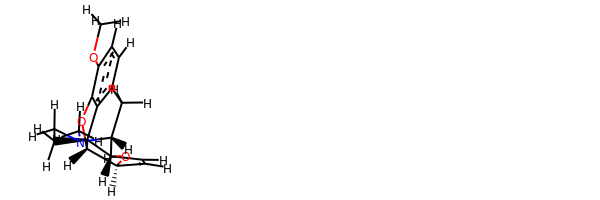

--------
bond
44.509938750047624 kJ/mol 44.509938750047624 kJ/mol True
angle
595.2506941808563 kJ/mol 595.2506941808563 kJ/mol True
nb
73.54568883207014 kJ/mol 73.54568883207014 kJ/mol True
torsion
163.47364761887462 kJ/mol 163.55971164136295 kJ/mol False
876.7799693818487 kJ/mol 876.8660334043369 kJ/mol

DrugBank_212
     RDK


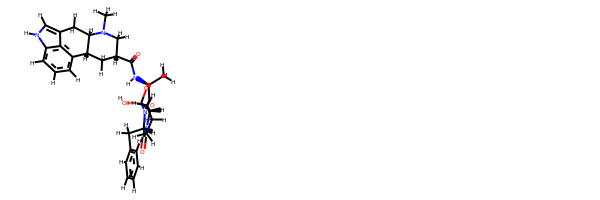

--------
bond
8.75406136589528 kJ/mol 8.75406136589528 kJ/mol True
angle
24.58141125207589 kJ/mol 24.58141125207589 kJ/mol True
nb
53.996411082109184 kJ/mol 53.996411082109184 kJ/mol True
torsion
35.24545530743085 kJ/mol 36.18784607669099 kJ/mol False
122.5773390075112 kJ/mol 123.51972977677133 kJ/mol

DrugBank_213
     RDK


--------
bond
27.336180142134314 kJ/mol 27.336180142134314 kJ/mol True
angle
150.62171449108973 kJ/mol 150.62171449108973 kJ/mol True
nb
34.46007668448264 kJ/mol 34.46007668448264 kJ/mol True
torsion
55.06233047218945 kJ/mol 55.56480784298272 kJ/mol False
267.48030178989615 kJ/mol 267.9827791606894 kJ/mol

DrugBank_219
     RDK


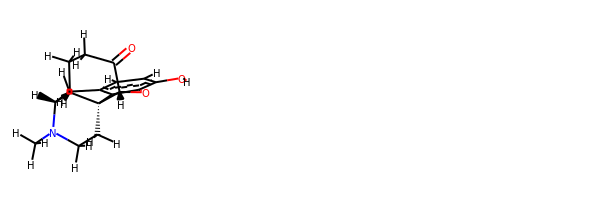

--------
bond
20.05462611885735 kJ/mol 20.05462611885735 kJ/mol True
angle
95.80001139974173 kJ/mol 95.80001139974173 kJ/mol True
nb
27.991688485443344 kJ/mol 27.991688485443344 kJ/mol True
torsion
47.126979210084436 kJ/mol 47.16277287708099 kJ/mol False
190.97330521412687 kJ/mol 191.0090988811234 kJ/mol

DrugBank_225
     RDK


--------
bond
37.11513498469177 kJ/mol 37.11513498469177 kJ/mol True
angle
33.536802740388616 kJ/mol 33.536802740388616 kJ/mol True
nb
83.06077136389071 kJ/mol 83.06077136389071 kJ/mol True
torsion
48.802532367063485 kJ/mol 50.01855297540092 kJ/mol False
202.51524145603457 kJ/mol 203.731262064372 kJ/mol

DrugBank_234
     RDK


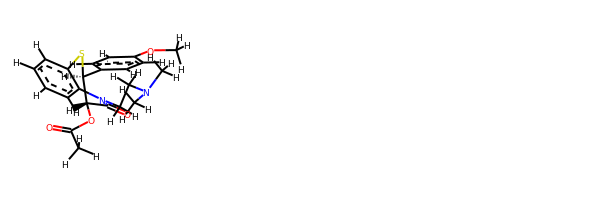

--------
bond
23.984836728191873 kJ/mol 7.0506586181311395 kJ/mol False
angle
13.894080627997416 kJ/mol 13.894080627997416 kJ/mol True
nb
44.44962906554025 kJ/mol 44.44962906554025 kJ/mol True
torsion
17.46828948394222 kJ/mol 17.468287900514525 kJ/mol False
99.79683590567176 kJ/mol 82.86265621218334 kJ/mol

DrugBank_241
     RDK


--------
bond
21.185152093419372 kJ/mol 21.185152093419372 kJ/mol True
angle
119.04003894425138 kJ/mol 119.04003894425138 kJ/mol True
nb
37.470227750235615 kJ/mol 37.470227750235615 kJ/mol True
torsion
30.50739773407832 kJ/mol 31.141627748716385 kJ/mol False
208.2028165219847 kJ/mol 208.83704653662275 kJ/mol

DrugBank_244
     RDK


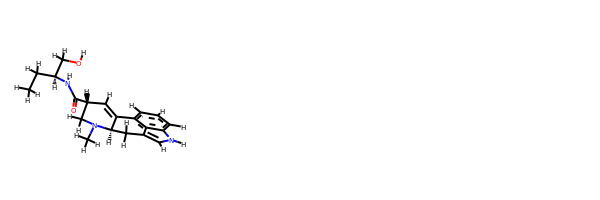

--------
bond
55.84077602136141 kJ/mol 55.84077602136141 kJ/mol True
angle
550.315389271664 kJ/mol 550.315389271664 kJ/mol True
nb
201.4579037935802 kJ/mol 201.4579037935802 kJ/mol True
torsion
150.69401352457166 kJ/mol 155.89200722562092 kJ/mol False
958.3080826111773 kJ/mol 963.5060763122265 kJ/mol

DrugBank_252
     RDK


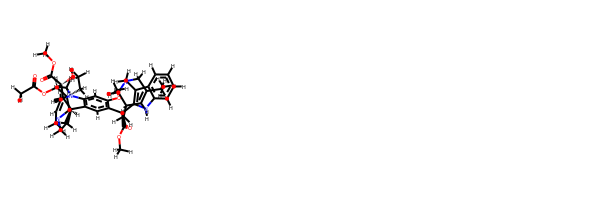

--------
bond
14.188563520428307 kJ/mol 14.188563520428307 kJ/mol True
angle
37.86528920718952 kJ/mol 37.86528920718952 kJ/mol True
nb
41.098554390825264 kJ/mol 41.098554390825264 kJ/mol True
torsion
65.30932757131099 kJ/mol 65.34522523894927 kJ/mol False
158.46173468975408 kJ/mol 158.49763235739235 kJ/mol

DrugBank_254
     RDK


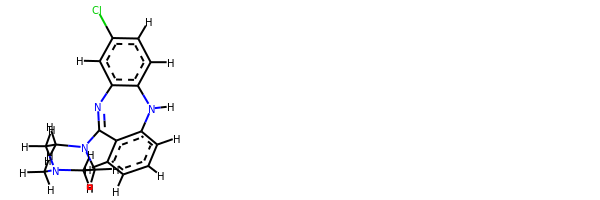

--------
bond
15.88022803048043 kJ/mol 15.88022803048043 kJ/mol True
angle
23.956607123838914 kJ/mol 23.956607123838914 kJ/mol True
nb
94.8057871626111 kJ/mol 94.8057871626111 kJ/mol True
torsion
28.577141111197744 kJ/mol 29.901362712858333 kJ/mol False
163.2197634281282 kJ/mol 164.54398502978876 kJ/mol

DrugBank_263
     RDK


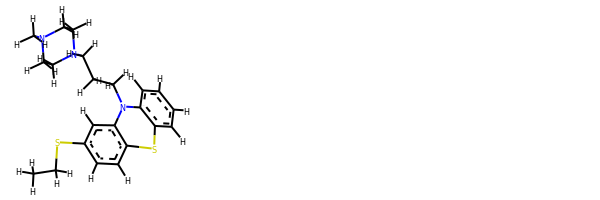

--------
bond
14.873837800209463 kJ/mol 14.873837800209463 kJ/mol True
angle
17.287811375533316 kJ/mol 17.287811375533316 kJ/mol True
nb
219.31270058235995 kJ/mol 219.31270058235995 kJ/mol True
torsion
91.26135122100148 kJ/mol 91.42031227851494 kJ/mol False
342.7357009791042 kJ/mol 342.89466203661766 kJ/mol

DrugBank_268
     RDK


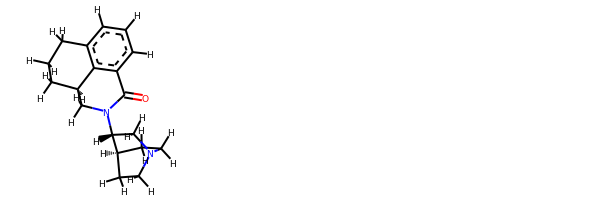

--------
bond
23.503975207145732 kJ/mol 23.503975207145732 kJ/mol True
angle
27.813871466834975 kJ/mol 27.813871466834975 kJ/mol True
nb
72.69636578840297 kJ/mol 72.69636578840297 kJ/mol True
torsion
88.34047843073812 kJ/mol 112.45027742286875 kJ/mol False
212.35469089312178 kJ/mol 236.46448988525245 kJ/mol

DrugBank_271
     RDK


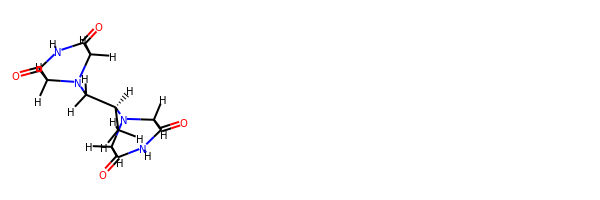

--------
bond
32.84305576490918 kJ/mol 32.84305576490918 kJ/mol True
angle
163.8755187439217 kJ/mol 163.8755187439217 kJ/mol True
nb
77.78993978023648 kJ/mol 77.78993978023648 kJ/mol True
torsion
46.15480900776126 kJ/mol 46.19116168547479 kJ/mol False
320.66332329682865 kJ/mol 320.6996759745422 kJ/mol

DrugBank_292
     RDK


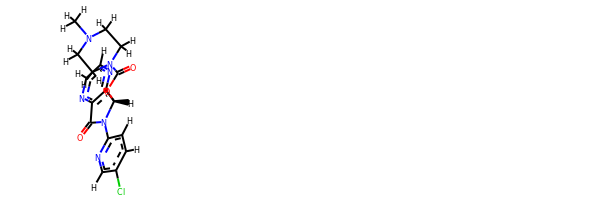

--------
bond
5.689214212526453 kJ/mol 5.689214212526453 kJ/mol True
angle
16.518929559664464 kJ/mol 16.518929559664464 kJ/mol True
nb
43.7335876947767 kJ/mol 43.7335876947767 kJ/mol True
torsion
10.076122533926677 kJ/mol 11.673957371253818 kJ/mol False
76.01785400089429 kJ/mol 77.61568883822144 kJ/mol

DrugBank_295
     RDK


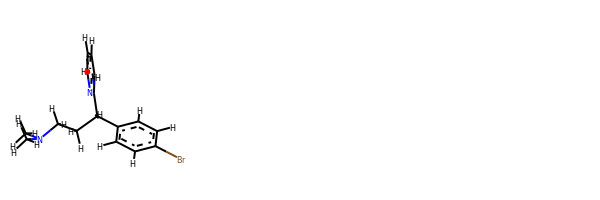

--------
bond
20.32156544927749 kJ/mol 20.32156544927749 kJ/mol True
angle
17.420784092036158 kJ/mol 17.420784092036158 kJ/mol True
nb
41.06280697301752 kJ/mol 41.06280697301752 kJ/mol True
torsion
74.20927693814443 kJ/mol 74.24509849603008 kJ/mol False
153.0144334524756 kJ/mol 153.05025501036124 kJ/mol

DrugBank_297
     RDK


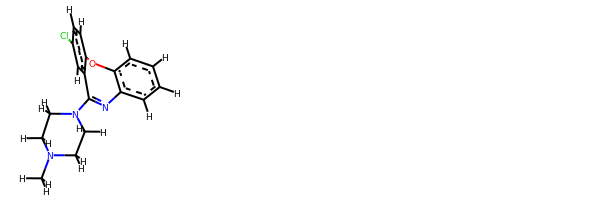

--------
bond
28.92620497344492 kJ/mol 28.92620497344492 kJ/mol True
angle
298.03002481245943 kJ/mol 298.03002481245943 kJ/mol True
nb
21.729347703461546 kJ/mol 21.729347703461546 kJ/mol True
torsion
87.41403274956612 kJ/mol 88.42204651135083 kJ/mol False
436.099610238932 kJ/mol 437.1076240007167 kJ/mol

DrugBank_298
     RDK


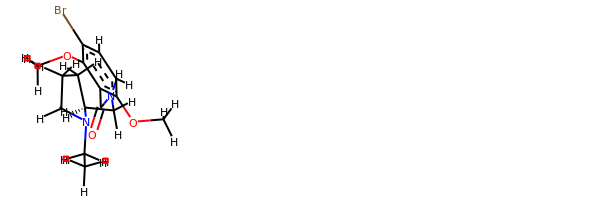

--------
bond
4.516839677792177 kJ/mol 4.516839677792177 kJ/mol True
angle
20.735157074495465 kJ/mol 20.735157074495465 kJ/mol True
nb
34.811090266546614 kJ/mol 34.811090266546614 kJ/mol True
torsion
47.142653364718214 kJ/mol 48.824141282679065 kJ/mol False
107.20574038355247 kJ/mol 108.88722830151332 kJ/mol

DrugBank_308
     RDK


--------
bond
14.17352110841942 kJ/mol 14.17352110841942 kJ/mol True
angle
21.037394700440135 kJ/mol 21.037394700440135 kJ/mol True
nb
65.41245912190303 kJ/mol 65.41245912190303 kJ/mol True
torsion
15.923626836287433 kJ/mol 16.862382564799013 kJ/mol False
116.54700176705 kJ/mol 117.48575749556159 kJ/mol

DrugBank_309
     RDK


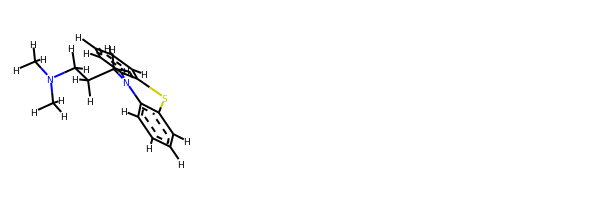

--------
bond
9.399084350845168 kJ/mol 9.399084350845168 kJ/mol True
angle
383.5893963412893 kJ/mol 383.5893963412893 kJ/mol True
nb
46.53671263471301 kJ/mol 46.53671263471301 kJ/mol True
torsion
88.8628148736019 kJ/mol 89.78563558310039 kJ/mol False
528.3880082004493 kJ/mol 529.3108289099478 kJ/mol

DrugBank_313
     RDK


--------
bond
8.109409142553861 kJ/mol 8.109409142553861 kJ/mol True
angle
306.2856725429447 kJ/mol 306.2856725429447 kJ/mol True
nb
27.04191012391415 kJ/mol 27.04191012391415 kJ/mol True
torsion
71.88170885075951 kJ/mol 74.85923934908176 kJ/mol False
413.3187006601722 kJ/mol 416.2962311584945 kJ/mol

DrugBank_316
     RDK


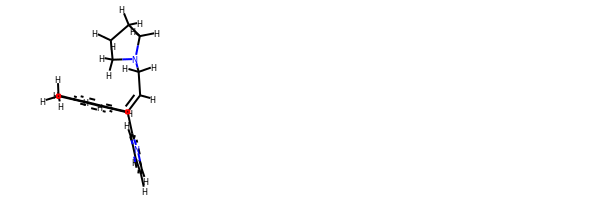

--------
bond
13.346438138279128 kJ/mol 13.346438138279128 kJ/mol True
angle
22.747974904239015 kJ/mol 22.747974904239015 kJ/mol True
nb
69.49255181852632 kJ/mol 69.49255181852632 kJ/mol True
torsion
28.555251525337866 kJ/mol 29.879202306900222 kJ/mol False
134.14221638638233 kJ/mol 135.4661671679447 kJ/mol

DrugBank_322
     RDK


--------
bond
8.613667848776785 kJ/mol 8.613667848776785 kJ/mol True
angle
31.472383997376266 kJ/mol 31.472383997376266 kJ/mol True
nb
96.13543108230472 kJ/mol 96.13543108230472 kJ/mol True
torsion
46.769004053730505 kJ/mol 46.817373861024066 kJ/mol False
182.99048698218826 kJ/mol 183.03885678948183 kJ/mol

DrugBank_323
     RDK


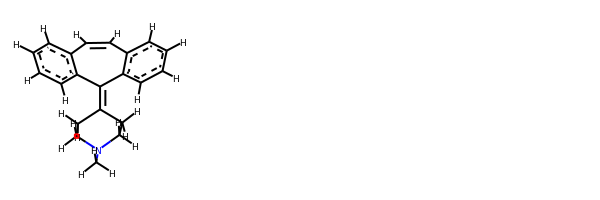

--------
bond
45.38278910616046 kJ/mol 45.38278910616046 kJ/mol True
angle
91.18040029983736 kJ/mol 91.18040029983736 kJ/mol True
nb
78.34756640837176 kJ/mol 78.34756640837176 kJ/mol True
torsion
20.63646388421736 kJ/mol 22.17088755821669 kJ/mol False
235.54721969858696 kJ/mol 237.08164337258629 kJ/mol

DrugBank_339
     RDK


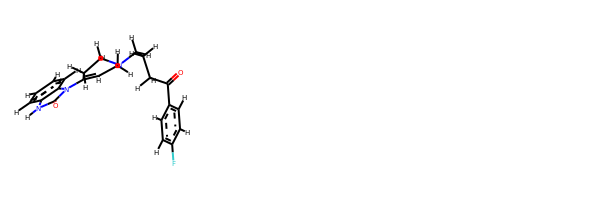

--------
bond
25.733699051464498 kJ/mol 25.733699051464498 kJ/mol True
angle
65.73166403088578 kJ/mol 65.73166403088578 kJ/mol True
nb
221.84767226204752 kJ/mol 221.84767226204752 kJ/mol True
torsion
59.136323501816 kJ/mol 60.12071079374156 kJ/mol False
372.44935884621384 kJ/mol 373.4337461381393 kJ/mol

DrugBank_342
     RDK


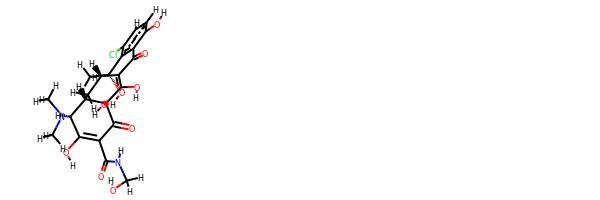

--------
bond
10.497339197082683 kJ/mol 10.497339197082683 kJ/mol True
angle
20.129917052235296 kJ/mol 20.129917052235296 kJ/mol True
nb
52.566742726694685 kJ/mol 52.566742726694685 kJ/mol True
torsion
20.584623888057568 kJ/mol 20.627169645426847 kJ/mol False
103.77862286407023 kJ/mol 103.82116862143951 kJ/mol

DrugBank_343
     RDK


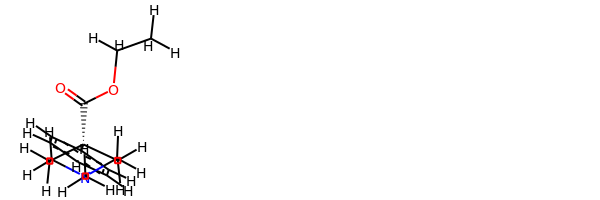

--------
bond
12.761696347930709 kJ/mol 12.761696347930709 kJ/mol True
angle
33.71630172531859 kJ/mol 33.71630172531859 kJ/mol True
nb
61.92547148695725 kJ/mol 61.92547148695725 kJ/mol True
torsion
32.33740910329769 kJ/mol 33.27677943075361 kJ/mol False
140.74087866350425 kJ/mol 141.68024899096014 kJ/mol

DrugBank_347
     RDK


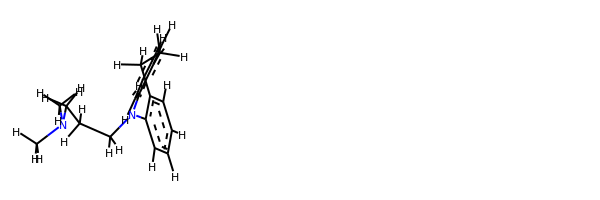

--------
bond
14.813252543894441 kJ/mol 14.813252543894441 kJ/mol True
angle
24.446786880730105 kJ/mol 24.446786880730105 kJ/mol True
nb
115.05278790252194 kJ/mol 115.05278790252194 kJ/mol True
torsion
72.46689728382746 kJ/mol 72.62066308779751 kJ/mol False
226.77972461097394 kJ/mol 226.933490414944 kJ/mol

DrugBank_357
     RDK


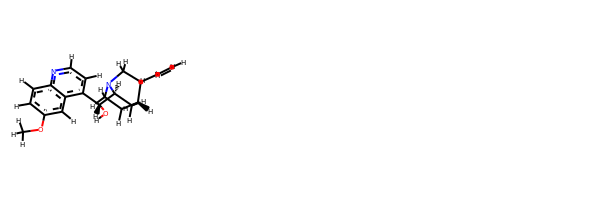

--------
bond
29964.783608035767 kJ/mol 29964.783608035767 kJ/mol True
angle
12.021409253648924 kJ/mol 12.021409253648924 kJ/mol True
nb
46.05461517642205 kJ/mol 43.19435349891394 kJ/mol False
torsion
46.60303346889985 kJ/mol 46.60303346889985 kJ/mol True
30069.462665934734 kJ/mol 30066.602404257228 kJ/mol

DrugBank_364
     RDK


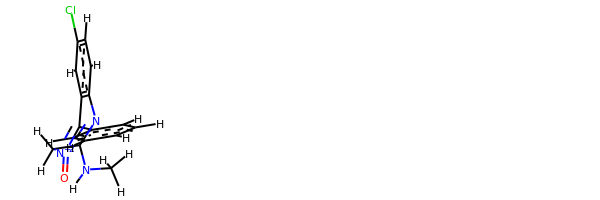

--------
bond
14.186406125285622 kJ/mol 14.186406125285622 kJ/mol True
angle
20.72977065484927 kJ/mol 20.72977065484927 kJ/mol True
nb
63.76105330130859 kJ/mol 63.76105330130859 kJ/mol True
torsion
15.940061580959862 kJ/mol 16.879370838391864 kJ/mol False
114.61729166240335 kJ/mol 115.55660091983535 kJ/mol

DrugBank_366
     RDK


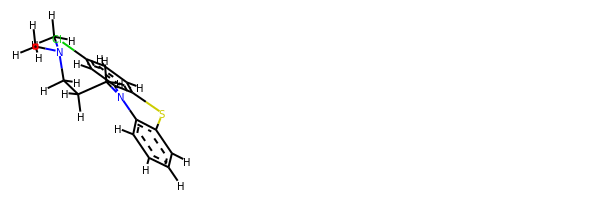

--------
bond
19.13414442666167 kJ/mol 19.13414442666167 kJ/mol True
angle
39.94537441798751 kJ/mol 39.94537441798751 kJ/mol True
nb
50.90458056634562 kJ/mol 50.90458056634562 kJ/mol True
torsion
74.71934680173746 kJ/mol 75.87133294347865 kJ/mol False
184.70344621273227 kJ/mol 185.85543235447346 kJ/mol

DrugBank_370
     RDK


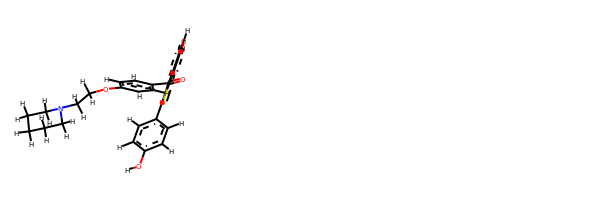

--------
bond
14.176210688808334 kJ/mol 14.176210688808334 kJ/mol True
angle
29.643557741250227 kJ/mol 29.643557741250227 kJ/mol True
nb
76.61652942151791 kJ/mol 76.61652942151791 kJ/mol True
torsion
42.513641577566055 kJ/mol 42.535180551114685 kJ/mol False
162.94993942914255 kJ/mol 162.97147840269116 kJ/mol

DrugBank_376
     RDK


--------
bond
26.829217153920567 kJ/mol 26.829217153920567 kJ/mol True
angle
449.8887359348489 kJ/mol 449.8887359348489 kJ/mol True
nb
79.17183831577553 kJ/mol 79.17183831577553 kJ/mol True
torsion
72.14636849489376 kJ/mol 73.46086963258071 kJ/mol False
628.0361598994388 kJ/mol 629.3506610371257 kJ/mol

DrugBank_379
     RDK


--------
bond
4.730101385865471 kJ/mol 4.730101385865471 kJ/mol True
angle
20.71818162993705 kJ/mol 20.71818162993705 kJ/mol True
nb
33.587502805302094 kJ/mol 33.587502805302094 kJ/mol True
torsion
47.226310763736045 kJ/mol 48.570709354969864 kJ/mol False
106.26209658484066 kJ/mol 107.60649517607447 kJ/mol

DrugBank_380
     RDK


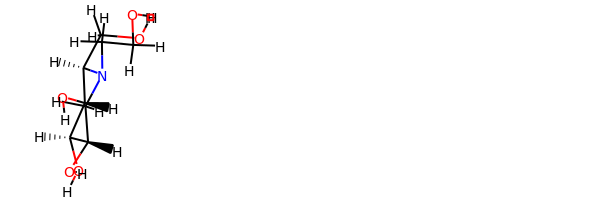

--------
bond
34.09753049806368 kJ/mol 34.09753049806368 kJ/mol True
angle
474.03029958181827 kJ/mol 474.03029958181827 kJ/mol True
nb
149.05428423708702 kJ/mol 149.05428423708702 kJ/mol True
torsion
69.7307043797776 kJ/mol 71.59941409908244 kJ/mol False
726.9128186967466 kJ/mol 728.7815284160514 kJ/mol

DrugBank_385
     RDK


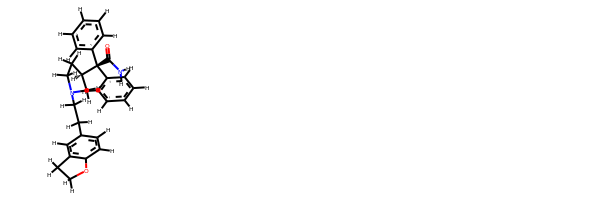

--------
bond
36.10162457607329 kJ/mol 36.10162457607329 kJ/mol True
angle
156.6278085667516 kJ/mol 156.6278085667516 kJ/mol True
nb
62.45145019563548 kJ/mol 62.45145019563548 kJ/mol True
torsion
60.2460973788204 kJ/mol 60.803873647613095 kJ/mol False
315.4269807172808 kJ/mol 315.9847569860735 kJ/mol

DrugBank_386
     RDK


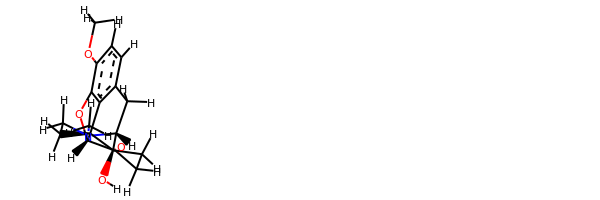

--------
bond
8.562943696187896 kJ/mol 8.562943696187896 kJ/mol True
angle
16.29778262822209 kJ/mol 16.29778262822209 kJ/mol True
nb
60.23388634289084 kJ/mol 60.23388634289084 kJ/mol True
torsion
26.428946999918285 kJ/mol 27.631389578893376 kJ/mol False
111.52355966721912 kJ/mol 112.72600224619421 kJ/mol

DrugBank_391
     RDK


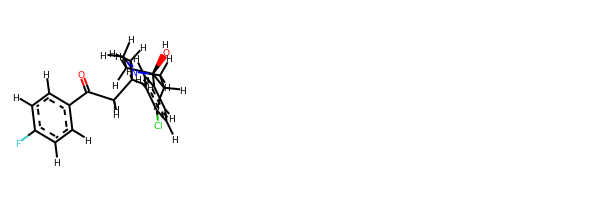

--------
bond
9.127281224045477 kJ/mol 9.127281224045477 kJ/mol True
angle
27.023506249427985 kJ/mol 27.023506249427985 kJ/mol True
nb
45.18076111716768 kJ/mol 45.18076111716768 kJ/mol True
torsion
57.148730412308474 kJ/mol 61.18750036921541 kJ/mol False
138.4802790029496 kJ/mol 142.51904895985655 kJ/mol

DrugBank_393
     RDK


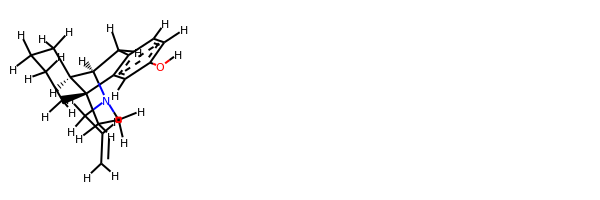

--------
bond
15.555855913815192 kJ/mol 15.555855913815192 kJ/mol True
angle
26.742888792218146 kJ/mol 26.742888792218146 kJ/mol True
nb
68.70691743606693 kJ/mol 68.70691743606693 kJ/mol True
torsion
15.938243524147895 kJ/mol 16.877390404521606 kJ/mol False
126.94390566624816 kJ/mol 127.88305254662188 kJ/mol

DrugBank_396
     RDK


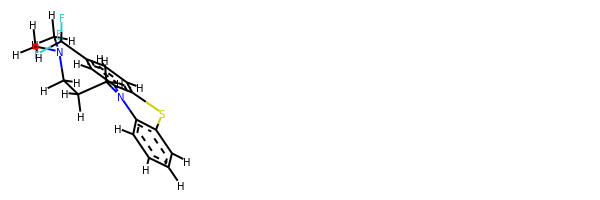

--------
bond
15.26901949553021 kJ/mol 15.26901949553021 kJ/mol True
angle
26.64136591183304 kJ/mol 26.64136591183304 kJ/mol True
nb
67.89344104162842 kJ/mol 67.89344104162842 kJ/mol True
torsion
46.7934079603049 kJ/mol 47.28183589081459 kJ/mol False
156.59723440929656 kJ/mol 157.08566233980628 kJ/mol

DrugBank_401
     RDK


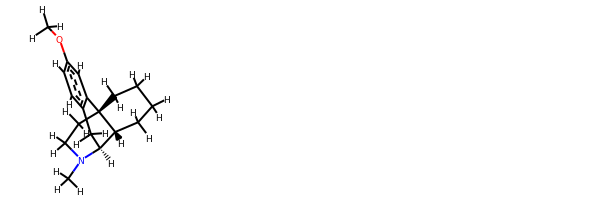

--------
bond
24.872701790637443 kJ/mol 24.872701790637443 kJ/mol True
angle
19.283269986299498 kJ/mol 19.283269986299498 kJ/mol True
nb
110.03573232888232 kJ/mol 110.03573232888232 kJ/mol True
torsion
37.39702757250982 kJ/mol 38.60544075137822 kJ/mol False
191.58873167832908 kJ/mol 192.79714485719748 kJ/mol

DrugBank_414
     RDK


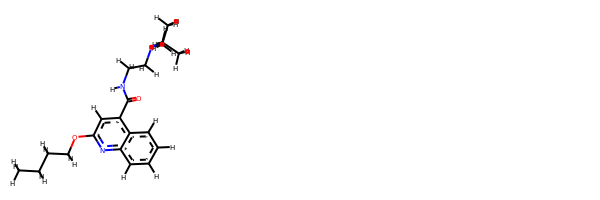

--------
bond
33.808634763934414 kJ/mol 33.808634763934414 kJ/mol True
angle
52.26431375153323 kJ/mol 52.26431375153323 kJ/mol True
nb
35.58813589914608 kJ/mol 35.58813589914608 kJ/mol True
torsion
45.673280882058194 kJ/mol 100.03789462676743 kJ/mol False
167.33436529667193 kJ/mol 221.69897904138116 kJ/mol

DrugBank_425
     RDK


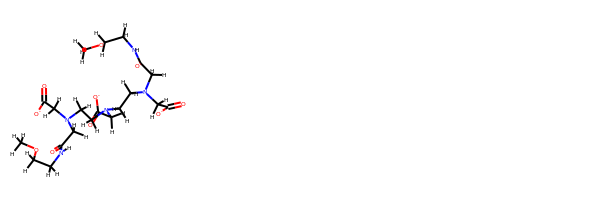

--------
bond
18.761994316615958 kJ/mol 18.761994316615958 kJ/mol True
angle
14.650209358164542 kJ/mol 14.650209358164542 kJ/mol True
nb
44.19149485875691 kJ/mol 44.19149485875691 kJ/mol True
torsion
91.97607989587208 kJ/mol 93.18306242393075 kJ/mol False
169.5797784294095 kJ/mol 170.78676095746818 kJ/mol

DrugBank_426
     RDK


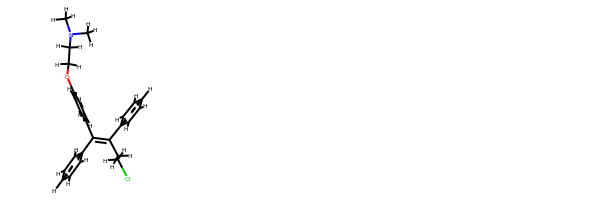

--------
bond
69.05986356833488 kJ/mol 69.05986356833488 kJ/mol True
angle
561.1940580704864 kJ/mol 561.1940580704864 kJ/mol True
nb
235.13117829187317 kJ/mol 235.13117829187317 kJ/mol True
torsion
187.81684653173718 kJ/mol 194.91089324675363 kJ/mol False
1053.2019464624316 kJ/mol 1060.295993177448 kJ/mol

DrugBank_428
     RDK


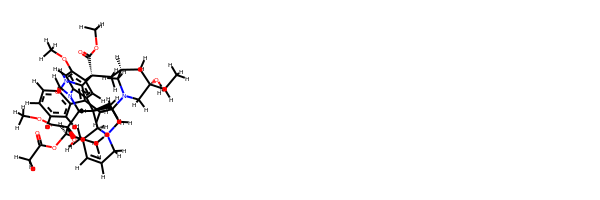

--------
bond
20.101331384774888 kJ/mol 20.101331384774888 kJ/mol True
angle
97.5776611204739 kJ/mol 97.5776611204739 kJ/mol True
nb
54.425891527458326 kJ/mol 54.425891527458326 kJ/mol True
torsion
36.347113996839006 kJ/mol 54.341142130773 kJ/mol False
208.45199802954613 kJ/mol 226.44602616348013 kJ/mol

DrugBank_433
     RDK


--------
bond
37.711970240448004 kJ/mol 37.711970240448004 kJ/mol True
angle
60.39054235067316 kJ/mol 60.39054235067316 kJ/mol True
nb
231.98298535880622 kJ/mol 231.98298535880622 kJ/mol True
torsion
105.8236626615445 kJ/mol 106.79556305034897 kJ/mol False
435.90916061147186 kJ/mol 436.88106100027636 kJ/mol

DrugBank_447
     RDK


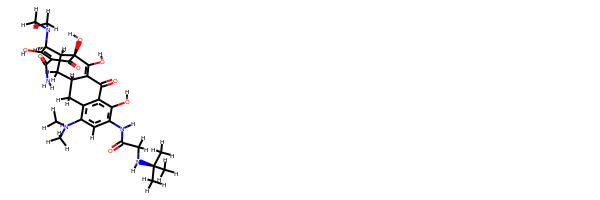

--------
bond
4.193549120224866 kJ/mol 4.193549120224866 kJ/mol True
angle
11.52562783416085 kJ/mol 11.52562783416085 kJ/mol True
nb
98.62680175927835 kJ/mol 98.62680175927835 kJ/mol True
torsion
17.4896439373253 kJ/mol 20.649365131633875 kJ/mol False
131.83562265098936 kJ/mol 134.99534384529795 kJ/mol

DrugBank_455
     RDK


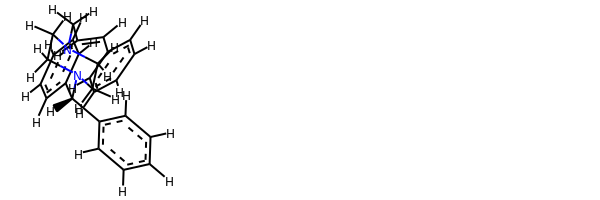

--------
bond
62.72059281250431 kJ/mol 62.72059281250431 kJ/mol True
angle
552.8058230713715 kJ/mol 552.8058230713715 kJ/mol True
nb
244.51190260739523 kJ/mol 244.51190260739523 kJ/mol True
torsion
186.9199123377024 kJ/mol 194.07040764218308 kJ/mol False
1046.9582308289735 kJ/mol 1054.1087261334542 kJ/mol

DrugBank_457
     RDK


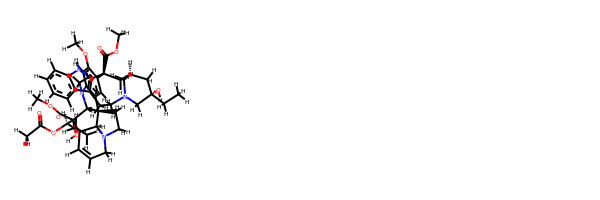

--------
bond
23.901174688294017 kJ/mol 23.901174688294017 kJ/mol True
angle
67.56315129043551 kJ/mol 67.56315129043551 kJ/mol True
nb
9.155012425731606 kJ/mol 9.155012425731606 kJ/mol True
torsion
86.90001160807046 kJ/mol 88.96586173896048 kJ/mol False
187.5193500125316 kJ/mol 189.58520014342162 kJ/mol

DrugBank_472
     RDK


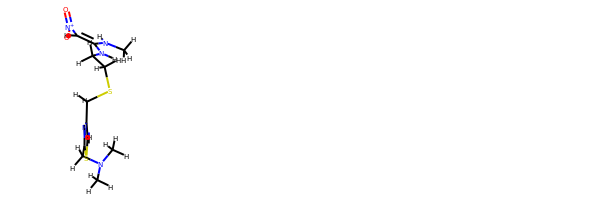

--------
bond
36.536514152804756 kJ/mol 36.536514152804756 kJ/mol True
angle
115.01158369872601 kJ/mol 115.01158369872601 kJ/mol True
nb
42.04831434626334 kJ/mol 42.04831434626334 kJ/mol True
torsion
25.357675829545233 kJ/mol 26.09360860382743 kJ/mol False
218.95408802733934 kJ/mol 219.69002080162153 kJ/mol

DrugBank_476
     RDK


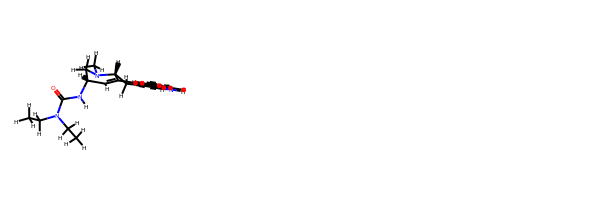

--------
bond
26.1269185453188 kJ/mol 26.1269185453188 kJ/mol True
angle
49.38332188895585 kJ/mol 49.38332188895585 kJ/mol True
nb
166.16117872328348 kJ/mol 166.16117872328348 kJ/mol True
torsion
82.7019204590866 kJ/mol 83.62879616329971 kJ/mol False
324.3733396166447 kJ/mol 325.3002153208579 kJ/mol

DrugBank_482
     RDK


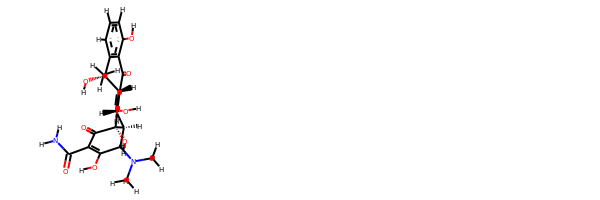

--------
bond
34.9257018250919 kJ/mol 34.9257018250919 kJ/mol True
angle
17.923453330149368 kJ/mol 17.923453330149368 kJ/mol True
nb
51.12543585816401 kJ/mol 51.12543585816401 kJ/mol True
torsion
72.53628686423708 kJ/mol 73.4040783942292 kJ/mol False
176.51087787764237 kJ/mol 177.37866940763448 kJ/mol

DrugBank_491
     RDK


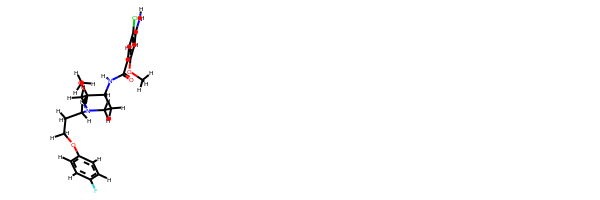

--------
bond
14.61761220145955 kJ/mol 14.61761220145955 kJ/mol True
angle
186.2271547720571 kJ/mol 186.2271547720571 kJ/mol True
nb
53.84526039252659 kJ/mol 53.84526039252659 kJ/mol True
torsion
98.90117426297262 kJ/mol 101.0787333955451 kJ/mol False
353.59120162901587 kJ/mol 355.76876076158834 kJ/mol

DrugBank_498
     RDK


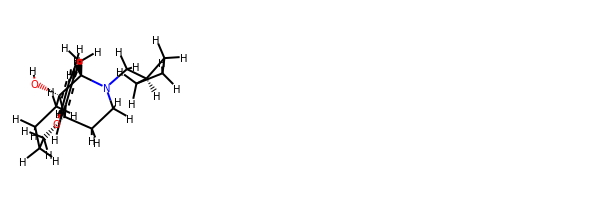

--------
bond
12.312394485414329 kJ/mol 12.312394485414329 kJ/mol True
angle
31.25151999321029 kJ/mol 31.25151999321029 kJ/mol True
nb
117.73349442308407 kJ/mol 117.73349442308407 kJ/mol True
torsion
16.43400082385473 kJ/mol 16.523178220391 kJ/mol False
177.73140972556342 kJ/mol 177.82058712209968 kJ/mol

DrugBank_500
     RDK


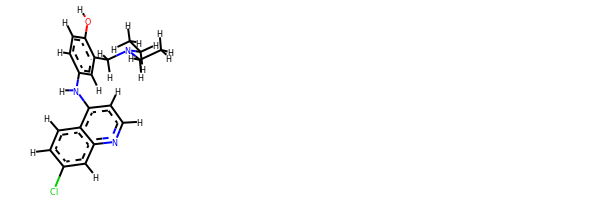

--------
bond
22.397954844211533 kJ/mol 22.397954844211533 kJ/mol True
angle
44.5126629441407 kJ/mol 44.5126629441407 kJ/mol True
nb
156.52110800327378 kJ/mol 156.52110800327378 kJ/mol True
torsion
67.91386061844986 kJ/mol 68.85941219221941 kJ/mol False
291.34558641007584 kJ/mol 292.2911379838454 kJ/mol

DrugBank_505
     RDK


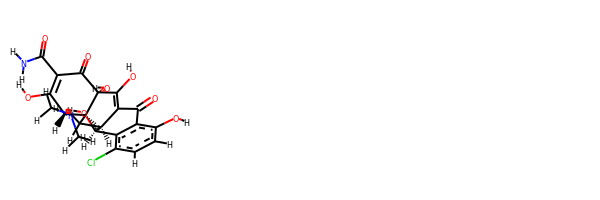

--------
bond
22.845228077284336 kJ/mol 22.845228077284336 kJ/mol True
angle
65.31545608249942 kJ/mol 65.31545608249942 kJ/mol True
nb
142.58892141369165 kJ/mol 142.58892141369165 kJ/mol True
torsion
25.690324777990632 kJ/mol 27.43242324225837 kJ/mol False
256.43993035146605 kJ/mol 258.18202881573376 kJ/mol

DrugBank_506
     RDK


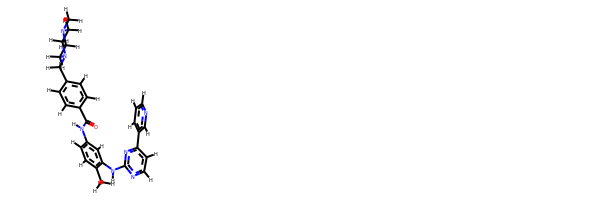

--------
bond
15.300443160280656 kJ/mol 15.300443160280656 kJ/mol True
angle
32.05323335418723 kJ/mol 32.05323335418723 kJ/mol True
nb
75.76672789777682 kJ/mol 75.76672789777682 kJ/mol True
torsion
39.496254735420244 kJ/mol 42.28105442360434 kJ/mol False
162.61665914766496 kJ/mol 165.40145883584904 kJ/mol

DrugBank_510
     RDK


--------
bond
13.873777966827975 kJ/mol 13.873777966827975 kJ/mol True
angle
93.80960167972022 kJ/mol 93.80960167972022 kJ/mol True
nb
64.24961863519216 kJ/mol 64.24961863519216 kJ/mol True
torsion
44.996458572635476 kJ/mol 45.85605619913015 kJ/mol False
216.92945685437581 kJ/mol 217.7890544808705 kJ/mol

DrugBank_524
     RDK


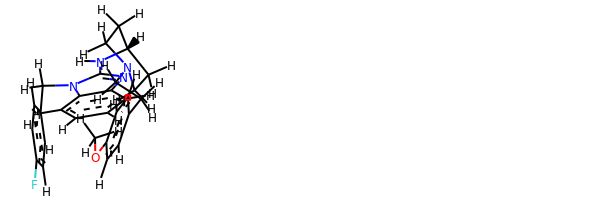

--------
bond
12.159935915684251 kJ/mol 12.159935915684251 kJ/mol True
angle
10.048259174849766 kJ/mol 10.048259174849766 kJ/mol True
nb
55.45766954828305 kJ/mol 55.45766954828305 kJ/mol True
torsion
39.17675756659051 kJ/mol 40.83425276327699 kJ/mol False
116.84262220540758 kJ/mol 118.50011740209406 kJ/mol

DrugBank_532
     RDK


--------
bond
17.506094539865714 kJ/mol 17.506094539865714 kJ/mol True
angle
25.92176777626626 kJ/mol 25.92176777626626 kJ/mol True
nb
130.49761906558308 kJ/mol 130.49761906558308 kJ/mol True
torsion
21.40111401822393 kJ/mol 22.289525180778533 kJ/mol False
195.32659539993898 kJ/mol 196.21500656249358 kJ/mol

DrugBank_534
     RDK


--------
bond
8.60042731601408 kJ/mol 8.60042731601408 kJ/mol True
angle
37.67951549267318 kJ/mol 37.67951549267318 kJ/mol True
nb
58.7928813244887 kJ/mol 58.7928813244887 kJ/mol True
torsion
51.63341387870829 kJ/mol 54.32155704159191 kJ/mol False
156.70623801188424 kJ/mol 159.39438117476786 kJ/mol

DrugBank_539
     RDK


--------
bond
24.294880903287734 kJ/mol 24.294880903287734 kJ/mol True
angle
99.1902127632398 kJ/mol 99.1902127632398 kJ/mol True
nb
37.27595781965966 kJ/mol 37.27595781965966 kJ/mol True
torsion
33.51055971217953 kJ/mol 34.42683801489039 kJ/mol False
194.2716111983667 kJ/mol 195.18788950107756 kJ/mol

DrugBank_543
     RDK


--------
bond
39.920704281397484 kJ/mol 39.920704281397484 kJ/mol True
angle
12.265946330227433 kJ/mol 12.265946330227433 kJ/mol True
nb
76.43936164929441 kJ/mol 76.43936164929441 kJ/mol True
torsion
73.18435659203185 kJ/mol 74.39137894959715 kJ/mol False
201.81036885295117 kJ/mol 203.01739121051648 kJ/mol

DrugBank_549
     RDK


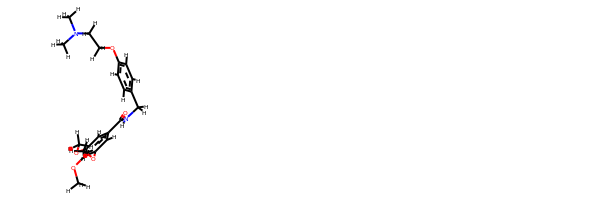

--------
bond
9.706588761194144 kJ/mol 9.706588761194144 kJ/mol True
angle
112.98549383639404 kJ/mol 112.98549383639404 kJ/mol True
nb
13.395121073169076 kJ/mol 13.395121073169076 kJ/mol True
torsion
44.05306638166348 kJ/mol 45.417416961231375 kJ/mol False
180.14027005242073 kJ/mol 181.50462063198862 kJ/mol

DrugBank_556
     RDK


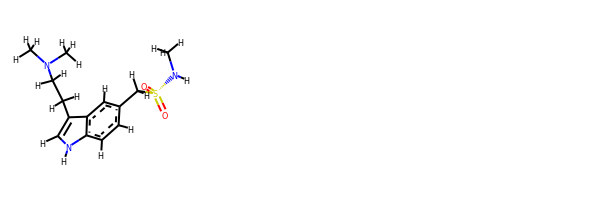

--------
bond
30.87835508886135 kJ/mol 30.87835508886135 kJ/mol True
angle
38.39517918770002 kJ/mol 38.39517918770002 kJ/mol True
nb
71.11115833000889 kJ/mol 71.11115833000889 kJ/mol True
torsion
82.33633706034539 kJ/mol 107.32113561757544 kJ/mol False
222.72102966691565 kJ/mol 247.7058282241457 kJ/mol

DrugBank_557
     RDK


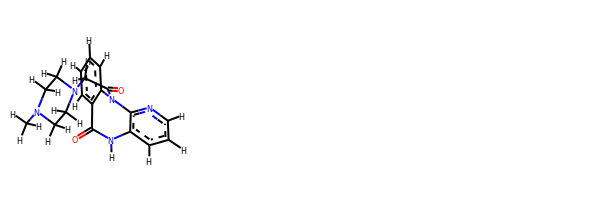

--------
bond
41.345752786102956 kJ/mol 41.345752786102956 kJ/mol True
angle
106.09191046687619 kJ/mol 106.09191046687619 kJ/mol True
nb
34.6599996755543 kJ/mol 34.6599996755543 kJ/mol True
torsion
51.410818375247146 kJ/mol 77.97869892514876 kJ/mol False
233.5084813037806 kJ/mol 260.0763618536822 kJ/mol

DrugBank_560
     RDK


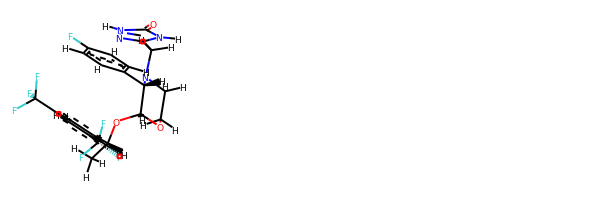

--------
bond
26.474074127860884 kJ/mol 26.474074127860884 kJ/mol True
angle
156.47257786320085 kJ/mol 156.47257786320085 kJ/mol True
nb
39.33003736816145 kJ/mol 39.33003736816145 kJ/mol True
torsion
46.22180680337787 kJ/mol 48.414728025356276 kJ/mol False
268.4984961626011 kJ/mol 270.6914173845795 kJ/mol

DrugBank_561
     RDK


--------
bond
18.60889398530131 kJ/mol 18.60889398530131 kJ/mol True
angle
12.392654598545494 kJ/mol 12.392654598545494 kJ/mol True
nb
47.356519762305545 kJ/mol 47.356519762305545 kJ/mol True
torsion
88.77368660069334 kJ/mol 89.9806196594154 kJ/mol False
167.1317549468457 kJ/mol 168.33868800556775 kJ/mol

DrugBank_562
     RDK


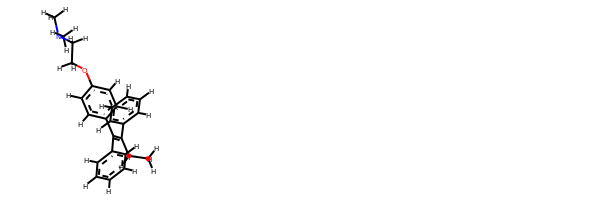

--------
bond
54.36141967771958 kJ/mol 54.36141967771958 kJ/mol True
angle
54.8501310427895 kJ/mol 54.8501310427895 kJ/mol True
nb
96.2785071600888 kJ/mol 96.2785071600888 kJ/mol True
torsion
46.11210167450664 kJ/mol 47.35194553056181 kJ/mol False
251.60215955510452 kJ/mol 252.84200341115968 kJ/mol

DrugBank_567
     RDK


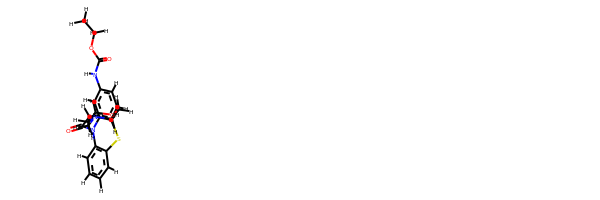

--------
bond
39.66615127002007 kJ/mol 39.66615127002007 kJ/mol True
angle
154.88124694299032 kJ/mol 154.88124694299032 kJ/mol True
nb
30.719371494957755 kJ/mol 30.719371494957755 kJ/mol True
torsion
87.28669119439199 kJ/mol 88.51374581570411 kJ/mol False
312.55346090236014 kJ/mol 313.7805155236722 kJ/mol

DrugBank_575
     RDK


--------
bond
30.068506818535365 kJ/mol 30.068506818535365 kJ/mol True
angle
20.57302657058971 kJ/mol 20.57302657058971 kJ/mol True
nb
109.28033299748824 kJ/mol 109.28033299748824 kJ/mol True
torsion
51.07599129786846 kJ/mol 52.389757036596414 kJ/mol False
210.99785768448177 kJ/mol 212.31162342320974 kJ/mol

DrugBank_577
     RDK


--------
bond
44.05301534940419 kJ/mol 44.05301534940419 kJ/mol True
angle
600.330215232476 kJ/mol 600.330215232476 kJ/mol True
nb
69.38278222371338 kJ/mol 69.38278222371338 kJ/mol True
torsion
165.10914964034933 kJ/mol 165.74400584037969 kJ/mol False
878.8751624459428 kJ/mol 879.5100186459733 kJ/mol

DrugBank_583
     RDK


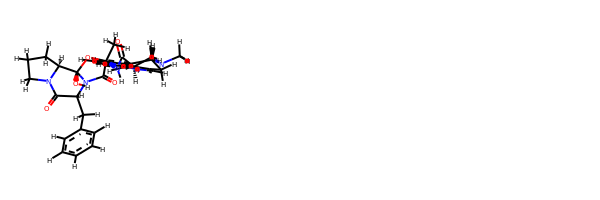

--------
bond
34.51410243885583 kJ/mol 34.51410243885583 kJ/mol True
angle
118.66825128725802 kJ/mol 118.66825128725802 kJ/mol True
nb
125.8881717735058 kJ/mol 125.8881717735058 kJ/mol True
torsion
27.86539044713788 kJ/mol 27.950841948630575 kJ/mol False
306.9359159467575 kJ/mol 307.0213674482502 kJ/mol

DrugBank_586
     RDK


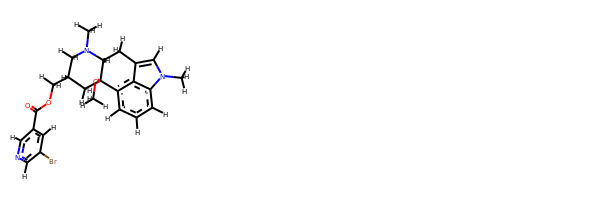

--------
bond
33.79754601798899 kJ/mol 33.79754601798899 kJ/mol True
angle
158.18322133321905 kJ/mol 158.18322133321905 kJ/mol True
nb
42.55618912745651 kJ/mol 42.55618912745651 kJ/mol True
torsion
209.40085796073222 kJ/mol 211.3812422818291 kJ/mol False
443.9378144393968 kJ/mol 445.9181987604936 kJ/mol

DrugBank_590
     RDK


--------
bond
41.75581577135688 kJ/mol 41.75581577135688 kJ/mol True
angle
46.14446392754754 kJ/mol 46.14446392754754 kJ/mol True
nb
188.54556994598667 kJ/mol 188.54556994598667 kJ/mol True
torsion
63.848749193320806 kJ/mol 65.10968741755406 kJ/mol False
340.29459883821187 kJ/mol 341.5555370624452 kJ/mol

DrugBank_594
     RDK


--------
bond
14.428141333646627 kJ/mol 14.428141333646627 kJ/mol True
angle
65.27626642008809 kJ/mol 65.27626642008809 kJ/mol True
nb
18.00506435401955 kJ/mol 18.00506435401955 kJ/mol True
torsion
22.187359539459184 kJ/mol 24.589117626785974 kJ/mol False
119.89683164721345 kJ/mol 122.29858973454024 kJ/mol

DrugBank_596
     RDK


--------
bond
23.91686026596526 kJ/mol 23.91686026596526 kJ/mol True
angle
15.0930625337552 kJ/mol 15.0930625337552 kJ/mol True
nb
30.679580595515343 kJ/mol 30.679580595515343 kJ/mol True
torsion
31.373383583003253 kJ/mol 31.419074523232947 kJ/mol False
101.06288697823905 kJ/mol 101.10857791846875 kJ/mol

DrugBank_597
     RDK


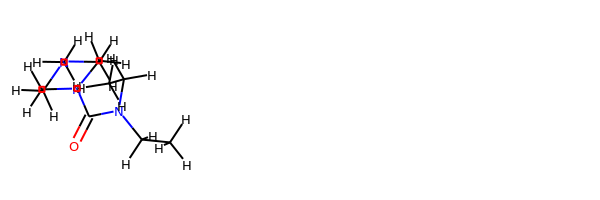

--------
bond
6.5833200159590035 kJ/mol 6.5833200159590035 kJ/mol True
angle
13.714579328517045 kJ/mol 13.714579328517045 kJ/mol True
nb
70.0345957124424 kJ/mol 70.0345957124424 kJ/mol True
torsion
13.19510121425048 kJ/mol 13.525644977952961 kJ/mol False
103.52759627116893 kJ/mol 103.85814003487141 kJ/mol

DrugBank_600
     RDK


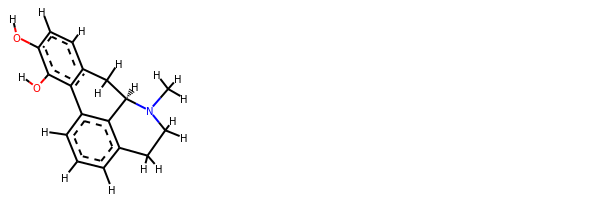

--------
bond
14.880641046218095 kJ/mol 14.880641046218095 kJ/mol True
angle
36.64676382809254 kJ/mol 36.64676382809254 kJ/mol True
nb
159.35498212698994 kJ/mol 159.35498212698994 kJ/mol True
torsion
33.7642654576369 kJ/mol 33.81260297336514 kJ/mol False
244.64665245893747 kJ/mol 244.6949899746657 kJ/mol

DrugBank_605
     RDK


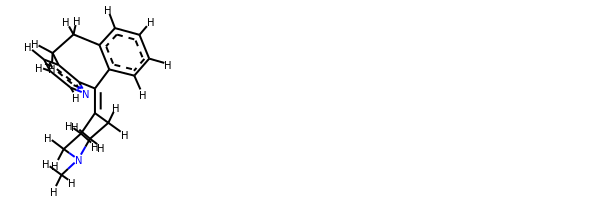

--------
bond
13.11162988319031 kJ/mol 13.11162988319031 kJ/mol True
angle
13.16394865602649 kJ/mol 13.16394865602649 kJ/mol True
nb
90.36006279326324 kJ/mol 90.36006279326324 kJ/mol True
torsion
26.226298521241457 kJ/mol 27.435750240614937 kJ/mol False
142.86193985372148 kJ/mol 144.07139157309499 kJ/mol

DrugBank_607
     RDK


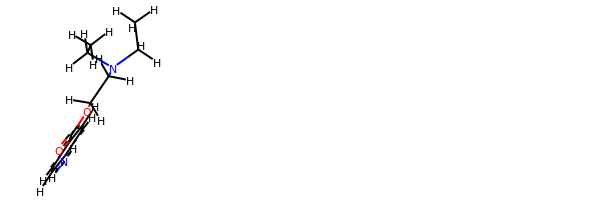

--------
bond
47.09622651335231 kJ/mol 47.09622651335231 kJ/mol True
angle
678.6315456926656 kJ/mol 678.6315456926656 kJ/mol True
nb
1153.0762178003283 kJ/mol 1153.0762178003283 kJ/mol True
torsion
220.99970291067774 kJ/mol 221.06174336344344 kJ/mol False
2099.803692917024 kJ/mol 2099.8657333697897 kJ/mol

DrugBank_614
     RDK


--------
bond
26.01974031271928 kJ/mol 26.01974031271928 kJ/mol True
angle
115.95975506624845 kJ/mol 115.95975506624845 kJ/mol True
nb
70.13014180163643 kJ/mol 70.13014180163643 kJ/mol True
torsion
32.270660189218084 kJ/mol 33.539936300012926 kJ/mol False
244.38029736982224 kJ/mol 245.64957348061708 kJ/mol

DrugBank_620
     RDK


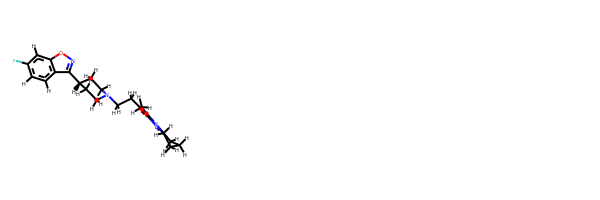

--------
bond
5.289993623324362 kJ/mol 5.289993623324362 kJ/mol True
angle
10.077369284716184 kJ/mol 10.077369284716184 kJ/mol True
nb
61.87743591536541 kJ/mol 61.87743591536541 kJ/mol True
torsion
3.959597564911839 kJ/mol 5.42516633362819 kJ/mol False
81.2043963883178 kJ/mol 82.66996515703414 kJ/mol

DrugBank_621
     RDK


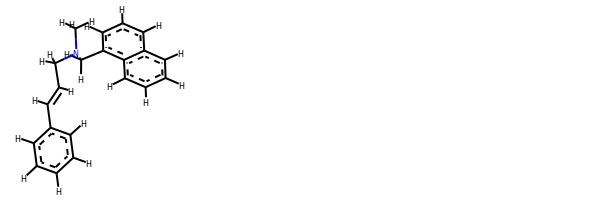

--------
bond
24.988455932012343 kJ/mol 24.988455932012343 kJ/mol True
angle
330.77267205877314 kJ/mol 330.77267205877314 kJ/mol True
nb
51.524872860080265 kJ/mol 51.524872860080265 kJ/mol True
torsion
93.50934394264435 kJ/mol 94.00443631693464 kJ/mol False
500.79534479351014 kJ/mol 501.2904371678004 kJ/mol

DrugBank_633
     RDK


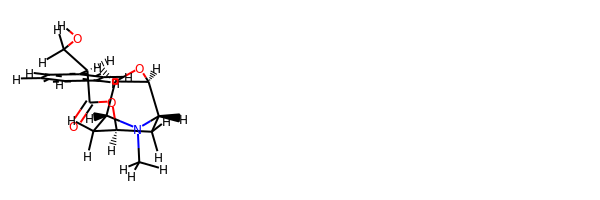

--------
bond
104.47513517976978 kJ/mol 104.47513517976978 kJ/mol True
angle
550.0583885323869 kJ/mol 550.0583885323869 kJ/mol True
nb
151.87323163389257 kJ/mol 151.87323163389257 kJ/mol True
torsion
104.26012537398175 kJ/mol 107.98101465614911 kJ/mol False
910.666880720031 kJ/mol 914.3877700021984 kJ/mol

DrugBank_643
     RDK


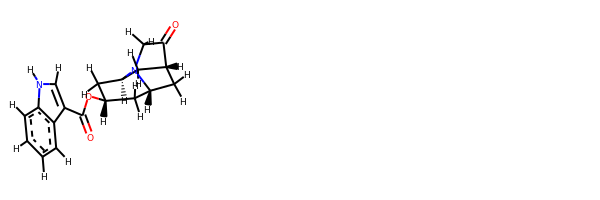

--------
bond
16.070346917342782 kJ/mol 16.070346917342782 kJ/mol True
angle
45.831976561519696 kJ/mol 45.831976561519696 kJ/mol True
nb
49.817019605378896 kJ/mol 49.817019605378896 kJ/mol True
torsion
10.242264835597574 kJ/mol 11.824392123168522 kJ/mol False
121.96160791983894 kJ/mol 123.5437352074099 kJ/mol

DrugBank_644
     RDK


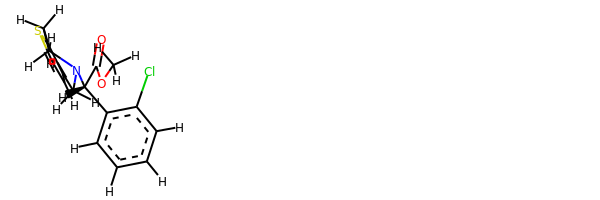

--------
bond
23.082094098706524 kJ/mol 23.082094098706524 kJ/mol True
angle
46.03150426588332 kJ/mol 46.03150426588332 kJ/mol True
nb
162.97623828321866 kJ/mol 162.97623828321866 kJ/mol True
torsion
74.04853546293171 kJ/mol 75.03432497908736 kJ/mol False
306.1383721107402 kJ/mol 307.1241616268959 kJ/mol

DrugBank_645
     RDK


--------
bond
53.27790209004871 kJ/mol 53.27790209004871 kJ/mol True
angle
186.23955507023575 kJ/mol 186.23955507023575 kJ/mol True
nb
151.08034379308052 kJ/mol 151.08034379308052 kJ/mol True
torsion
79.49614738665643 kJ/mol 79.52595545171444 kJ/mol False
470.09394834002137 kJ/mol 470.12375640507946 kJ/mol

DrugBank_648
     RDK


--------
bond
22.676021936208453 kJ/mol 22.676021936208453 kJ/mol True
angle
29.06142276297983 kJ/mol 29.06142276297983 kJ/mol True
nb
67.32642125875651 kJ/mol 67.32642125875651 kJ/mol True
torsion
49.46965311156758 kJ/mol 50.4113481648449 kJ/mol False
168.53351906951238 kJ/mol 169.4752141227897 kJ/mol

DrugBank_654
     RDK


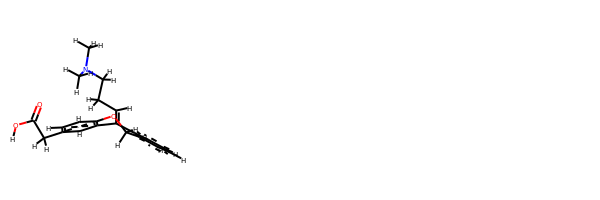

--------
bond
29.92971811404598 kJ/mol 29.92971811404598 kJ/mol True
angle
379.0703050030005 kJ/mol 379.0703050030005 kJ/mol True
nb
181.69235868901887 kJ/mol 181.69235868901887 kJ/mol True
torsion
103.77960756704339 kJ/mol 103.854666377348 kJ/mol False
694.4719893731087 kJ/mol 694.5470481834134 kJ/mol

DrugBank_655
     RDK


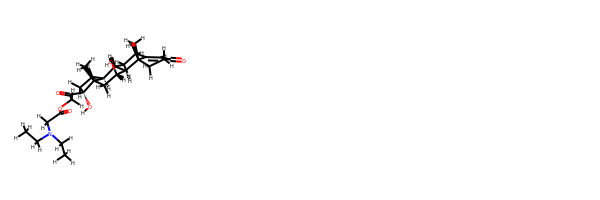

--------
bond
10.899422541865915 kJ/mol 10.899422541865915 kJ/mol True
angle
54.454210415713064 kJ/mol 54.454210415713064 kJ/mol True
nb
45.6883490981999 kJ/mol 45.6883490981999 kJ/mol True
torsion
37.4931775767677 kJ/mol 51.443950283779216 kJ/mol False
148.53515963254657 kJ/mol 162.4859323395581 kJ/mol

DrugBank_674
     RDK


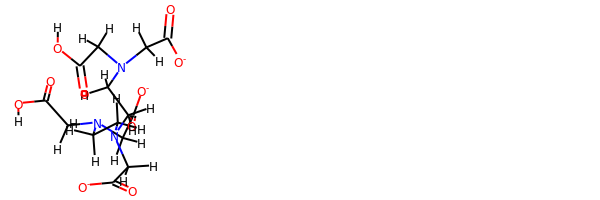

--------
bond
5.887935246951285 kJ/mol 5.887935246951285 kJ/mol True
angle
12.5654765531103 kJ/mol 12.5654765531103 kJ/mol True
nb
51.556474605868964 kJ/mol 51.556474605868964 kJ/mol True
torsion
22.887949140182336 kJ/mol 24.07206493322959 kJ/mol False
92.89783554611287 kJ/mol 94.08195133916013 kJ/mol

DrugBank_677
     RDK


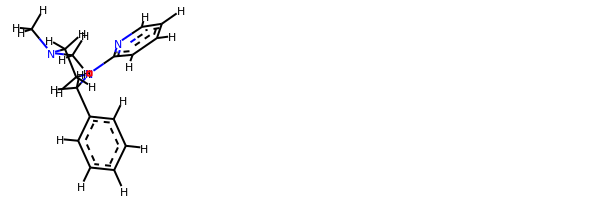

--------
bond
53.546459741071956 kJ/mol 53.546459741071956 kJ/mol True
angle
96.45468753599918 kJ/mol 96.45468753599918 kJ/mol True
nb
67.83425433252378 kJ/mol 67.83425433252378 kJ/mol True
torsion
78.7688904081475 kJ/mol 80.0547821776576 kJ/mol False
296.6042920177424 kJ/mol 297.89018378725257 kJ/mol

DrugBank_687
     RDK


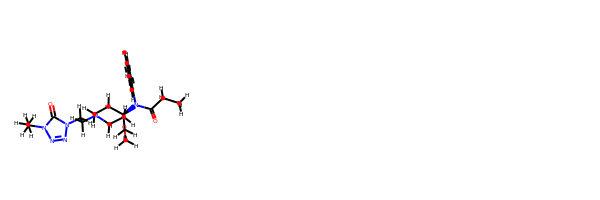

--------
bond
12.16693312134635 kJ/mol 12.16693312134635 kJ/mol True
angle
27.575396073597037 kJ/mol 27.575396073597037 kJ/mol True
nb
154.54780355406913 kJ/mol 154.54780355406913 kJ/mol True
torsion
64.78993921715993 kJ/mol 65.98783729349238 kJ/mol False
259.08007196617245 kJ/mol 260.2779700425049 kJ/mol

DrugBank_689
     RDK


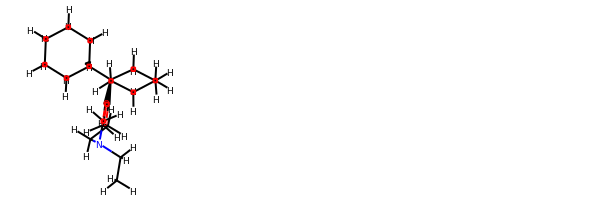

--------
bond
16.872328767516553 kJ/mol 16.872328767516553 kJ/mol True
angle
13.79974540723762 kJ/mol 13.79974540723762 kJ/mol True
nb
58.70313607914994 kJ/mol 58.70313607914994 kJ/mol True
torsion
34.26723714446883 kJ/mol 35.21643510904263 kJ/mol False
123.64244739837295 kJ/mol 124.59164536294674 kJ/mol

DrugBank_690
     RDK


--------
bond
20.873143744050676 kJ/mol 20.873143744050676 kJ/mol True
angle
16.2324852134552 kJ/mol 16.2324852134552 kJ/mol True
nb
92.11658633786749 kJ/mol 92.11658633786749 kJ/mol True
torsion
53.54525478857315 kJ/mol 54.754151118431835 kJ/mol False
182.7674700839465 kJ/mol 183.97636641380518 kJ/mol

DrugBank_692
     RDK


--------
bond
31.24490665384183 kJ/mol 31.24490665384183 kJ/mol True
angle
15.431866999788879 kJ/mol 15.431866999788879 kJ/mol True
nb
58.37157251521944 kJ/mol 58.37157251521944 kJ/mol True
torsion
54.959844163119804 kJ/mol 56.195987364499466 kJ/mol False
160.00819033196996 kJ/mol 161.24433353334962 kJ/mol

DrugBank_698
     RDK


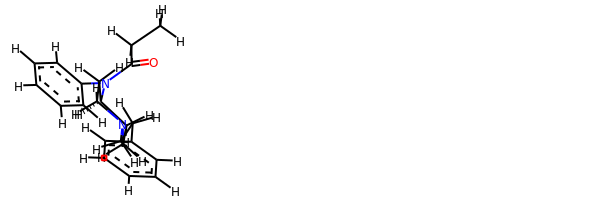

--------
bond
14.70690482460255 kJ/mol 14.70690482460255 kJ/mol True
angle
28.747612038283613 kJ/mol 28.747612038283613 kJ/mol True
nb
73.81233170991224 kJ/mol 73.81233170991224 kJ/mol True
torsion
28.55513414515137 kJ/mol 29.878602062506772 kJ/mol False
145.82198271794977 kJ/mol 147.14545063530517 kJ/mol

DrugBank_716
     RDK


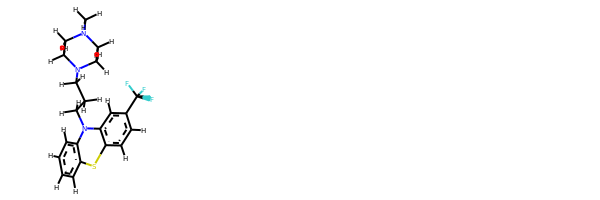

--------
bond
32.553162993892656 kJ/mol 32.553162993892656 kJ/mol True
angle
28.43160857226726 kJ/mol 28.43160857226726 kJ/mol True
nb
112.7550635451733 kJ/mol 112.7550635451733 kJ/mol True
torsion
31.403530911854066 kJ/mol 33.02041821247995 kJ/mol False
205.1433660231873 kJ/mol 206.76025332381317 kJ/mol

DrugBank_721
     RDK


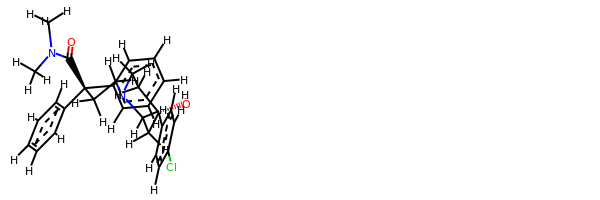

--------
bond
38.06631327044899 kJ/mol 38.06631327044899 kJ/mol True
angle
324.5055245659652 kJ/mol 324.5055245659652 kJ/mol True
nb
48.1160793500107 kJ/mol 48.1160793500107 kJ/mol True
torsion
130.16046455938536 kJ/mol 132.21775171675145 kJ/mol False
540.8483817458102 kJ/mol 542.9056689031763 kJ/mol

DrugBank_728
     RDK


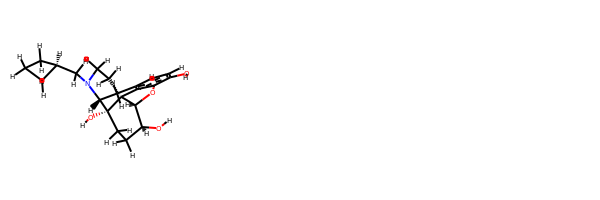

--------
bond
13.951138169676438 kJ/mol 13.951138169676438 kJ/mol True
angle
26.029780654549857 kJ/mol 26.029780654549857 kJ/mol True
nb
71.52666861876327 kJ/mol 71.52666861876327 kJ/mol True
torsion
39.498938420804784 kJ/mol 42.284324569340534 kJ/mol False
151.00652586379434 kJ/mol 153.7919120123301 kJ/mol

DrugBank_734
     RDK


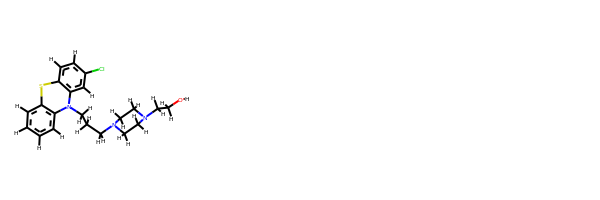

--------
bond
8.264397050904158 kJ/mol 8.264397050904158 kJ/mol True
angle
24.276192752827022 kJ/mol 24.276192752827022 kJ/mol True
nb
44.48322685971899 kJ/mol 44.48322685971899 kJ/mol True
torsion
54.33410209894279 kJ/mol 55.785309263942324 kJ/mol False
131.35791876239296 kJ/mol 132.8091259273925 kJ/mol

DrugBank_738
     RDK


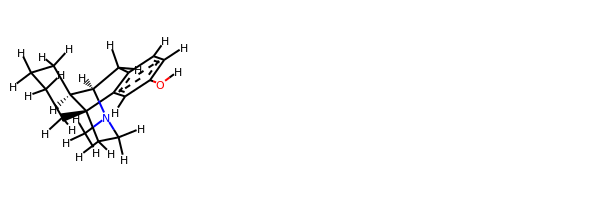

--------
bond
6.281554341685399 kJ/mol 6.281554341685399 kJ/mol True
angle
11.209619207488027 kJ/mol 11.209619207488027 kJ/mol True
nb
42.38794109508954 kJ/mol 42.38794109508954 kJ/mol True
torsion
4.366089062801606 kJ/mol 8.382594565248539 kJ/mol False
64.24520370706458 kJ/mol 68.26170920951151 kJ/mol

DrugBank_741
     RDK


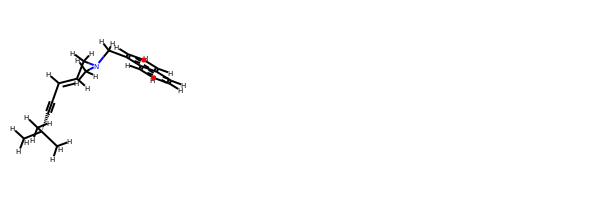

--------
bond
29.277632898259917 kJ/mol 29.277632898259917 kJ/mol True
angle
131.75678429606504 kJ/mol 131.75678429606504 kJ/mol True
nb
62.32188592772182 kJ/mol 62.32188592772182 kJ/mol True
torsion
124.09089906295021 kJ/mol 124.1322350083751 kJ/mol False
347.447202184997 kJ/mol 347.4885381304219 kJ/mol

DrugBank_746
     RDK


--------
bond
29.04989270148637 kJ/mol 29.04989270148637 kJ/mol True
angle
126.2205810092958 kJ/mol 126.2205810092958 kJ/mol True
nb
1.0096355262652317 kJ/mol 1.0096355262652317 kJ/mol True
torsion
60.265701533060145 kJ/mol 61.97027688437935 kJ/mol False
216.54581077010755 kJ/mol 218.25038612142677 kJ/mol

DrugBank_747
     RDK


--------
bond
2.3884853497746446 kJ/mol 2.3884853497746446 kJ/mol True
angle
5.813219635490867 kJ/mol 5.813219635490867 kJ/mol True
nb
71.14767840267815 kJ/mol 71.14767840267815 kJ/mol True
torsion
18.18892530108888 kJ/mol 20.58925310219903 kJ/mol False
97.53830868903255 kJ/mol 99.9386364901427 kJ/mol

DrugBank_749
     RDK


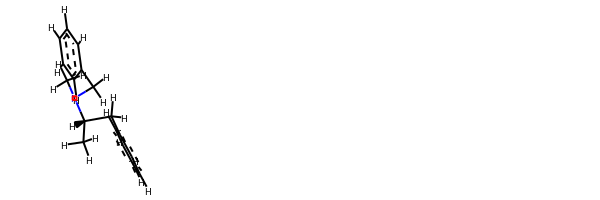

--------
bond
19.850524115478787 kJ/mol 19.850524115478787 kJ/mol True
angle
12.232856015483517 kJ/mol 12.232856015483517 kJ/mol True
nb
98.95725331456994 kJ/mol 98.95725331456994 kJ/mol True
torsion
97.71863562640132 kJ/mol 98.92827120305573 kJ/mol False
228.75926907193355 kJ/mol 229.96890464858797 kJ/mol

DrugBank_766
     RDK


--------
bond
1.0749956897610902 kJ/mol 1.0749956897610902 kJ/mol True
angle
5.73953273083651 kJ/mol 5.73953273083651 kJ/mol True
nb
9.932084562025155 kJ/mol 9.932084562025155 kJ/mol True
torsion
22.007009468241446 kJ/mol 24.906446495625712 kJ/mol False
38.7536224508642 kJ/mol 41.653059478248466 kJ/mol

DrugBank_772
     RDK


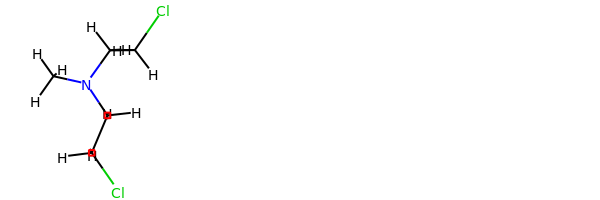

--------
bond
18.083205577418045 kJ/mol 18.083205577418045 kJ/mol True
angle
123.45480949619292 kJ/mol 123.45480949619292 kJ/mol True
nb
51.22455887192063 kJ/mol 51.22455887192063 kJ/mol True
torsion
73.27513736401912 kJ/mol 73.53950881995601 kJ/mol False
266.03771130955073 kJ/mol 266.3020827654876 kJ/mol

DrugBank_773
     RDK


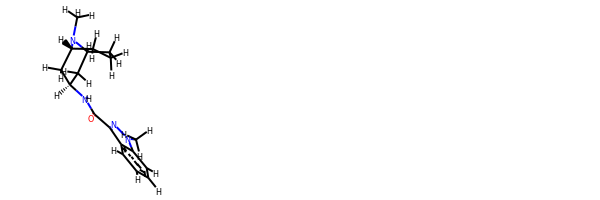

--------
bond
21.998745544659926 kJ/mol 21.998745544659926 kJ/mol True
angle
17.061449545350257 kJ/mol 17.061449545350257 kJ/mol True
nb
104.43287361512284 kJ/mol 104.43287361512284 kJ/mol True
torsion
46.39417055297769 kJ/mol 47.592391248159636 kJ/mol False
189.88723925811072 kJ/mol 191.08545995329266 kJ/mol

DrugBank_776
     RDK


--------
bond
43.84402027792132 kJ/mol 43.84402027792132 kJ/mol True
angle
40.97619423871824 kJ/mol 40.97619423871824 kJ/mol True
nb
82.67939191150712 kJ/mol 82.67939191150712 kJ/mol True
torsion
67.61614350618315 kJ/mol 68.82708672090018 kJ/mol False
235.11574993432987 kJ/mol 236.3266931490469 kJ/mol

DrugBank_782
     RDK


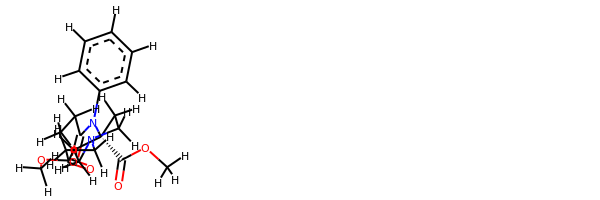

--------
bond
22.561600066581487 kJ/mol 22.561600066581487 kJ/mol True
angle
91.96990909538019 kJ/mol 91.96990909538019 kJ/mol True
nb
2.292742250140026 kJ/mol 2.292742250140026 kJ/mol True
torsion
54.36100392371126 kJ/mol 55.57315351921962 kJ/mol False
171.18525533581297 kJ/mol 172.39740493132135 kJ/mol

DrugBank_789
     RDK


--------
bond
15.974681963994783 kJ/mol 15.974681963994783 kJ/mol True
angle
388.48750247201986 kJ/mol 388.48750247201986 kJ/mol True
nb
72.35344814601139 kJ/mol 72.35344814601139 kJ/mol True
torsion
83.85863859610362 kJ/mol 84.76101878303436 kJ/mol False
560.6742711781296 kJ/mol 561.5766513650603 kJ/mol

DrugBank_790
     RDK


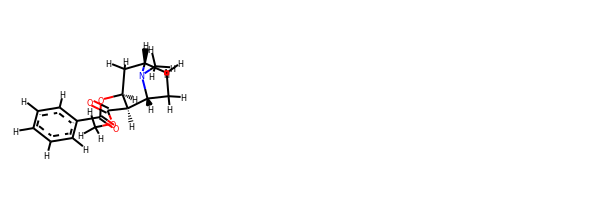

--------
bond
15.079757034749454 kJ/mol 15.079757034749454 kJ/mol True
angle
24.05991262599036 kJ/mol 24.05991262599036 kJ/mol True
nb
116.3209179532964 kJ/mol 116.3209179532964 kJ/mol True
torsion
73.15162262109352 kJ/mol 73.44092335051307 kJ/mol False
228.61221023512974 kJ/mol 228.9015109645493 kJ/mol

DrugBank_791
     RDK


--------
bond
13.269427047748556 kJ/mol 13.269427047748556 kJ/mol True
angle
23.433613302560584 kJ/mol 23.433613302560584 kJ/mol True
nb
69.54948683269006 kJ/mol 69.54948683269006 kJ/mol True
torsion
26.93244523700608 kJ/mol 27.808726331062427 kJ/mol False
133.1849724200053 kJ/mol 134.06125351406163 kJ/mol

DrugBank_796
     RDK


--------
bond
10.977681851474062 kJ/mol 10.977681851474062 kJ/mol True
angle
404.73378442320274 kJ/mol 404.73378442320274 kJ/mol True
nb
13.43801310844111 kJ/mol 13.43801310844111 kJ/mol True
torsion
84.71703867444647 kJ/mol 86.08167918325836 kJ/mol False
513.8665180575643 kJ/mol 515.2311585663763 kJ/mol

DrugBank_801
     RDK


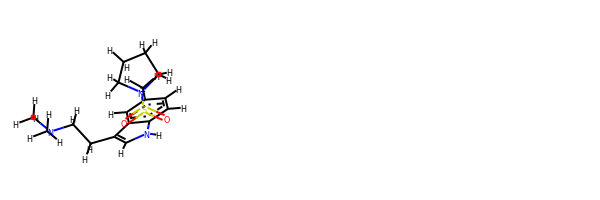

--------
bond
12.39383853935186 kJ/mol 12.39383853935186 kJ/mol True
angle
54.20110116638713 kJ/mol 54.20110116638713 kJ/mol True
nb
128.74629022690044 kJ/mol 128.74629022690044 kJ/mol True
torsion
31.43687339528335 kJ/mol 31.48520500474946 kJ/mol False
226.7781033279228 kJ/mol 226.8264349373889 kJ/mol

DrugBank_803
     RDK


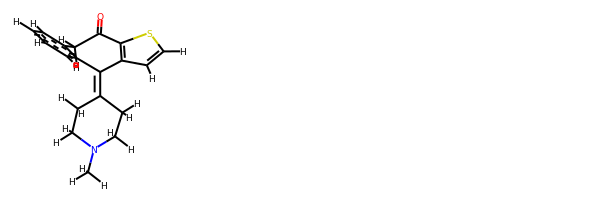

--------
bond
57.8304445241737 kJ/mol 57.8304445241737 kJ/mol True
angle
149.51575894157907 kJ/mol 149.51575894157907 kJ/mol True
nb
787.8673815137521 kJ/mol 787.8673815137521 kJ/mol True
torsion
337.10885377816845 kJ/mol 338.91442865226037 kJ/mol False
1332.3224387576734 kJ/mol 1334.128013631765 kJ/mol

DrugBank_804
     RDK


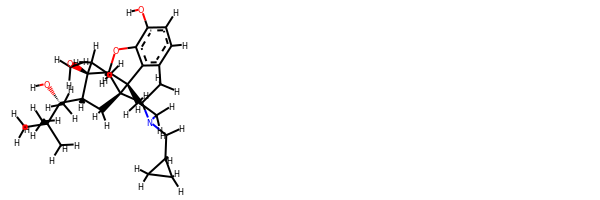

--------
bond
9.538736155070405 kJ/mol 9.538736155070405 kJ/mol True
angle
28.807871045886902 kJ/mol 28.807871045886902 kJ/mol True
nb
52.32142142472843 kJ/mol 52.32142142472843 kJ/mol True
torsion
47.39841462408686 kJ/mol 48.340151497252236 kJ/mol False
138.0664432497726 kJ/mol 139.00818012293797 kJ/mol

DrugBank_807
     RDK


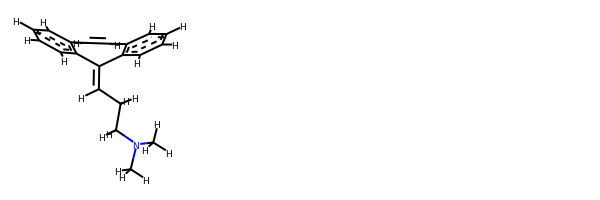

--------
bond
25.659095429402562 kJ/mol 25.659095429402562 kJ/mol True
angle
51.7286907871548 kJ/mol 51.7286907871548 kJ/mol True
nb
145.707944364487 kJ/mol 145.707944364487 kJ/mol True
torsion
84.00410929146777 kJ/mol 84.95764276531231 kJ/mol False
307.0998398725121 kJ/mol 308.0533733463567 kJ/mol

DrugBank_813
     RDK


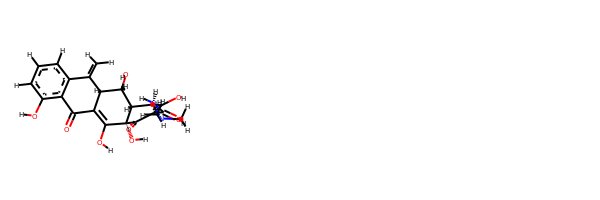

--------
bond
8.012504390513723 kJ/mol 8.012504390513723 kJ/mol True
angle
116.79563168436991 kJ/mol 116.79563168436991 kJ/mol True
nb
15.61216692170843 kJ/mol 15.61216692170843 kJ/mol True
torsion
46.880463644452526 kJ/mol 46.92971960511748 kJ/mol False
187.3007666410446 kJ/mol 187.35002260170953 kJ/mol

DrugBank_834
     RDK


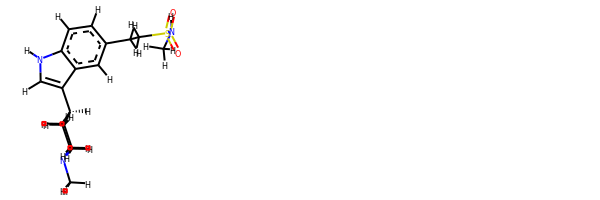

--------
bond
13.586428017039134 kJ/mol 13.586428017039134 kJ/mol True
angle
170.49219737150173 kJ/mol 170.49219737150173 kJ/mol True
nb
11.088619159422892 kJ/mol 11.088619159422892 kJ/mol True
torsion
22.00949874147439 kJ/mol 23.37384932104228 kJ/mol False
217.17674328943818 kJ/mol 218.54109386900606 kJ/mol

DrugBank_835
     RDK


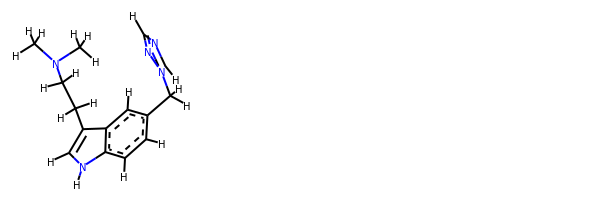

--------
bond
33.53649394455075 kJ/mol 33.53649394455075 kJ/mol True
angle
151.46124358314 kJ/mol 151.46124358314 kJ/mol True
nb
54.42587402554593 kJ/mol 54.42587402554593 kJ/mol True
torsion
55.065180801631435 kJ/mol 55.5676581724247 kJ/mol False
294.4887923548681 kJ/mol 294.99126972566137 kJ/mol

DrugBank_838
     RDK


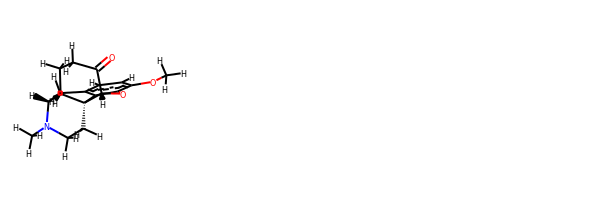

--------
bond
9.975254706012475 kJ/mol 9.975254706012475 kJ/mol True
angle
57.928099254599424 kJ/mol 57.928099254599424 kJ/mol True
nb
36.65931021120646 kJ/mol 36.65931021120646 kJ/mol True
torsion
22.847584445460278 kJ/mol 32.753590698554746 kJ/mol False
127.41024861727864 kJ/mol 137.3162548703731 kJ/mol

DrugBank_855
     RDK


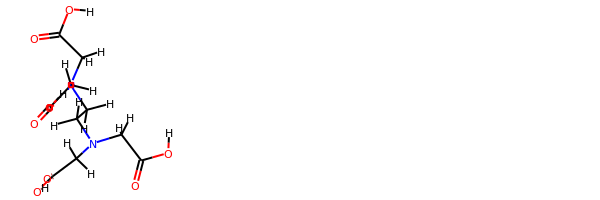

--------
bond
75.16154330123553 kJ/mol 75.16154330123553 kJ/mol True
angle
296.6929313883221 kJ/mol 296.6929313883221 kJ/mol True
nb
300.2610250187102 kJ/mol 300.2610250187102 kJ/mol True
torsion
216.92830331250317 kJ/mol 217.55328000542087 kJ/mol False
889.0438030207711 kJ/mol 889.6687797136888 kJ/mol

DrugBank_857
     RDK


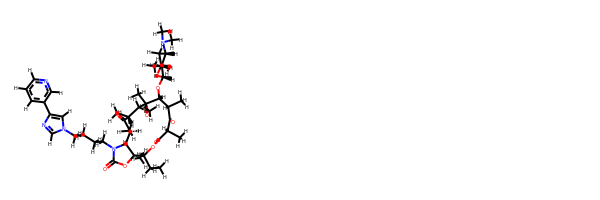

--------
bond
20.522911080515502 kJ/mol 20.522911080515502 kJ/mol True
angle
335.37239871218907 kJ/mol 335.37239871218907 kJ/mol True
nb
11.290164321438484 kJ/mol 11.290164321438484 kJ/mol True
torsion
56.50004557984871 kJ/mol 58.294692075100734 kJ/mol False
423.68551969399175 kJ/mol 425.4801661892438 kJ/mol

DrugBank_862
     RDK


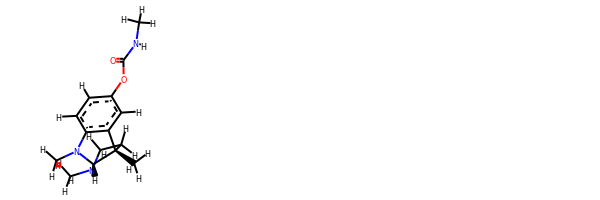

--------
bond
28.018842647243595 kJ/mol 28.018842647243595 kJ/mol True
angle
16.876918614353816 kJ/mol 16.876918614353816 kJ/mol True
nb
62.13603687777681 kJ/mol 62.13603687777681 kJ/mol True
torsion
26.025745917881043 kJ/mol 27.104653388904044 kJ/mol False
133.05754405725526 kJ/mol 134.13645152827826 kJ/mol

DrugBank_870
     RDK


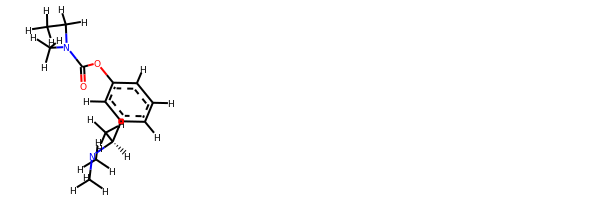

--------
bond
11.832408965608668 kJ/mol 11.832408965608668 kJ/mol True
angle
29.66543279051998 kJ/mol 29.66543279051998 kJ/mol True
nb
51.20283602510125 kJ/mol 51.20283602510125 kJ/mol True
torsion
37.04968611018771 kJ/mol 56.10971918446125 kJ/mol False
129.7503638914176 kJ/mol 148.81039696569115 kJ/mol

DrugBank_883
     RDK


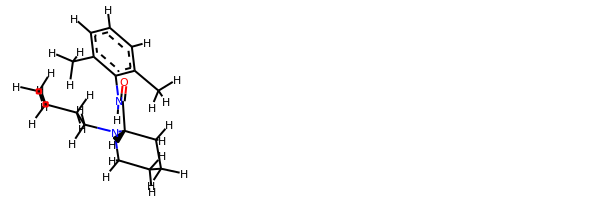

--------
bond
24.74846747250836 kJ/mol 24.74846747250836 kJ/mol True
angle
37.86907481086902 kJ/mol 37.86907481086902 kJ/mol True
nb
141.13867524774736 kJ/mol 141.13867524774736 kJ/mol True
torsion
85.55401046792522 kJ/mol 86.52636457312221 kJ/mol False
289.31022799904997 kJ/mol 290.28258210424696 kJ/mol

DrugBank_898
     RDK


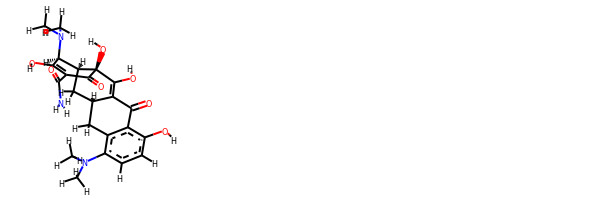

--------
bond
28.919855521525708 kJ/mol 28.919855521525708 kJ/mol True
angle
169.77740865848284 kJ/mol 169.77740865848284 kJ/mol True
nb
81.08480453859625 kJ/mol 81.08480453859625 kJ/mol True
torsion
34.00177867147304 kJ/mol 36.06989533560141 kJ/mol False
313.7838473900778 kJ/mol 315.8519640542062 kJ/mol

DrugBank_910
     RDK


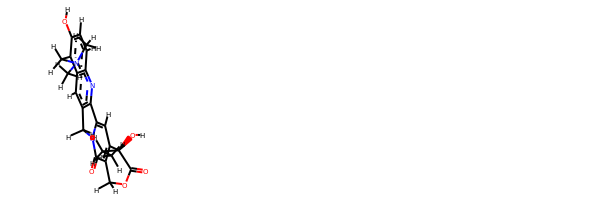

--------
bond
15.18818482028719 kJ/mol 15.18818482028719 kJ/mol True
angle
10.210449942917252 kJ/mol 10.210449942917252 kJ/mol True
nb
78.93394863380922 kJ/mol 78.93394863380922 kJ/mol True
torsion
21.079054798782895 kJ/mol 22.265840196843516 kJ/mol False
125.41163819579656 kJ/mol 126.59842359385718 kJ/mol

DrugBank_915
     RDK


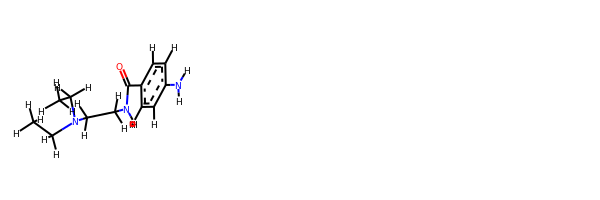

--------
bond
5.85990676765698 kJ/mol 5.85990676765698 kJ/mol True
angle
13.632901287147003 kJ/mol 13.632901287147003 kJ/mol True
nb
777.5563305207288 kJ/mol 777.5563305207288 kJ/mol True
torsion
30.910261569516145 kJ/mol 33.3785320331588 kJ/mol False
827.9594001450489 kJ/mol 830.4276706086916 kJ/mol

DrugBank_916
     RDK


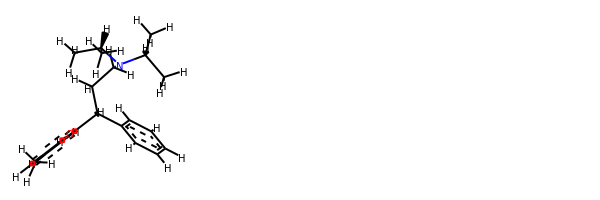

--------
bond
14.762723568704297 kJ/mol 14.762723568704297 kJ/mol True
angle
27.035871456778526 kJ/mol 27.035871456778526 kJ/mol True
nb
81.37060417689707 kJ/mol 81.37060417689707 kJ/mol True
torsion
38.469519842918054 kJ/mol 40.97852797934974 kJ/mol False
161.63871904529796 kJ/mol 164.14772718172964 kJ/mol

DrugBank_918
     RDK


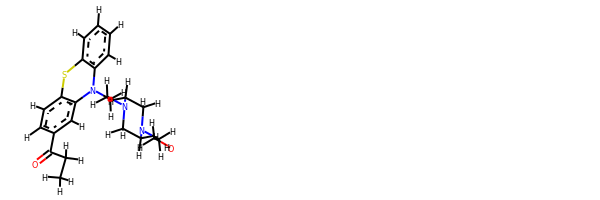

--------
bond
78.34780895551059 kJ/mol 78.34780895551059 kJ/mol True
angle
219.50427806710206 kJ/mol 219.50427806710206 kJ/mol True
nb
384.8501073341714 kJ/mol 384.8501073341714 kJ/mol True
torsion
188.4814045652131 kJ/mol 188.51333006284784 kJ/mol False
871.1835989219971 kJ/mol 871.215524419632 kJ/mol

DrugBank_925
     RDK


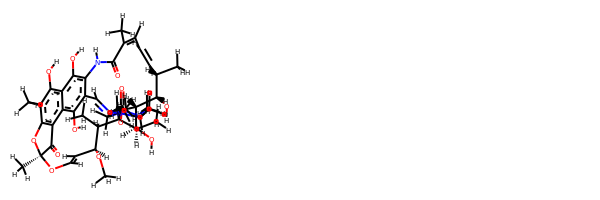

--------
bond
44.14759372638492 kJ/mol 44.14759372638492 kJ/mol True
angle
596.3889907400928 kJ/mol 596.3889907400928 kJ/mol True
nb
53.49389157098143 kJ/mol 53.49389157098143 kJ/mol True
torsion
151.89080252392503 kJ/mol 151.97672919167624 kJ/mol False
845.9212785613842 kJ/mol 846.0072052291354 kJ/mol

DrugBank_929
     RDK


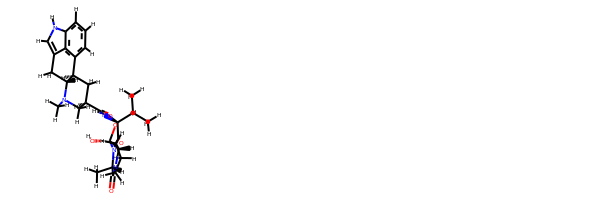

--------
bond
15.221038327372364 kJ/mol 15.221038327372364 kJ/mol True
angle
35.14463445030307 kJ/mol 35.14463445030307 kJ/mol True
nb
75.95547866434212 kJ/mol 75.95547866434212 kJ/mol True
torsion
41.55200623266296 kJ/mol 44.33673078918717 kJ/mol False
167.8731576746805 kJ/mol 170.65788223120472 kJ/mol

DrugBank_942
     RDK


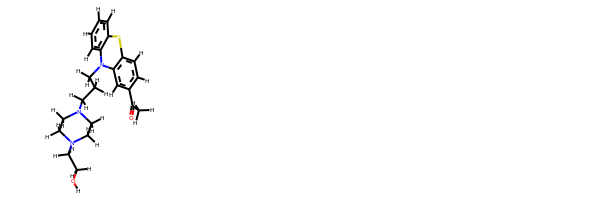

--------
bond
9.063812440855296 kJ/mol 9.063812440855296 kJ/mol True
angle
4.6517402495356945 kJ/mol 4.6517402495356945 kJ/mol True
nb
42.7184023308645 kJ/mol 42.7184023308645 kJ/mol True
torsion
11.889128838341948 kJ/mol 13.096204078965863 kJ/mol False
68.32308385959743 kJ/mol 69.53015910022135 kJ/mol

DrugBank_954
     RDK


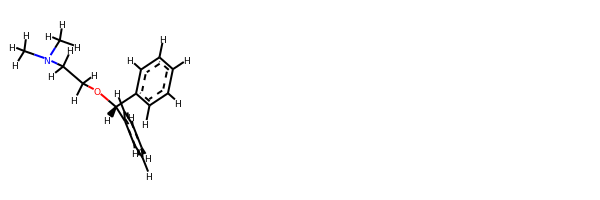

--------
bond
21.697221392985853 kJ/mol 21.697221392985853 kJ/mol True
angle
26.874773321247037 kJ/mol 26.874773321247037 kJ/mol True
nb
106.59716152846154 kJ/mol 106.59716152846154 kJ/mol True
torsion
27.627821875802926 kJ/mol 28.858407231436644 kJ/mol False
182.79697811849735 kJ/mol 184.02756347413106 kJ/mol

DrugBank_960
     RDK


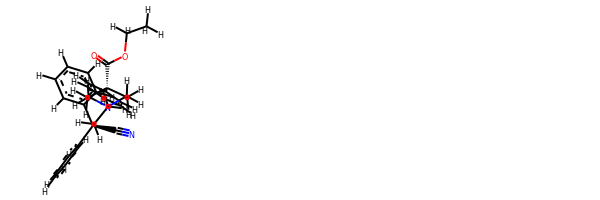

--------
bond
11.889771607113524 kJ/mol 11.889771607113524 kJ/mol True
angle
98.8631762040303 kJ/mol 98.8631762040303 kJ/mol True
nb
15.1548072640971 kJ/mol 15.1548072640971 kJ/mol True
torsion
49.93579339825896 kJ/mol 50.207674459854275 kJ/mol False
175.84354847349988 kJ/mol 176.1154295350952 kJ/mol

DrugBank_963
     RDK


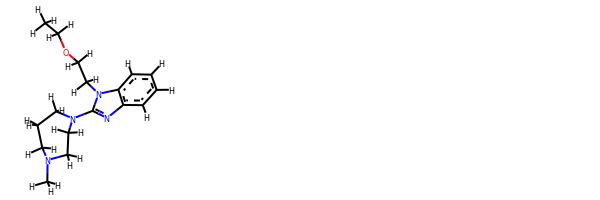

--------
bond
53.40851117062429 kJ/mol 53.40851117062429 kJ/mol True
angle
149.75393746432061 kJ/mol 149.75393746432061 kJ/mol True
nb
150.93822754361844 kJ/mol 150.93822754361844 kJ/mol True
torsion
108.53442928651235 kJ/mol 124.62173347284472 kJ/mol False
462.6351054650757 kJ/mol 478.72240965140804 kJ/mol

DrugBank_968
     RDK


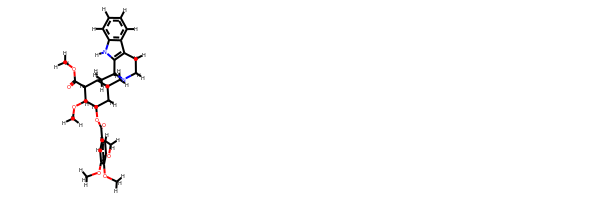

--------
bond
10.208530137468228 kJ/mol 10.208530137468228 kJ/mol True
angle
15.522902420236912 kJ/mol 15.522902420236912 kJ/mol True
nb
69.14128440980109 kJ/mol 69.14128440980109 kJ/mol True
torsion
4.312673350369675 kJ/mol 8.040142052490328 kJ/mol False
99.1853903178759 kJ/mol 102.91285901999656 kJ/mol

DrugBank_970
     RDK


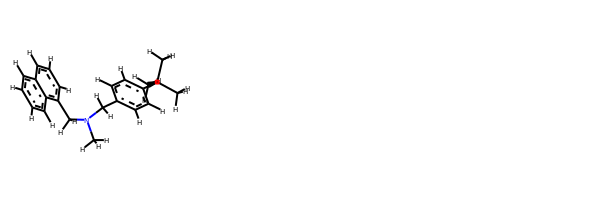

--------
bond
39.8439593226965 kJ/mol 39.8439593226965 kJ/mol True
angle
89.7890303769186 kJ/mol 89.7890303769186 kJ/mol True
nb
72.60560878665201 kJ/mol 72.60560878665201 kJ/mol True
torsion
34.465209471827905 kJ/mol 35.67763146893151 kJ/mol False
236.703807958095 kJ/mol 237.91622995519862 kJ/mol

DrugBank_979
     RDK


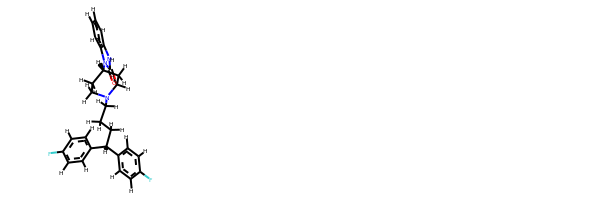

--------
bond
15.852183048501752 kJ/mol 15.852183048501752 kJ/mol True
angle
26.964868164370447 kJ/mol 26.964868164370447 kJ/mol True
nb
151.2553255505811 kJ/mol 151.2553255505811 kJ/mol True
torsion
47.080763714586986 kJ/mol 47.11754925419483 kJ/mol False
241.15314047804029 kJ/mol 241.18992601764813 kJ/mol

DrugBank_985
     RDK


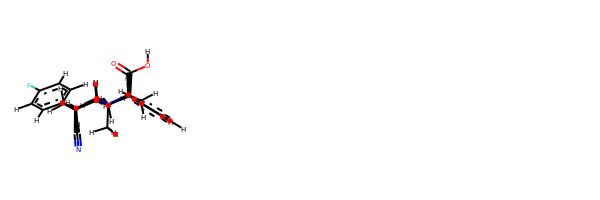

--------
bond
31.921771572313055 kJ/mol 31.921771572313055 kJ/mol True
angle
102.34753619881509 kJ/mol 102.34753619881509 kJ/mol True
nb
74.20247962243769 kJ/mol 74.20247962243769 kJ/mol True
torsion
59.07643302236694 kJ/mol 60.27434866036507 kJ/mol False
267.5482204159328 kJ/mol 268.7461360539309 kJ/mol

DrugBank_996
     RDK


--------
bond
27.675501465546677 kJ/mol 27.675501465546677 kJ/mol True
angle
31.422656829028213 kJ/mol 31.422656829028213 kJ/mol True
nb
61.51082996758089 kJ/mol 61.51082996758089 kJ/mol True
torsion
55.39733612101554 kJ/mol 55.41871247785601 kJ/mol False
176.00632438317132 kJ/mol 176.0277007400118 kJ/mol

DrugBank_1015
     RD


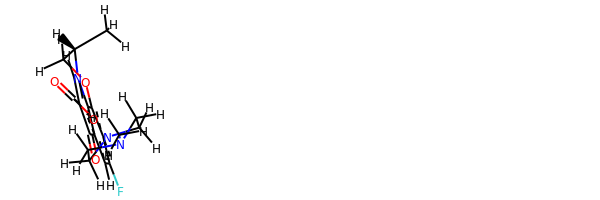

--------
bond
20.737104446905402 kJ/mol 20.737104446905402 kJ/mol True
angle
20.373808118316028 kJ/mol 20.373808118316028 kJ/mol True
nb
69.11849370150465 kJ/mol 69.11849370150465 kJ/mol True
torsion
49.39379405368245 kJ/mol 50.33579285256157 kJ/mol False
159.6232003204085 kJ/mol 160.56519911928763 kJ/mol

DrugBank_1020
     RD


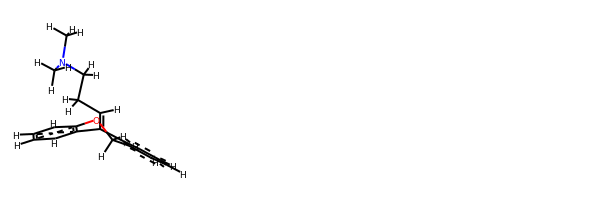

--------
bond
9.3210689667279 kJ/mol 9.3210689667279 kJ/mol True
angle
7.040801260444392 kJ/mol 7.040801260444392 kJ/mol True
nb
46.186970502541406 kJ/mol 46.186970502541406 kJ/mol True
torsion
27.55624780421206 kJ/mol 27.611369003732168 kJ/mol False
90.10508853392577 kJ/mol 90.16020973344587 kJ/mol

DrugBank_1024
     RD


--------
bond
22.1651003451713 kJ/mol 22.1651003451713 kJ/mol True
angle
32.388500487585915 kJ/mol 32.388500487585915 kJ/mol True
nb
57.441167399555276 kJ/mol 57.441167399555276 kJ/mol True
torsion
50.493589081370324 kJ/mol 51.64649629809277 kJ/mol False
162.4883573136828 kJ/mol 163.64126453040527 kJ/mol

DrugBank_1026
     RD


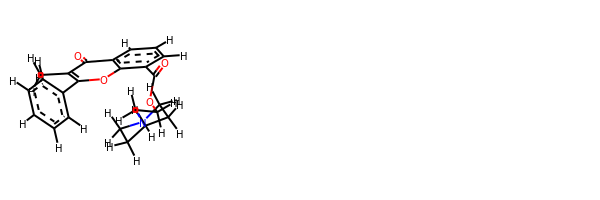

--------
bond
29.894982133814025 kJ/mol 29.894982133814025 kJ/mol True
angle
100.45126657551818 kJ/mol 100.45126657551818 kJ/mol True
nb
48.890999155237665 kJ/mol 48.890999155237665 kJ/mol True
torsion
59.03599793398289 kJ/mol 59.95278660213821 kJ/mol False
238.27324579855275 kJ/mol 239.19003446670808 kJ/mol

DrugBank_1027
     RD


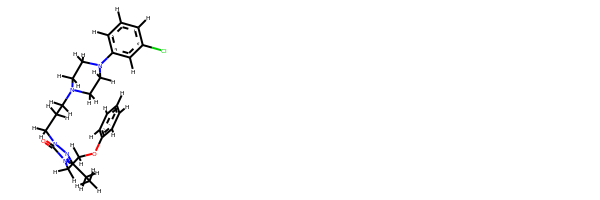

--------
bond
13.069939773601499 kJ/mol 13.069939773601499 kJ/mol True
angle
14.142672030633745 kJ/mol 14.142672030633745 kJ/mol True
nb
77.7983540002163 kJ/mol 77.7983540002163 kJ/mol True
torsion
32.50647590873573 kJ/mol 33.71592762810921 kJ/mol False
137.51744171318728 kJ/mol 138.72689343256076 kJ/mol

DrugBank_1039
     RD


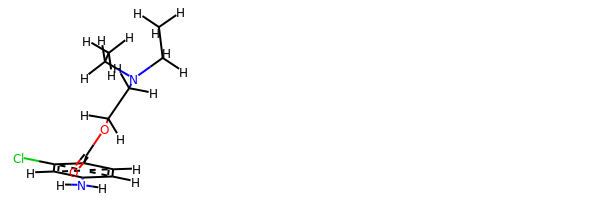

--------
bond
1.931130965093237 kJ/mol 1.931130965093237 kJ/mol True
angle
43.953257820701545 kJ/mol 43.953257820701545 kJ/mol True
nb
22.32131156536458 kJ/mol 22.32131156536458 kJ/mol True
torsion
85.28389955165775 kJ/mol 91.30928385755249 kJ/mol False
153.48959990281713 kJ/mol 159.51498420871184 kJ/mol

DrugBank_1048
     RD


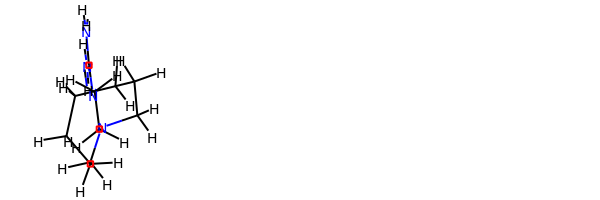

--------
bond
19.083421385446275 kJ/mol 19.083421385446275 kJ/mol True
angle
9.863408240838558 kJ/mol 9.863408240838558 kJ/mol True
nb
37.439116292239554 kJ/mol 37.439116292239554 kJ/mol True
torsion
20.82203101745239 kJ/mol 21.771376407463773 kJ/mol False
87.20797693597677 kJ/mol 88.15732232598816 kJ/mol

DrugBank_1049
     RD


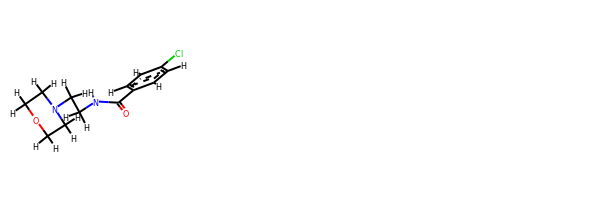

--------
bond
27.088019161645676 kJ/mol 27.088019161645676 kJ/mol True
angle
185.99714766470055 kJ/mol 185.99714766470055 kJ/mol True
nb
54.6581159693527 kJ/mol 54.6581159693527 kJ/mol True
torsion
29.432990795524436 kJ/mol 30.383010247324286 kJ/mol False
297.1762735912233 kJ/mol 298.12629304302317 kJ/mol

DrugBank_1053
     RD


--------
bond
2.4581321816503183 kJ/mol 2.4581321816503183 kJ/mol True
angle
6.263539380728054 kJ/mol 6.263539380728054 kJ/mol True
nb
75.37939587932864 kJ/mol 75.37939587932864 kJ/mol True
torsion
13.580538685382454 kJ/mol 15.319884690643365 kJ/mol False
97.68160612708947 kJ/mol 99.42095213235038 kJ/mol

DrugBank_1054
     RD


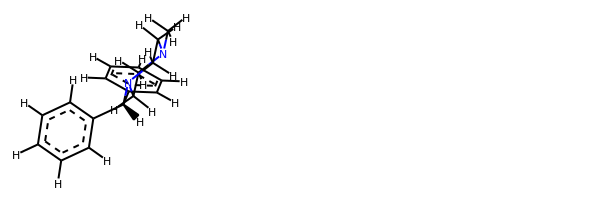

--------
bond
61.579370196185955 kJ/mol 61.579370196185955 kJ/mol True
angle
162.00100671373335 kJ/mol 162.00100671373335 kJ/mol True
nb
152.38289131798842 kJ/mol 152.38289131798842 kJ/mol True
torsion
128.9008473074929 kJ/mol 144.987776475008 kJ/mol False
504.86411553540063 kJ/mol 520.9510447029157 kJ/mol

DrugBank_1058
     RD


--------
bond
30.742255867938994 kJ/mol 30.742255867938994 kJ/mol True
angle
158.53272230323816 kJ/mol 158.53272230323816 kJ/mol True
nb
41.27902897065278 kJ/mol 41.27902897065278 kJ/mol True
torsion
62.798338191327375 kJ/mol 65.70391807016831 kJ/mol False
293.35234533315736 kJ/mol 296.25792521199827 kJ/mol

DrugBank_1061
     RD


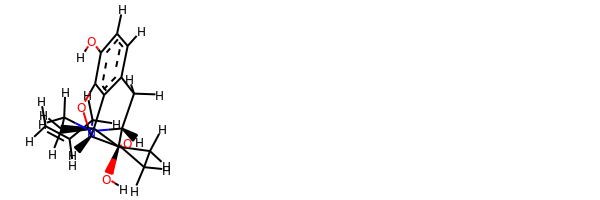

--------
bond
72.85718128164429 kJ/mol 72.85718128164429 kJ/mol True
angle
166.68754833427013 kJ/mol 166.68754833427013 kJ/mol True
nb
29.92273599045216 kJ/mol 29.92273599045216 kJ/mol True
torsion
34.26710894412703 kJ/mol 35.15515381691412 kJ/mol False
303.7345745504936 kJ/mol 304.6226194232807 kJ/mol

DrugBank_1062
     RD


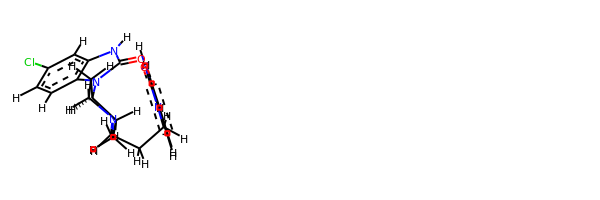

--------
bond
16.749015647353072 kJ/mol 16.749015647353072 kJ/mol True
angle
102.76628829246117 kJ/mol 102.76628829246117 kJ/mol True
nb
54.782498738059935 kJ/mol 54.782498738059935 kJ/mol True
torsion
27.028244270398865 kJ/mol 28.288424547505585 kJ/mol False
201.32604694827305 kJ/mol 202.58622722537976 kJ/mol

DrugBank_1064
     RD


--------
bond
29.89262437533669 kJ/mol 29.89262437533669 kJ/mol True
angle
155.79519361683225 kJ/mol 155.79519361683225 kJ/mol True
nb
42.55438645372843 kJ/mol 42.55438645372843 kJ/mol True
torsion
60.24335182969333 kJ/mol 60.801128098486025 kJ/mol False
288.4855562755907 kJ/mol 289.0433325443834 kJ/mol

DrugBank_1070
     RD


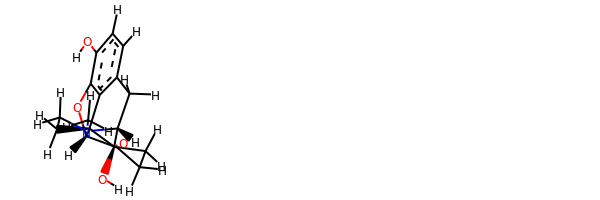

--------
bond
79.14203492035573 kJ/mol 79.14203492035573 kJ/mol True
angle
47.33885480099728 kJ/mol 47.33885480099728 kJ/mol True
nb
46.873703815985444 kJ/mol 46.873703815985444 kJ/mol True
torsion
122.33579776446345 kJ/mol 122.68153782716301 kJ/mol False
295.6903913018019 kJ/mol 296.03613136450144 kJ/mol

DrugBank_1077
     RD


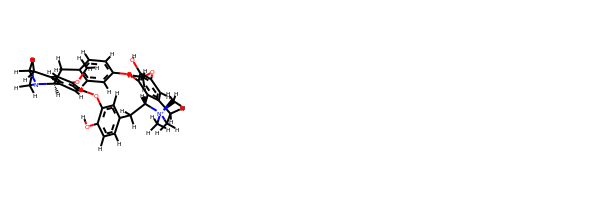

--------
bond
43.20360596606079 kJ/mol 43.20360596606079 kJ/mol True
angle
600.2089273423012 kJ/mol 600.2089273423012 kJ/mol True
nb
63.56786088287025 kJ/mol 63.56786088287025 kJ/mol True
torsion
160.3936241588451 kJ/mol 161.02802379937543 kJ/mol False
867.3740183500773 kJ/mol 868.0084179906077 kJ/mol

DrugBank_1078
     RD


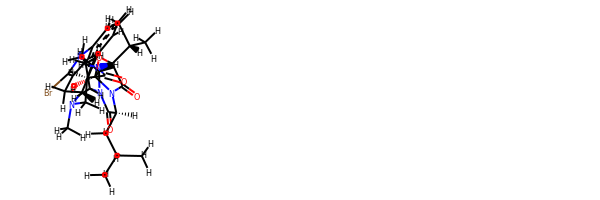

--------
bond
24.68563101176662 kJ/mol 24.68563101176662 kJ/mol True
angle
19.30352661462478 kJ/mol 19.30352661462478 kJ/mol True
nb
59.21923779280843 kJ/mol 59.21923779280843 kJ/mol True
torsion
68.24297032931875 kJ/mol 69.4183342472157 kJ/mol False
171.45136574851858 kJ/mol 172.62672966641554 kJ/mol

DrugBank_1102
     RD


--------
bond
29.076010691011305 kJ/mol 29.076010691011305 kJ/mol True
angle
31.646816464085113 kJ/mol 31.646816464085113 kJ/mol True
nb
146.2598289772372 kJ/mol 146.2598289772372 kJ/mol True
torsion
45.62177341046313 kJ/mol 46.35970958676804 kJ/mol False
252.60442954279674 kJ/mol 253.34236571910165 kJ/mol

DrugBank_1104
     RD


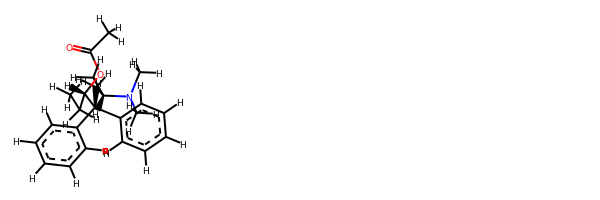

--------
bond
7.368146848826093 kJ/mol 7.368146848826093 kJ/mol True
angle
13.011837208775708 kJ/mol 13.011837208775708 kJ/mol True
nb
65.2684795026072 kJ/mol 65.2684795026072 kJ/mol True
torsion
23.511486140995377 kJ/mol 25.080817199647033 kJ/mol False
109.15994970120438 kJ/mol 110.72928075985604 kJ/mol

DrugBank_1108
     RD


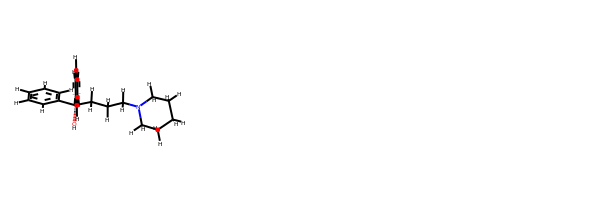

--------
bond
22.758067212045617 kJ/mol 22.758067212045617 kJ/mol True
angle
12.144998072542366 kJ/mol 12.144998072542366 kJ/mol True
nb
69.06779970382624 kJ/mol 69.06779970382624 kJ/mol True
torsion
43.19875994185082 kJ/mol 44.38554533991146 kJ/mol False
147.16962493026503 kJ/mol 148.3564103283257 kJ/mol

DrugBank_1110
     RD


--------
bond
16.007757448736818 kJ/mol 16.007757448736818 kJ/mol True
angle
17.031320835307145 kJ/mol 17.031320835307145 kJ/mol True
nb
62.827048789574 kJ/mol 62.827048789574 kJ/mol True
torsion
74.36168476788784 kJ/mol 75.48006043266356 kJ/mol False
170.2278118415058 kJ/mol 171.34618750628152 kJ/mol

DrugBank_1115
     RD


--------
bond
14.916140727812177 kJ/mol 14.916140727812177 kJ/mol True
angle
13.098064600459175 kJ/mol 13.098064600459175 kJ/mol True
nb
86.55935784082583 kJ/mol 86.55935784082583 kJ/mol True
torsion
24.34051081623126 kJ/mol 25.28199759953751 kJ/mol False
138.91407398532843 kJ/mol 139.8555607686347 kJ/mol

DrugBank_1116
     RD


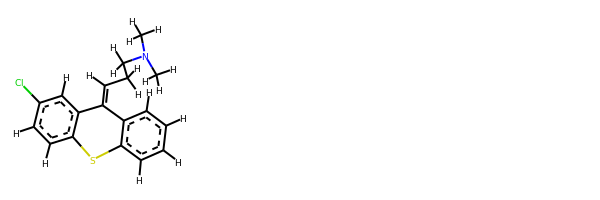

--------
bond
12.785856601727017 kJ/mol 12.785856601727017 kJ/mol True
angle
33.60708306859493 kJ/mol 33.60708306859493 kJ/mol True
nb
61.0082201184199 kJ/mol 61.0082201184199 kJ/mol True
torsion
32.34497471621106 kJ/mol 33.28434504366699 kJ/mol False
139.74613450495292 kJ/mol 140.68550483240884 kJ/mol

DrugBank_1119
     RD


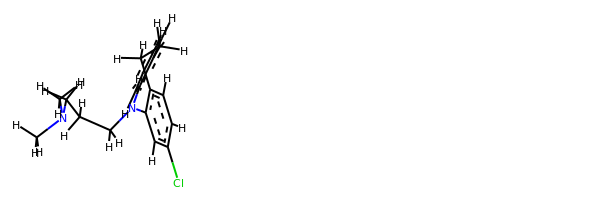

--------
bond
20.988071454565446 kJ/mol 20.988071454565446 kJ/mol True
angle
118.11260058070079 kJ/mol 118.11260058070079 kJ/mol True
nb
35.30020176320554 kJ/mol 35.30020176320554 kJ/mol True
torsion
27.54012565374785 kJ/mol 28.17435566838591 kJ/mol False
201.94099945221961 kJ/mol 202.57522946685768 kJ/mol

DrugBank_1130
     RD


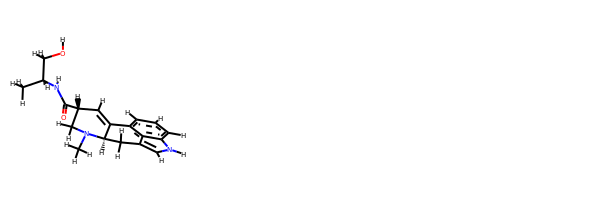

--------
bond
32.58876110231474 kJ/mol 32.58876110231474 kJ/mol True
angle
95.7577366003828 kJ/mol 95.7577366003828 kJ/mol True
nb
62.79550508396886 kJ/mol 62.79550508396886 kJ/mol True
torsion
45.224389596002254 kJ/mol 46.44605066273238 kJ/mol False
236.36639238266866 kJ/mol 237.58805344939879 kJ/mol

DrugBank_1131
     RD


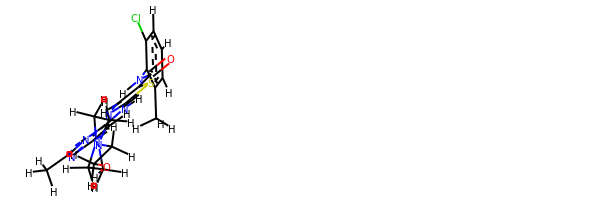

--------
bond
42.19800105935226 kJ/mol 42.19800105935226 kJ/mol True
angle
715.1141701058174 kJ/mol 715.1141701058174 kJ/mol True
nb
143.73205363564227 kJ/mol 143.73205363564227 kJ/mol True
torsion
208.49664027334538 kJ/mol 209.3982285806543 kJ/mol False
1109.5408650741574 kJ/mol 1110.4424533814663 kJ/mol

DrugBank_1133
     RD


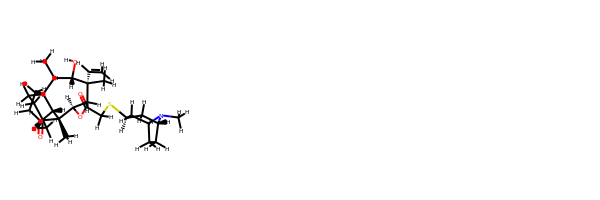

--------
bond
45.375240290374606 kJ/mol 45.375240290374606 kJ/mol True
angle
178.37299764670237 kJ/mol 178.37299764670237 kJ/mol True
nb
71.29280878721147 kJ/mol 71.29280878721147 kJ/mol True
torsion
49.996804504207255 kJ/mol 51.205010846520054 kJ/mol False
345.0378512284957 kJ/mol 346.2460575708085 kJ/mol

DrugBank_1142
     RD


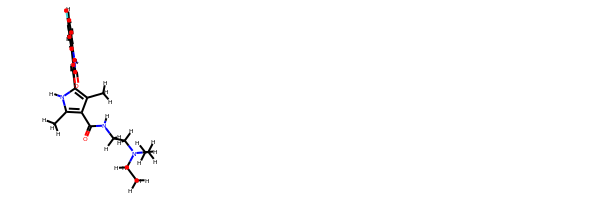

--------
bond
25.135162702136647 kJ/mol 25.135162702136647 kJ/mol True
angle
333.79675891770347 kJ/mol 333.79675891770347 kJ/mol True
nb
160.81434008007352 kJ/mol 160.81434008007352 kJ/mol True
torsion
91.22031603541191 kJ/mol 93.96339225237763 kJ/mol False
610.9665777353256 kJ/mol 613.7096539522913 kJ/mol

DrugBank_1158
     RD


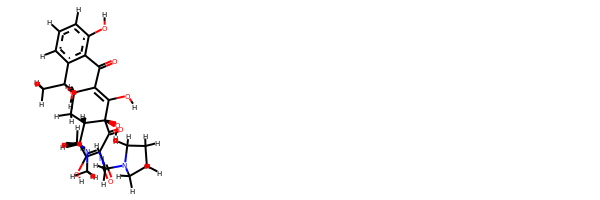

--------
bond
79.57935839970484 kJ/mol 81.66182317600635 kJ/mol False
angle
95.23160388054029 kJ/mol 561.7239826304004 kJ/mol False
nb
24.053543668362007 kJ/mol 24.053543668362007 kJ/mol True
torsion
0.0002989711047774007 kJ/mol 0.00029554400135373967 kJ/mol False
198.8648049197119 kJ/mol 667.4396450187701 kJ/mol

DrugBank_1159
     RD


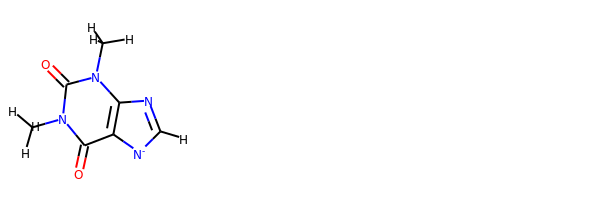

--------
bond
75.46437449565794 kJ/mol 75.46437449565794 kJ/mol True
angle
404.37155012090824 kJ/mol 404.37155012090824 kJ/mol True
nb
214.07410961499957 kJ/mol 214.07410961499957 kJ/mol True
torsion
214.93505212221254 kJ/mol 215.79725351177328 kJ/mol False
908.8450863537782 kJ/mol 909.707287743339 kJ/mol

DrugBank_1176
     RD


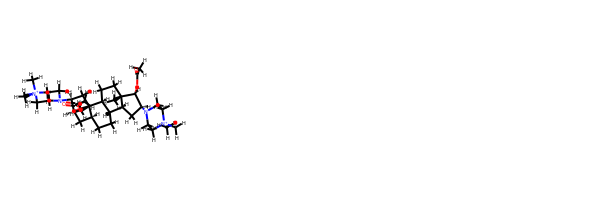

--------
bond
52.93621596331329 kJ/mol 52.93621596331329 kJ/mol True
angle
395.2837143627188 kJ/mol 395.2837143627188 kJ/mol True
nb
1046.663614981195 kJ/mol 1046.663614981195 kJ/mol True
torsion
203.63166659777536 kJ/mol 203.66930067499953 kJ/mol False
1698.5152119050026 kJ/mol 1698.5528459822267 kJ/mol

DrugBank_1177
     RD


--------
bond
94.59397279818333 kJ/mol 94.59397279818333 kJ/mol True
angle
270.1329251710821 kJ/mol 270.1329251710821 kJ/mol True
nb
180.10469633665315 kJ/mol 180.10469633665315 kJ/mol True
torsion
283.44936649447885 kJ/mol 284.07430715865974 kJ/mol False
828.2809608003975 kJ/mol 828.9059014645784 kJ/mol

DrugBank_1192
     RD


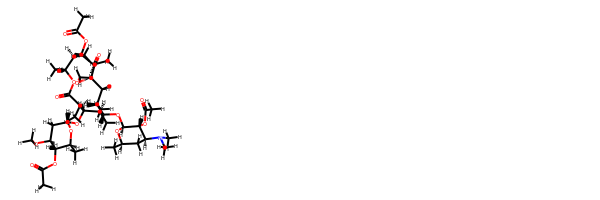

--------
bond
20.731993132859824 kJ/mol 20.731993132859824 kJ/mol True
angle
111.69178984544307 kJ/mol 111.69178984544307 kJ/mol True
nb
293.6654837318713 kJ/mol 293.6654837318713 kJ/mol True
torsion
56.732957314059625 kJ/mol 59.32267219382445 kJ/mol False
482.82222402423383 kJ/mol 485.4119389039986 kJ/mol

DrugBank_1207
     RD


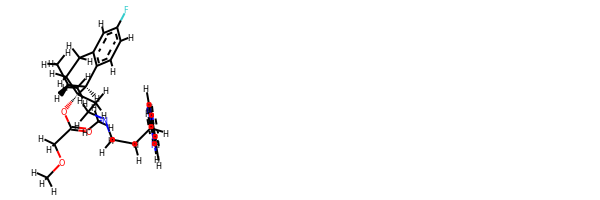

--------
bond
16.37656639163402 kJ/mol 16.37656639163402 kJ/mol True
angle
126.67551725249557 kJ/mol 126.67551725249557 kJ/mol True
nb
65.15582632119494 kJ/mol 65.15582632119494 kJ/mol True
torsion
39.54831294138814 kJ/mol 55.05110597765226 kJ/mol False
247.75622290671265 kJ/mol 263.2590159429768 kJ/mol

DrugBank_1209
     RD


--------
bond
21.320846159108942 kJ/mol 21.320846159108942 kJ/mol True
angle
21.994402409470577 kJ/mol 21.994402409470577 kJ/mol True
nb
105.54901009466613 kJ/mol 105.54901009466613 kJ/mol True
torsion
17.05668670573395 kJ/mol 18.412217508113518 kJ/mol False
165.9209453689796 kJ/mol 167.27647617135915 kJ/mol

DrugBank_1218
     RD


--------
bond
18.052841857928545 kJ/mol 18.052841857928545 kJ/mol True
angle
52.7524617137273 kJ/mol 52.7524617137273 kJ/mol True
nb
66.43676119880024 kJ/mol 66.43676119880024 kJ/mol True
torsion
51.196457400513005 kJ/mol 52.416830787104004 kJ/mol False
188.4385221709691 kJ/mol 189.65889555756007 kJ/mol

DrugBank_1232
     RD


--------
bond
13.140550633121995 kJ/mol 13.140550633121995 kJ/mol True
angle
241.98182450430872 kJ/mol 241.98182450430872 kJ/mol True
nb
91.49525380449064 kJ/mol 91.49525380449064 kJ/mol True
torsion
45.13722475347073 kJ/mol 46.6970493233151 kJ/mol False
391.75485369539206 kJ/mol 393.31467826523647 kJ/mol

DrugBank_1242
     RD


--------
bond
14.774538595638242 kJ/mol 14.774538595638242 kJ/mol True
angle
45.025921582252806 kJ/mol 45.025921582252806 kJ/mol True
nb
121.5646534589132 kJ/mol 121.5646534589132 kJ/mol True
torsion
12.738147757703024 kJ/mol 13.961783495947719 kJ/mol False
194.10326139450729 kJ/mol 195.32689713275198 kJ/mol

DrugBank_1243
     RD


--------
bond
15.677966563013943 kJ/mol 15.677966563013943 kJ/mol True
angle
87.56329650485198 kJ/mol 87.56329650485198 kJ/mol True
nb
619.2190031324095 kJ/mol 619.2190031324095 kJ/mol True
torsion
35.0254350315631 kJ/mol 37.66980191410368 kJ/mol False
757.4857012318386 kJ/mol 760.1300681143791 kJ/mol

DrugBank_1253
     RD


--------
bond
8.08431742949157 kJ/mol 8.08431742949157 kJ/mol True
angle
83.08171512019454 kJ/mol 83.08171512019454 kJ/mol True
nb
17.106236261332096 kJ/mol 17.106236261332096 kJ/mol True
torsion
6.912326514042076 kJ/mol 8.10325484615358 kJ/mol False
115.1845953250603 kJ/mol 116.3755236571718 kJ/mol

DrugBank_1256
     RD


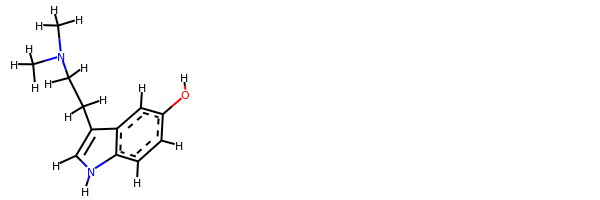

--------
bond
48.070178782586616 kJ/mol 48.070178782586616 kJ/mol True
angle
141.13116232294453 kJ/mol 141.13116232294453 kJ/mol True
nb
269.3664820609023 kJ/mol 269.3664820609023 kJ/mol True
torsion
176.72915475507654 kJ/mol 177.14256294026939 kJ/mol False
635.29697792151 kJ/mol 635.7103861067028 kJ/mol

DrugBank_1259
     RD


--------
bond
43.28018526725802 kJ/mol 43.28018526725802 kJ/mol True
angle
171.67266523756257 kJ/mol 171.67266523756257 kJ/mol True
nb
37.75715491743987 kJ/mol 37.75715491743987 kJ/mol True
torsion
101.32543743303812 kJ/mol 101.7728230442557 kJ/mol False
354.0354428552986 kJ/mol 354.4828284665162 kJ/mol

DrugBank_1260
     RD


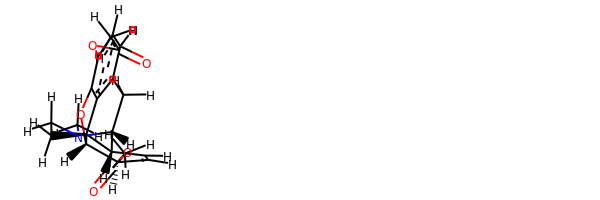

--------
bond
76.30228711805722 kJ/mol 76.30228711805722 kJ/mol True
angle
100.91890257512264 kJ/mol 100.91890257512264 kJ/mol True
nb
103.5020075466793 kJ/mol 103.5020075466793 kJ/mol True
torsion
34.922007287442895 kJ/mol 36.55593730911337 kJ/mol False
315.64520452730204 kJ/mol 317.27913454897254 kJ/mol

DrugBank_1264
     RD


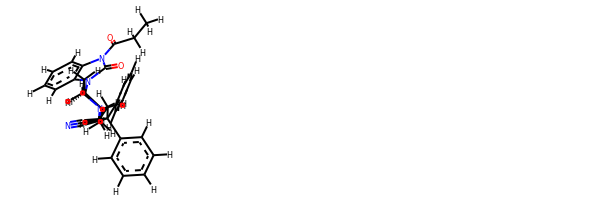

--------
bond
11.364650251895187 kJ/mol 11.364650251895187 kJ/mol True
angle
84.64346247379765 kJ/mol 84.64346247379765 kJ/mol True
nb
70.29889400016602 kJ/mol 70.29889400016602 kJ/mol True
torsion
16.767989381975475 kJ/mol 18.145596731501584 kJ/mol False
183.07499610783435 kJ/mol 184.45260345736045 kJ/mol

DrugBank_1265
     RD


--------
bond
18.083705285335256 kJ/mol 18.083705285335256 kJ/mol True
angle
22.933358981887835 kJ/mol 22.933358981887835 kJ/mol True
nb
111.73984978540518 kJ/mol 111.73984978540518 kJ/mol True
torsion
20.082990103990056 kJ/mol 21.290234498348518 kJ/mol False
172.83990415661833 kJ/mol 174.0471485509768 kJ/mol

DrugBank_1266
     RD


--------
bond
27.668930215956046 kJ/mol 27.668930215956046 kJ/mol True
angle
92.589380380478 kJ/mol 92.589380380478 kJ/mol True
nb
95.54098403230367 kJ/mol 95.54098403230367 kJ/mol True
torsion
38.08611859614073 kJ/mol 39.363047227820054 kJ/mol False
253.88541322487845 kJ/mol 255.1623418565578 kJ/mol

DrugBank_1267
     RD


--------
bond
36.314660710114595 kJ/mol 36.314660710114595 kJ/mol True
angle
154.51148897874455 kJ/mol 154.51148897874455 kJ/mol True
nb
46.20575042365513 kJ/mol 46.20575042365513 kJ/mol True
torsion
95.483284657602 kJ/mol 95.93067026881958 kJ/mol False
332.5151847701163 kJ/mol 332.9625703813339 kJ/mol

DrugBank_1271
     RD


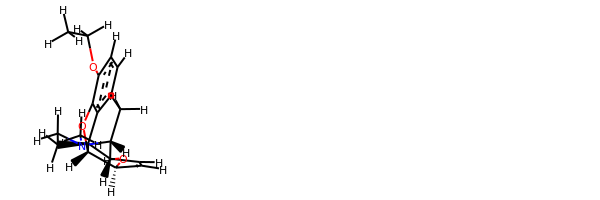

--------
bond
56.57497136389903 kJ/mol 56.57497136389903 kJ/mol True
angle
157.06142758114754 kJ/mol 157.06142758114754 kJ/mol True
nb
220.09641621861795 kJ/mol 220.09641621861795 kJ/mol True
torsion
156.80963088684052 kJ/mol 157.2193342283704 kJ/mol False
590.5424460505051 kJ/mol 590.9521493920349 kJ/mol

DrugBank_1274
     RD


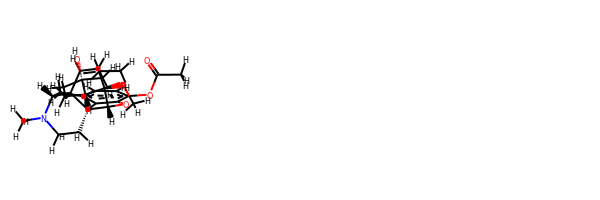

--------
bond
28.407080643517954 kJ/mol 28.407080643517954 kJ/mol True
angle
23.261304103537658 kJ/mol 23.261304103537658 kJ/mol True
nb
79.84778499976348 kJ/mol 79.84778499976348 kJ/mol True
torsion
27.64613029533452 kJ/mol 28.860527419545743 kJ/mol False
159.16230004215362 kJ/mol 160.37669716636483 kJ/mol

DrugBank_1279
     RD


--------
bond
10.88938490981967 kJ/mol 10.88938490981967 kJ/mol True
angle
25.180795807457432 kJ/mol 25.180795807457432 kJ/mol True
nb
72.8519006053985 kJ/mol 72.8519006053985 kJ/mol True
torsion
26.32792917257719 kJ/mol 26.416300112774916 kJ/mol False
135.2500104952528 kJ/mol 135.33838143545051 kJ/mol

DrugBank_1282
     RD


--------
bond
51.47638037740365 kJ/mol 51.47638037740365 kJ/mol True
angle
146.58071648427574 kJ/mol 146.58071648427574 kJ/mol True
nb
199.01372727405308 kJ/mol 199.01372727405308 kJ/mol True
torsion
283.92762826170616 kJ/mol 285.7297015383403 kJ/mol False
680.9984523974387 kJ/mol 682.8005256740728 kJ/mol

DrugBank_1283
     RD


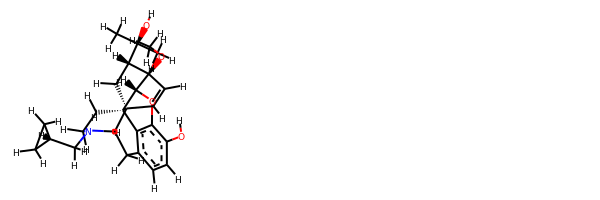

--------
bond
7.864516887138394 kJ/mol 7.864516887138394 kJ/mol True
angle
82.53033242829838 kJ/mol 82.53033242829838 kJ/mol True
nb
17.581190041471796 kJ/mol 17.581190041471796 kJ/mol True
torsion
6.914488667604851 kJ/mol 8.106040606277881 kJ/mol False
114.89052802451343 kJ/mol 116.08207996318646 kJ/mol

DrugBank_1290
     RD


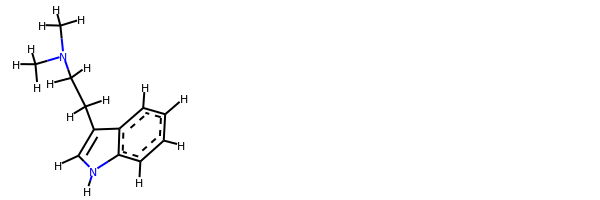

--------
bond
23.12777800981436 kJ/mol 23.12777800981436 kJ/mol True
angle
22.74464324453782 kJ/mol 22.74464324453782 kJ/mol True
nb
135.3834166555833 kJ/mol 135.3834166555833 kJ/mol True
torsion
27.241779391710963 kJ/mol 28.127109258844797 kJ/mol False
208.49761730164641 kJ/mol 209.38294716878028 kJ/mol

DrugBank_1299
     RD


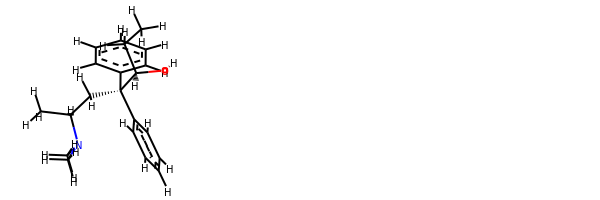

--------
bond
14.03437126885203 kJ/mol 14.03437126885203 kJ/mol True
angle
21.47977017409084 kJ/mol 21.47977017409084 kJ/mol True
nb
133.3612306538434 kJ/mol 133.3612306538434 kJ/mol True
torsion
25.472954986352807 kJ/mol 25.528985205597625 kJ/mol False
194.34832708313905 kJ/mol 194.4043573023839 kJ/mol

DrugBank_1300
     RD


--------
bond
16.8114053346132 kJ/mol 16.8114053346132 kJ/mol True
angle
24.75521423935937 kJ/mol 24.75521423935937 kJ/mol True
nb
106.49997250175733 kJ/mol 106.49997250175733 kJ/mol True
torsion
17.803202934459556 kJ/mol 19.033766315337523 kJ/mol False
165.86979501018945 kJ/mol 167.10035839106743 kJ/mol

DrugBank_1302
     RD


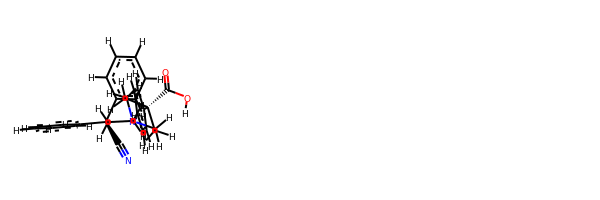

--------
bond
18.41570401539996 kJ/mol 18.41570401539996 kJ/mol True
angle
24.50248611474383 kJ/mol 24.50248611474383 kJ/mol True
nb
56.90606504727833 kJ/mol 56.90606504727833 kJ/mol True
torsion
37.08106155123834 kJ/mol 38.58503406838887 kJ/mol False
136.90531672866047 kJ/mol 138.409289245811 kJ/mol

DrugBank_1304
     RD


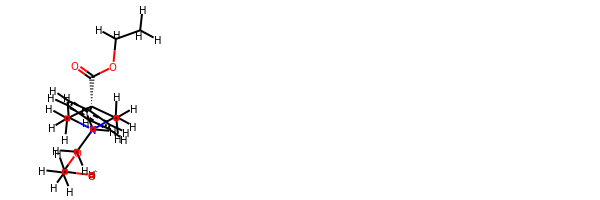

--------
bond
35.321610318424675 kJ/mol 35.321610318424675 kJ/mol True
angle
166.78713818739894 kJ/mol 166.78713818739894 kJ/mol True
nb
47.99199202356699 kJ/mol 47.99199202356699 kJ/mol True
torsion
86.50177218174167 kJ/mol 87.13108671996275 kJ/mol False
336.60251271113225 kJ/mol 337.23182724935333 kJ/mol

DrugBank_1308
     RD


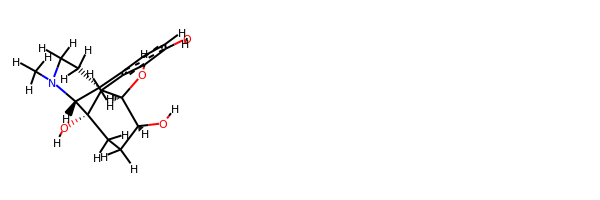

--------
bond
11.40566986630638 kJ/mol 11.40566986630638 kJ/mol True
angle
387.22080521051646 kJ/mol 387.22080521051646 kJ/mol True
nb
56.44115528616449 kJ/mol 56.44115528616449 kJ/mol True
torsion
83.85731135494444 kJ/mol 84.75969154187518 kJ/mol False
538.9249417179318 kJ/mol 539.8273219048625 kJ/mol

DrugBank_1310
     RD


--------
bond
18.5648249864671 kJ/mol 18.5648249864671 kJ/mol True
angle
21.501961667131056 kJ/mol 21.501961667131056 kJ/mol True
nb
69.17926056452457 kJ/mol 69.17926056452457 kJ/mol True
torsion
31.537083910660726 kJ/mol 33.041056427811256 kJ/mol False
140.78313112878345 kJ/mol 142.287103645934 kJ/mol

DrugBank_1312
     RD


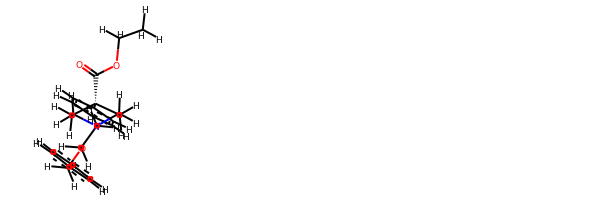

--------
bond
12.14580808106108 kJ/mol 12.14580808106108 kJ/mol True
angle
43.14792617140751 kJ/mol 43.14792617140751 kJ/mol True
nb
102.6939037201129 kJ/mol 102.6939037201129 kJ/mol True
torsion
62.93553021061772 kJ/mol 62.985522739461786 kJ/mol False
220.9231681831992 kJ/mol 220.9731607120433 kJ/mol

DrugBank_1313
     RD


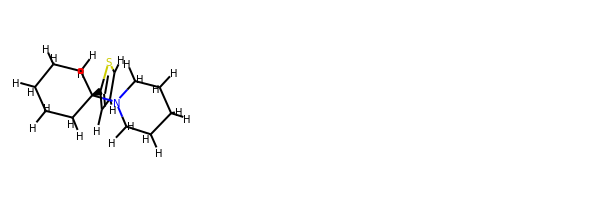

--------
bond
29.076352303626404 kJ/mol 29.076352303626404 kJ/mol True
angle
31.647222672847658 kJ/mol 31.647222672847658 kJ/mol True
nb
144.86313271052364 kJ/mol 144.86313271052364 kJ/mol True
torsion
44.02544594231951 kJ/mol 44.91078491361926 kJ/mol False
249.61215362931722 kJ/mol 250.49749260061697 kJ/mol

DrugBank_1315
     RD


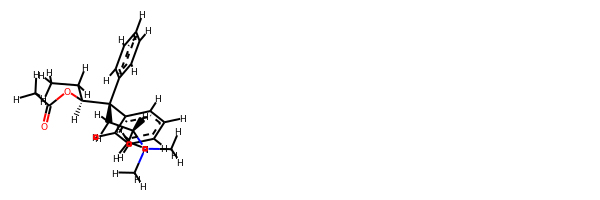

--------
bond
20.326430385557504 kJ/mol 20.326430385557504 kJ/mol True
angle
90.80620607991884 kJ/mol 90.80620607991884 kJ/mol True
nb
93.42651596501737 kJ/mol 93.42651596501737 kJ/mol True
torsion
19.378913593435115 kJ/mol 20.655842225114416 kJ/mol False
223.9380660239288 kJ/mol 225.2149946556081 kJ/mol

DrugBank_1316
     RD


--------
bond
4.73113819443702 kJ/mol 4.73113819443702 kJ/mol True
angle
380.4547330844815 kJ/mol 380.4547330844815 kJ/mol True
nb
28.985943461112292 kJ/mol 28.985943461112292 kJ/mol True
torsion
71.37376268540744 kJ/mol 72.27614287233818 kJ/mol False
485.54557742543824 kJ/mol 486.447957612369 kJ/mol

DrugBank_1318
     RD


--------
bond
32.264916660428554 kJ/mol 32.264916660428554 kJ/mol True
angle
316.950052039373 kJ/mol 316.950052039373 kJ/mol True
nb
361.5289345009242 kJ/mol 361.5289345009242 kJ/mol True
torsion
42.400952897028006 kJ/mol 43.78977046746608 kJ/mol False
753.1448560977537 kJ/mol 754.5336736681919 kJ/mol

DrugBank_1322
     RD


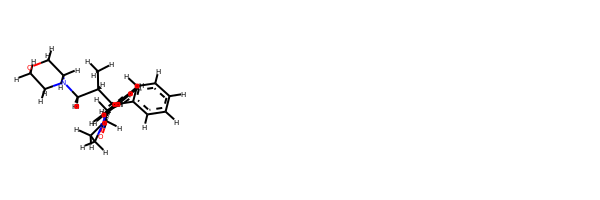

--------
bond
30.82627723652122 kJ/mol 30.82627723652122 kJ/mol True
angle
158.65511293266778 kJ/mol 158.65511293266778 kJ/mol True
nb
35.99757019777249 kJ/mol 35.99757019777249 kJ/mol True
torsion
72.3893876299417 kJ/mol 72.92025518670195 kJ/mol False
297.86834799690314 kJ/mol 298.39921555366345 kJ/mol

DrugBank_1324
     RD


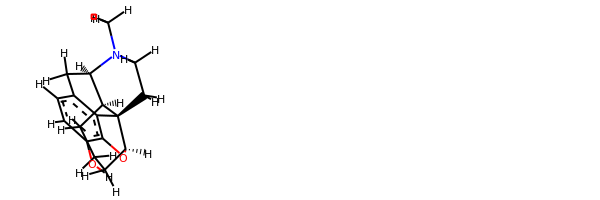

--------
bond
38.36431966547642 kJ/mol 38.36431966547642 kJ/mol True
angle
28.451816525193237 kJ/mol 28.451816525193237 kJ/mol True
nb
90.03966649795305 kJ/mol 90.03966649795305 kJ/mol True
torsion
66.64317478475859 kJ/mol 67.5074173179705 kJ/mol False
223.4989774733813 kJ/mol 224.3632200065932 kJ/mol

DrugBank_1328
     RD


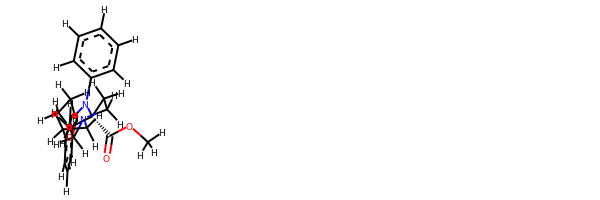

--------
bond
44.8425862298421 kJ/mol 44.8425862298421 kJ/mol True
angle
172.0140990924062 kJ/mol 172.0140990924062 kJ/mol True
nb
61.205012877600886 kJ/mol 61.205012877600886 kJ/mol True
torsion
95.16903229394954 kJ/mol 95.72889154425468 kJ/mol False
373.2307304937988 kJ/mol 373.7905897441039 kJ/mol

DrugBank_1331
     RD


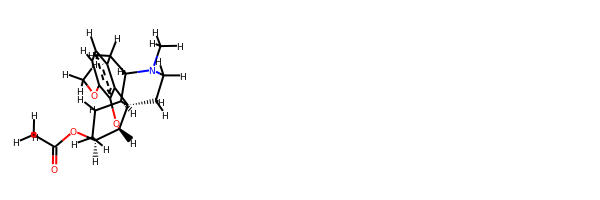

--------
bond
3.7019925759994075 kJ/mol 3.7019925759994075 kJ/mol True
angle
9.259193693470632 kJ/mol 9.259193693470632 kJ/mol True
nb
87.17084560114955 kJ/mol 87.17084560114955 kJ/mol True
torsion
29.41799224163186 kJ/mol 29.45214536883122 kJ/mol False
129.55002411225144 kJ/mol 129.5841772394508 kJ/mol

DrugBank_1332
     RD


--------
bond
26.55154088775182 kJ/mol 26.55154088775182 kJ/mol True
angle
37.93002055586143 kJ/mol 37.93002055586143 kJ/mol True
nb
97.00524091986533 kJ/mol 97.00524091986533 kJ/mol True
torsion
94.73067568047726 kJ/mol 95.17272385915214 kJ/mol False
256.21747804395585 kJ/mol 256.65952622263075 kJ/mol

DrugBank_1339
     RD


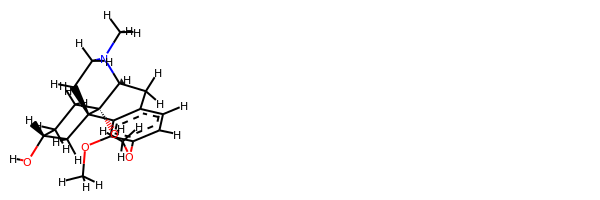

--------
bond
51.19345639116379 kJ/mol 51.19345639116379 kJ/mol True
angle
140.60939416763713 kJ/mol 140.60939416763713 kJ/mol True
nb
307.2663462361613 kJ/mol 307.2663462361613 kJ/mol True
torsion
319.11823688220437 kJ/mol 320.9238117562963 kJ/mol False
818.1874336771666 kJ/mol 819.9930085512585 kJ/mol

DrugBank_1340
     RD


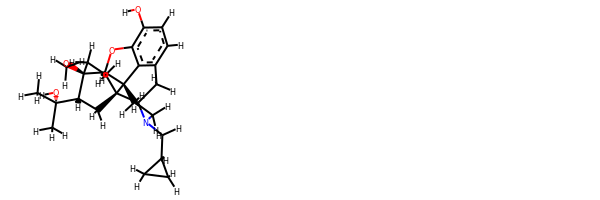

--------
bond
6.07215324458128 kJ/mol 6.07215324458128 kJ/mol True
angle
295.156001132617 kJ/mol 295.156001132617 kJ/mol True
nb
204.2891555188463 kJ/mol 204.2891555188463 kJ/mol True
torsion
59.529196887168844 kJ/mol 62.22851329723181 kJ/mol False
565.0465067832134 kJ/mol 567.7458231932764 kJ/mol

DrugBank_1341
     RD


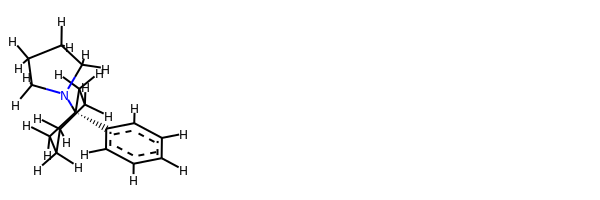

--------
bond
39.246762662699524 kJ/mol 39.246762662699524 kJ/mol True
angle
163.17851541611375 kJ/mol 163.17851541611375 kJ/mol True
nb
56.81311891417973 kJ/mol 56.81311891417973 kJ/mol True
torsion
82.85841163729766 kJ/mol 83.41827088760277 kJ/mol False
342.09680863029064 kJ/mol 342.65666788059576 kJ/mol

DrugBank_1343
     RD


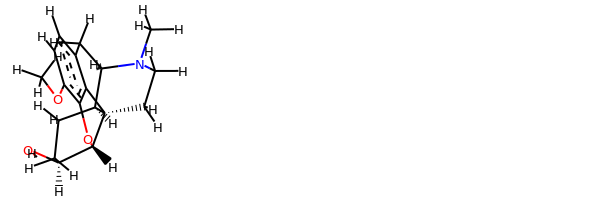

--------
bond
29.067756360920793 kJ/mol 29.067756360920793 kJ/mol True
angle
31.631369081776192 kJ/mol 31.631369081776192 kJ/mol True
nb
137.0821301429053 kJ/mol 137.0821301429053 kJ/mol True
torsion
56.71750591205576 kJ/mol 57.6028357791896 kJ/mol False
254.49876149765805 kJ/mol 255.38409136479189 kJ/mol

DrugBank_1346
     RD


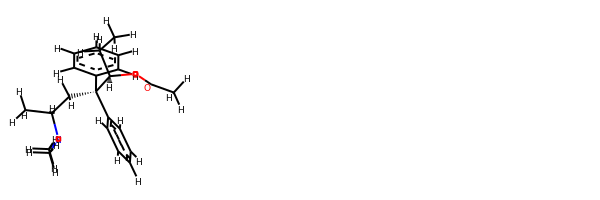

--------
bond
11.822353633651757 kJ/mol 11.822353633651757 kJ/mol True
angle
24.943054025344335 kJ/mol 24.943054025344335 kJ/mol True
nb
87.49384525612544 kJ/mol 87.49384525612544 kJ/mol True
torsion
33.5080695929707 kJ/mol 34.76087774096753 kJ/mol False
157.76732250809224 kJ/mol 159.02013065608907 kJ/mol

DrugBank_1353
     RD


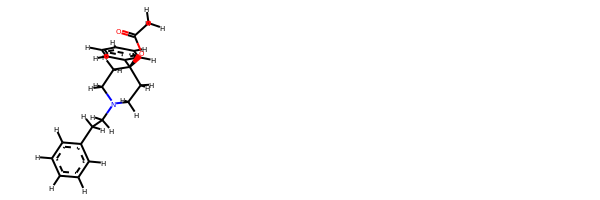

--------
bond
33.06850698455074 kJ/mol 33.06850698455074 kJ/mol True
angle
162.33444038540304 kJ/mol 162.33444038540304 kJ/mol True
nb
37.06019216718017 kJ/mol 37.06019216718017 kJ/mol True
torsion
82.85516912195648 kJ/mol 83.41502837226159 kJ/mol False
315.3183086590904 kJ/mol 315.87816790939553 kJ/mol

DrugBank_1356
     RD


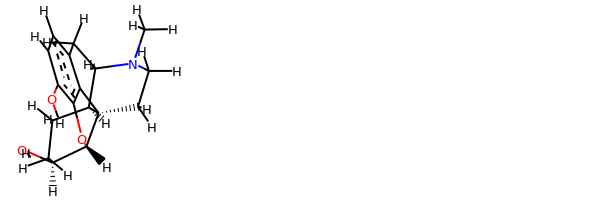

--------
bond
50.429232696831804 kJ/mol 59.79979870443691 kJ/mol False
angle
152.74411493297632 kJ/mol 152.74411493297632 kJ/mol True
nb
53.911349273013684 kJ/mol 53.911349273013684 kJ/mol True
torsion
81.6235431513645 kJ/mol 81.6235431513645 kJ/mol True
338.7082400541863 kJ/mol 348.0788060617914 kJ/mol

DrugBank_1359
     RD


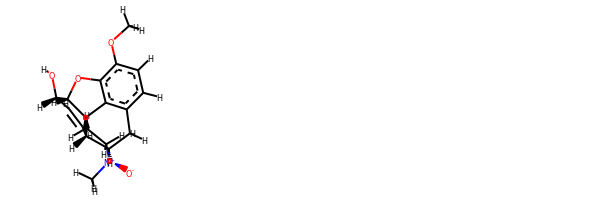

--------
bond
36.82660160702883 kJ/mol 36.82660160702883 kJ/mol True
angle
154.10355800225148 kJ/mol 154.10355800225148 kJ/mol True
nb
57.34148308282992 kJ/mol 57.34148308282992 kJ/mol True
torsion
86.40125421786477 kJ/mol 86.84863982908234 kJ/mol False
334.672896909975 kJ/mol 335.12028252119256 kJ/mol

DrugBank_1363
     RD


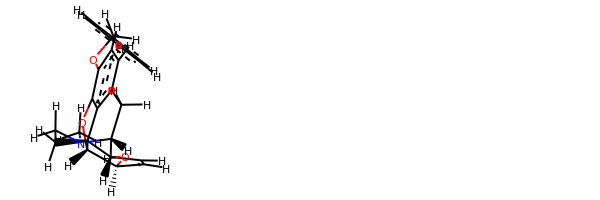

--------
bond
13.119079548599435 kJ/mol 13.119079548599435 kJ/mol True
angle
5.482168019126683 kJ/mol 5.482168019126683 kJ/mol True
nb
44.90780638683433 kJ/mol 44.90780638683433 kJ/mol True
torsion
13.3351318334609 kJ/mol 13.396521700098075 kJ/mol False
76.84418578802135 kJ/mol 76.90557565465852 kJ/mol

DrugBank_1367
     RD


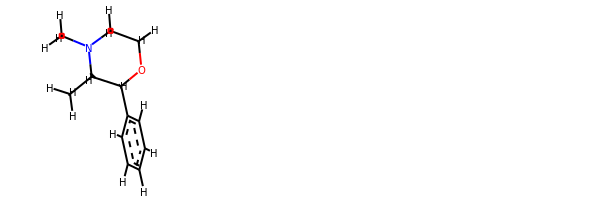

--------
bond
24.035394466428382 kJ/mol 24.035394466428382 kJ/mol True
angle
22.05473551166706 kJ/mol 22.05473551166706 kJ/mol True
nb
83.81556002468955 kJ/mol 83.81556002468955 kJ/mol True
torsion
98.66951610993202 kJ/mol 98.73716963471887 kJ/mol False
228.575206112717 kJ/mol 228.64285963750388 kJ/mol

DrugBank_1377
     RD


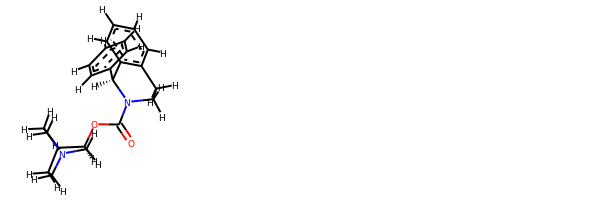

--------
bond
14.768310306325102 kJ/mol 14.768310306325102 kJ/mol True
angle
25.855214961942952 kJ/mol 25.855214961942952 kJ/mol True
nb
66.7406814548092 kJ/mol 66.7406814548092 kJ/mol True
torsion
34.18410741596505 kJ/mol 35.036512659986236 kJ/mol False
141.5483141390423 kJ/mol 142.40071938306352 kJ/mol

DrugBank_1393
     RD


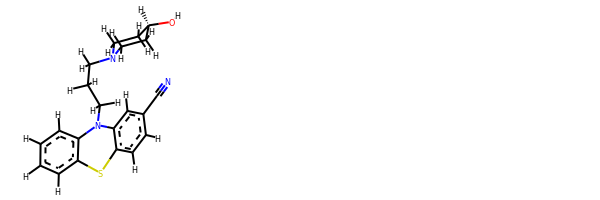

--------
bond
15.466136345390241 kJ/mol 15.466136345390241 kJ/mol True
angle
29.8398479166599 kJ/mol 29.8398479166599 kJ/mol True
nb
68.9573246944626 kJ/mol 68.9573246944626 kJ/mol True
torsion
17.99257442095513 kJ/mol 18.93172130132883 kJ/mol False
132.25588337746785 kJ/mol 133.19503025784155 kJ/mol

DrugBank_1399
     RD


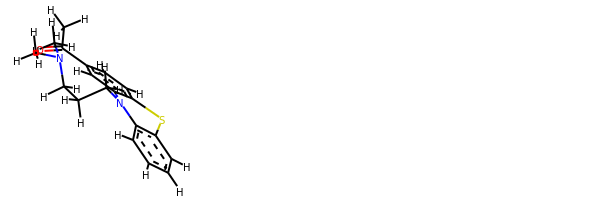

--------
bond
5.638819427181383 kJ/mol 5.638819427181383 kJ/mol True
angle
13.99293444638575 kJ/mol 13.99293444638575 kJ/mol True
nb
74.32161861299133 kJ/mol 74.32161861299133 kJ/mol True
torsion
15.964053126441518 kJ/mol 16.8930677775645 kJ/mol False
109.91742561299998 kJ/mol 110.84644026412296 kJ/mol

DrugBank_1401
     RD


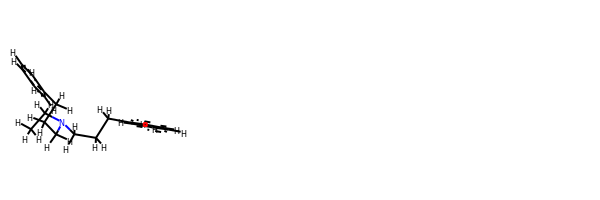

--------
bond
15.90981482605918 kJ/mol 15.90981482605918 kJ/mol True
angle
49.57566856131455 kJ/mol 49.57566856131455 kJ/mol True
nb
60.767806504590915 kJ/mol 60.767806504590915 kJ/mol True
torsion
119.51868224223455 kJ/mol 120.37417932874698 kJ/mol False
245.7719721341992 kJ/mol 246.62746922071162 kJ/mol

DrugBank_1405
     RD


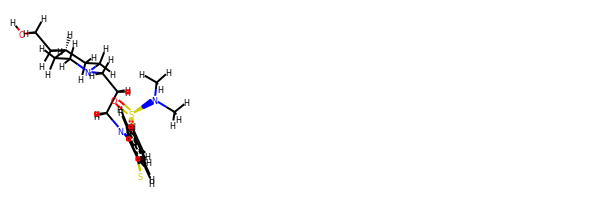

--------
bond
15.43762961513857 kJ/mol 15.43762961513857 kJ/mol True
angle
45.566676109480355 kJ/mol 45.566676109480355 kJ/mol True
nb
58.35436280042608 kJ/mol 58.35436280042608 kJ/mol True
torsion
108.09717596154823 kJ/mol 109.42090338007684 kJ/mol False
227.45584448659324 kJ/mol 228.77957190512186 kJ/mol

DrugBank_1406
     RD


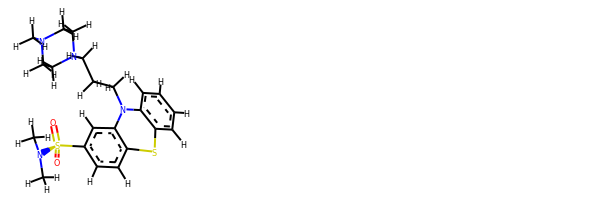

--------
bond
16.221317588124375 kJ/mol 16.221317588124375 kJ/mol True
angle
37.938658649991936 kJ/mol 37.938658649991936 kJ/mol True
nb
99.67390596863844 kJ/mol 99.67390596863844 kJ/mol True
torsion
116.1623876216391 kJ/mol 117.6111903695212 kJ/mol False
269.99626982839385 kJ/mol 271.44507257627595 kJ/mol

DrugBank_1407
     RD


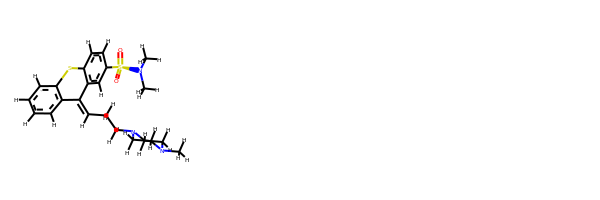

--------
bond
14.737583399456346 kJ/mol 14.737583399456346 kJ/mol True
angle
18.419382767711866 kJ/mol 18.419382767711866 kJ/mol True
nb
113.08855957368871 kJ/mol 113.08855957368871 kJ/mol True
torsion
47.69665236269233 kJ/mol 50.48659020901171 kJ/mol False
193.94217810354925 kJ/mol 196.73211594986864 kJ/mol

DrugBank_1408
     RD


--------
bond
2.3069977940863167 kJ/mol 2.3069977940863167 kJ/mol True
angle
2.022863612849683 kJ/mol 2.022863612849683 kJ/mol True
nb
23.462381727698958 kJ/mol 23.462381727698958 kJ/mol True
torsion
3.922209223795656 kJ/mol 7.542274572762744 kJ/mol False
31.714452358430613 kJ/mol 35.3345177073977 kJ/mol

DrugBank_1410
     RD


--------
bond
34.872756111826234 kJ/mol 34.872756111826234 kJ/mol True
angle
76.50289553760132 kJ/mol 76.50289553760132 kJ/mol True
nb
143.7670420058466 kJ/mol 143.7670420058466 kJ/mol True
torsion
134.60791741741212 kJ/mol 136.20617795224408 kJ/mol False
389.7506110726863 kJ/mol 391.3488716075183 kJ/mol

DrugBank_1414
     RD


--------
bond
154.7828340408786 kJ/mol 159.22478557561146 kJ/mol False
angle
382.57986169998003 kJ/mol 1268.5718264893867 kJ/mol False
nb
43.47038526696646 kJ/mol 43.47038526696646 kJ/mol True
torsion
18.162436084309768 kJ/mol 18.16243295351772 kJ/mol False
598.9955170921348 kJ/mol 1489.4294302854823 kJ/mol

DrugBank_1420
     RD


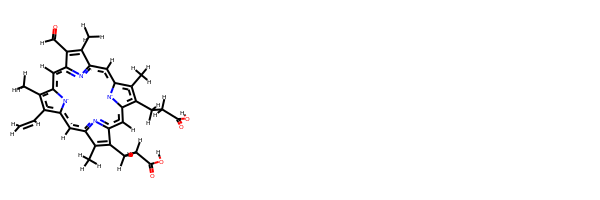

--------
bond
43.38002020238738 kJ/mol 43.38002020238738 kJ/mol True
angle
404.8957455803546 kJ/mol 404.8957455803546 kJ/mol True
nb
71.15013442141591 kJ/mol 71.15013442141591 kJ/mol True
torsion
102.78542163680349 kJ/mol 129.05533458997886 kJ/mol False
622.2113218409614 kJ/mol 648.4812347941368 kJ/mol

DrugBank_1499
     RD


--------
bond
4.123801013627019 kJ/mol 4.123801013627019 kJ/mol True
angle
115.98486507154914 kJ/mol 115.98486507154914 kJ/mol True
nb
24.126210999141485 kJ/mol 24.126210999141485 kJ/mol True
torsion
15.15071509231647 kJ/mol 16.313774769752474 kJ/mol False
159.3855921766341 kJ/mol 160.5486518540701 kJ/mol

DrugBank_1506
     RD


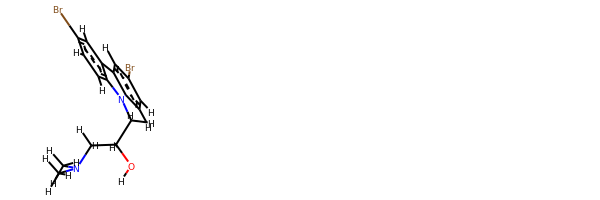

--------
bond
13.069056030127774 kJ/mol 21.179049817994198 kJ/mol False
angle
29.347408135238037 kJ/mol 29.347408135238037 kJ/mol True
nb
18.72479048621952 kJ/mol 18.72479048621952 kJ/mol True
torsion
24.74278657868567 kJ/mol 24.74278657868567 kJ/mol True
85.884041230271 kJ/mol 93.99403501813742 kJ/mol

DrugBank_1511
     RD


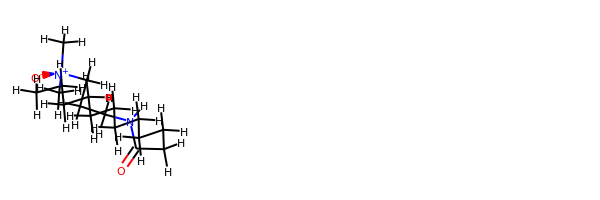

--------
bond
26.279267245672994 kJ/mol 35.341624355346426 kJ/mol False
angle
100.8626481732949 kJ/mol 100.8626481732949 kJ/mol True
nb
60.348589873170845 kJ/mol 60.348589873170845 kJ/mol True
torsion
46.29502310764125 kJ/mol 46.29502310764125 kJ/mol True
233.78552839978 kJ/mol 242.84788550945342 kJ/mol

DrugBank_1516
     RD


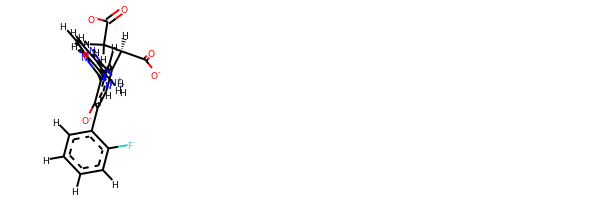

--------
bond
43.85648151961693 kJ/mol 78.39206895003868 kJ/mol False
angle
125.72924364205689 kJ/mol 125.72924364205689 kJ/mol True
nb
48.00397986442527 kJ/mol 48.00397986442527 kJ/mol True
torsion
118.17549573634965 kJ/mol 118.23714470890708 kJ/mol False
335.7652007624487 kJ/mol 370.36243716542793 kJ/mol

DrugBank_1522
     RD


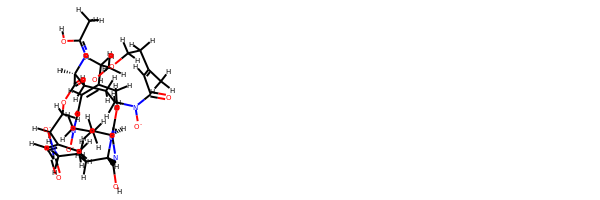

--------
bond
48.5317610509731 kJ/mol 48.5317610509731 kJ/mol True
angle
451.8143576297848 kJ/mol 451.8143576297848 kJ/mol True
nb
111.49197654711244 kJ/mol 111.49197654711244 kJ/mol True
torsion
129.25689932668604 kJ/mol 130.59592262902126 kJ/mol False
741.0949945545565 kJ/mol 742.4340178568916 kJ/mol

DrugBank_1538
     RD


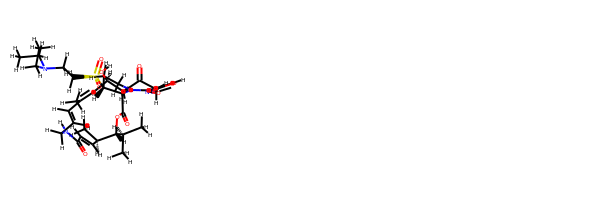

--------
bond
22.121336539749173 kJ/mol 14.955325578782775 kJ/mol False
angle
50.81730035962141 kJ/mol 56.395072621196434 kJ/mol False
nb
0.9199423531357339 kJ/mol -0.1674624830614861 kJ/mol False
torsion
6.846525946790031 kJ/mol 28.69469028358646 kJ/mol False
80.70510519929634 kJ/mol 99.8776260005042 kJ/mol

DrugBank_1543
     RD


--------
bond
29.681546396521888 kJ/mol 38.803341555427046 kJ/mol False
angle
442.23501663975435 kJ/mol 442.23501663975435 kJ/mol True
nb
23.14106663802545 kJ/mol 23.14106663802545 kJ/mol True
torsion
111.16296971332376 kJ/mol 111.16296971332376 kJ/mol True
606.2205993876254 kJ/mol 615.3423945465306 kJ/mol

DrugBank_1544
     RD


--------
bond
2.2676247972231365 kJ/mol 2.2676247972231365 kJ/mol True
angle
9.13616910584164 kJ/mol 9.13616910584164 kJ/mol True
nb
63.265690620728634 kJ/mol 63.265690620728634 kJ/mol True
torsion
28.07436358830515 kJ/mol 28.104109373699178 kJ/mol False
102.74384811209856 kJ/mol 102.77359389749259 kJ/mol

DrugBank_1571
     RD


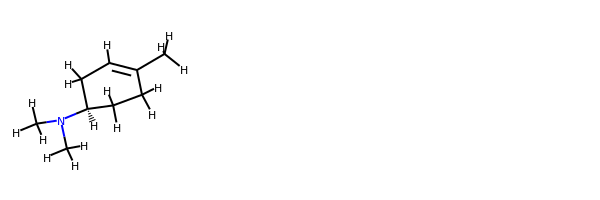

--------
bond
3.8975291753835406 kJ/mol 3.8975291753835406 kJ/mol True
angle
299.1080966038237 kJ/mol 299.1080966038237 kJ/mol True
nb
10.366130784349211 kJ/mol 10.366130784349211 kJ/mol True
torsion
67.5701407859282 kJ/mol 68.70481858284329 kJ/mol False
380.9418973494847 kJ/mol 382.07657514639976 kJ/mol

DrugBank_1584
     RD


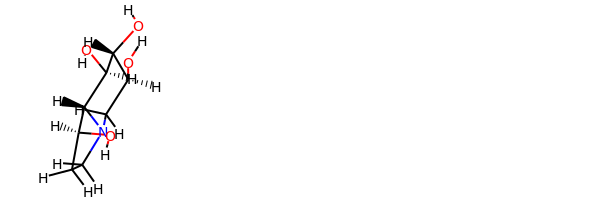

--------
bond
1.184964421404915 kJ/mol 1.184964421404915 kJ/mol True
angle
365.02277545466586 kJ/mol 365.02277545466586 kJ/mol True
nb
21.17787600007866 kJ/mol 21.17787600007866 kJ/mol True
torsion
55.7462019544627 kJ/mol 56.71990082449564 kJ/mol False
443.13181783061214 kJ/mol 444.10551670064507 kJ/mol

DrugBank_1639
     RD


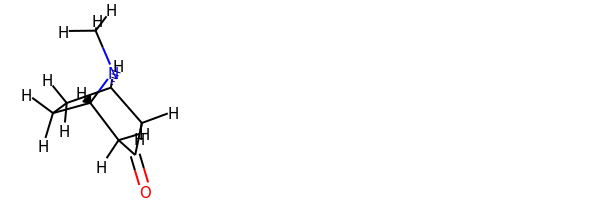

--------
bond
68.18096412720125 kJ/mol 77.96550034230096 kJ/mol False
angle
461.12026628104775 kJ/mol 461.12026628104775 kJ/mol True
nb
-2.9149735103788297 kJ/mol -2.9149735103788297 kJ/mol True
torsion
97.59436200465461 kJ/mol 97.59436200465461 kJ/mol True
623.9806189025248 kJ/mol 633.7651551176245 kJ/mol

DrugBank_1700
     RD


--------
bond
12.328421375388304 kJ/mol 12.328421375388304 kJ/mol True
angle
157.03022307960103 kJ/mol 157.03022307960103 kJ/mol True
nb
113.32787143307567 kJ/mol 113.32787143307567 kJ/mol True
torsion
47.347620463166194 kJ/mol 63.36330966297997 kJ/mol False
330.03413635123115 kJ/mol 346.04982555104493 kJ/mol

DrugBank_1721
     RD


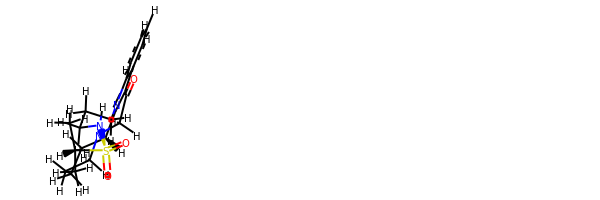

--------
bond
27.259809399563334 kJ/mol 27.259809399563334 kJ/mol True
angle
358.54749480518586 kJ/mol 358.54749480518586 kJ/mol True
nb
45.32109567481002 kJ/mol 45.32109567481002 kJ/mol True
torsion
87.25673569270398 kJ/mol 113.8152436947079 kJ/mol False
518.3851355722633 kJ/mol 544.9436435742672 kJ/mol

DrugBank_1763
     RD


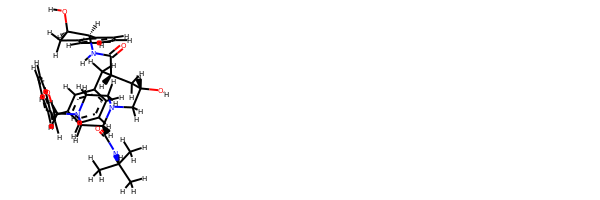

--------
bond
16.442214235105748 kJ/mol 16.442214235105748 kJ/mol True
angle
10.906075100980978 kJ/mol 10.906075100980978 kJ/mol True
nb
56.971053973559435 kJ/mol 56.971053973559435 kJ/mol True
torsion
40.13610718994989 kJ/mol 42.68811392938392 kJ/mol False
124.45545049959605 kJ/mol 127.00745723903007 kJ/mol

DrugBank_1769
     RD


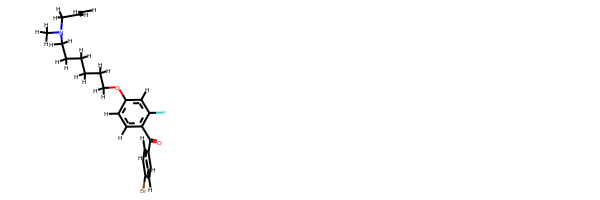

--------
bond
2.8950662364931827 kJ/mol 2.8950662364931827 kJ/mol True
angle
292.01503286311413 kJ/mol 292.01503286311413 kJ/mol True
nb
15.010125172223985 kJ/mol 15.010125172223985 kJ/mol True
torsion
60.98062930206828 kJ/mol 63.0896360949649 kJ/mol False
370.90085357389955 kJ/mol 373.00986036679615 kJ/mol

DrugBank_1787
     RD


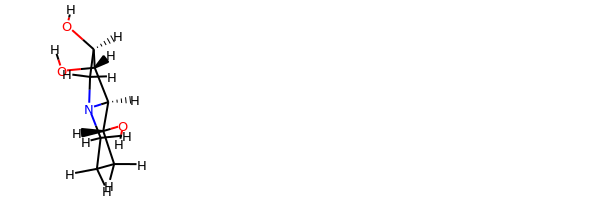

--------
bond
36.68553447190298 kJ/mol 36.71870666926899 kJ/mol False
angle
87.77439433962951 kJ/mol 87.77337383179123 kJ/mol False
nb
1.4768410072644134 kJ/mol 1.4768410072644134 kJ/mol True
torsion
21.98536638877206 kJ/mol 21.98519565720451 kJ/mol False
147.92213620756897 kJ/mol 147.95411716552917 kJ/mol

DrugBank_1800
     RD


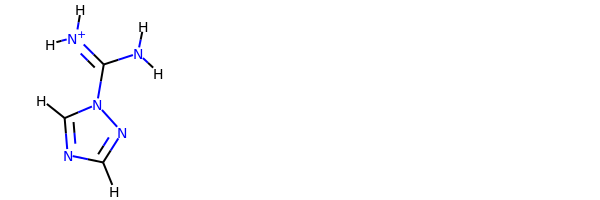

--------
bond
2.345852807885315 kJ/mol 2.345852807885315 kJ/mol True
angle
14.15850015802838 kJ/mol 14.15850015802838 kJ/mol True
nb
12.456411750569371 kJ/mol 12.456411750569371 kJ/mol True
torsion
2.198473654624898 kJ/mol 4.227813007915364 kJ/mol False
31.159238371107968 kJ/mol 33.188577724398435 kJ/mol

DrugBank_1831
     RD


--------
bond
27.369535368627865 kJ/mol 27.369535368627865 kJ/mol True
angle
63.55189479888896 kJ/mol 63.55189479888896 kJ/mol True
nb
81.26149896796842 kJ/mol 81.26149896796842 kJ/mol True
torsion
71.28444078611487 kJ/mol 78.42512554494398 kJ/mol False
243.4673699216001 kJ/mol 250.60805468042923 kJ/mol

DrugBank_1849
     RD


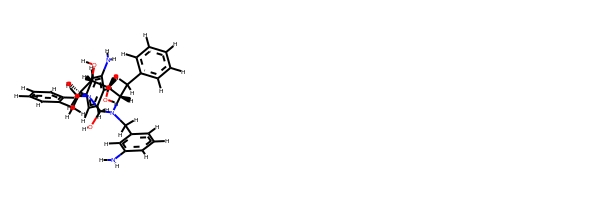

--------
bond
19.643295309337972 kJ/mol 19.643295309337972 kJ/mol True
angle
97.37799005606462 kJ/mol 97.37799005606462 kJ/mol True
nb
43.63368923256603 kJ/mol 43.63368923256603 kJ/mol True
torsion
40.455061406304665 kJ/mol 44.31460854788647 kJ/mol False
201.1100360042733 kJ/mol 204.9695831458551 kJ/mol

DrugBank_1885
     RD


--------
bond
11.724343006813776 kJ/mol 11.724343006813776 kJ/mol True
angle
40.14816650649524 kJ/mol 40.14816650649524 kJ/mol True
nb
9.748261628391385 kJ/mol 9.748261628391385 kJ/mol True
torsion
16.168414222156553 kJ/mol 16.16841422215655 kJ/mol False
77.78918536385696 kJ/mol 77.78918536385694 kJ/mol

DrugBank_1900
     RD


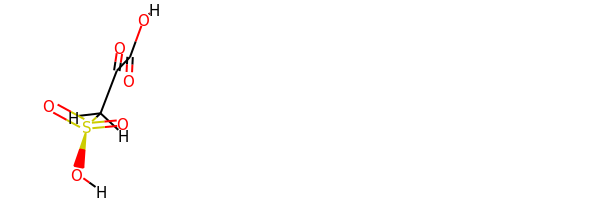

--------
bond
8.857261186597402 kJ/mol 8.857261186597402 kJ/mol True
angle
380.84153989688383 kJ/mol 380.84153989688383 kJ/mol True
nb
45.06312429769071 kJ/mol 45.06312429769071 kJ/mol True
torsion
85.06489267816787 kJ/mol 85.98771338766635 kJ/mol False
519.8268180593398 kJ/mol 520.7496387688383 kJ/mol

DrugBank_1904
     RD


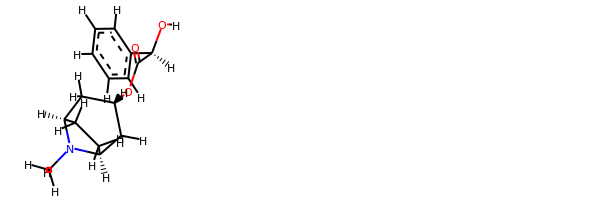

--------
bond
2.0187010926849576 kJ/mol 2.0187010926849576 kJ/mol True
angle
14.806030232640227 kJ/mol 14.806030232640227 kJ/mol True
nb
58.17337958198254 kJ/mol 58.17337958198254 kJ/mol True
torsion
3.020423938733786 kJ/mol 3.062259043657206 kJ/mol False
78.0185348460415 kJ/mol 78.06036995096493 kJ/mol

DrugBank_1910
     RD


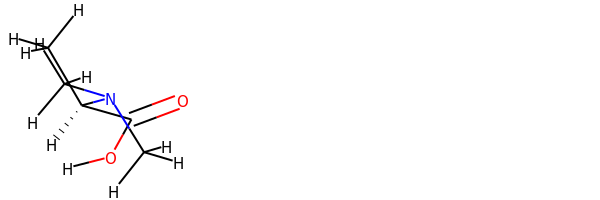

--------
bond
5.927108021984009 kJ/mol 5.927108021984009 kJ/mol True
angle
113.97587815661588 kJ/mol 113.97587815661588 kJ/mol True
nb
25.20058731298647 kJ/mol 25.20058731298647 kJ/mol True
torsion
11.50511760682473 kJ/mol 27.520702279515376 kJ/mol False
156.6086910984111 kJ/mol 172.62427577110174 kJ/mol

DrugBank_1933
     RD


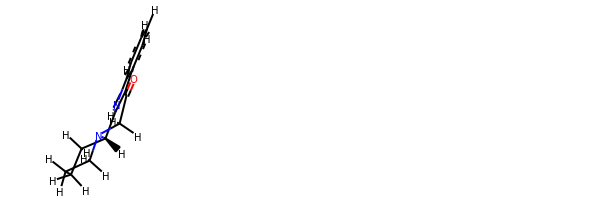

--------
bond
5.895998633740741 kJ/mol 5.895998633740741 kJ/mol True
angle
234.27701969417336 kJ/mol 234.27701969417336 kJ/mol True
nb
47.71568896767183 kJ/mol 47.71568896767183 kJ/mol True
torsion
21.420291001867135 kJ/mol 23.05406305954637 kJ/mol False
309.30899829745306 kJ/mol 310.9427703551323 kJ/mol

DrugBank_1949
     RD


--------
bond
19.71733984502685 kJ/mol 19.71733984502685 kJ/mol True
angle
19.227126372415125 kJ/mol 19.227126372415125 kJ/mol True
nb
15282.660842031813 kJ/mol 15282.660842031813 kJ/mol True
torsion
43.999103700804994 kJ/mol 48.16461672236255 kJ/mol False
15365.60441195006 kJ/mol 15369.769924971619 kJ/mol

DrugBank_1976
     RD


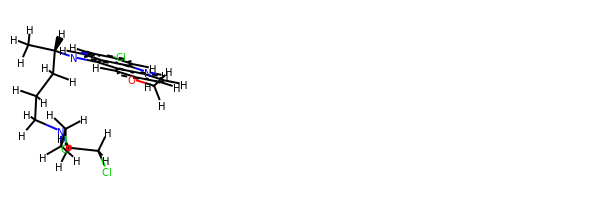

--------
bond
38.33115873555875 kJ/mol 38.33115873555875 kJ/mol True
angle
51.29892729494451 kJ/mol 51.29892729494451 kJ/mol True
nb
93.78438052224331 kJ/mol 93.78438052224331 kJ/mol True
torsion
152.81830161151578 kJ/mol 152.87999821417668 kJ/mol False
336.2327681642623 kJ/mol 336.2944647669233 kJ/mol

DrugBank_1979
     RD


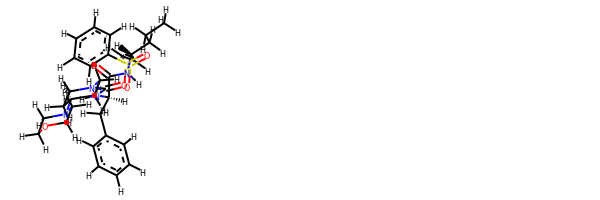

--------
bond
21.168225628903404 kJ/mol 30.271109386912872 kJ/mol False
angle
83.1056227575745 kJ/mol 83.1056227575745 kJ/mol True
nb
40.98405130202933 kJ/mol 40.98405130202933 kJ/mol True
torsion
23.02153586759049 kJ/mol 23.02153586759049 kJ/mol True
168.27943555609772 kJ/mol 177.38231931410718 kJ/mol

DrugBank_2019
     RD


--------
bond
80.07307213531327 kJ/mol 80.07307213531327 kJ/mol True
angle
257.3858942641265 kJ/mol 257.3858942641265 kJ/mol True
nb
22.535866084969058 kJ/mol 22.535866084969058 kJ/mol True
torsion
38.51199394152972 kJ/mol 39.45081789435139 kJ/mol False
398.5068264259386 kJ/mol 399.4456503787602 kJ/mol

DrugBank_2025
     RD


--------
bond
27.244075374294663 kJ/mol 27.21646580655409 kJ/mol False
angle
33.97153223488364 kJ/mol 34.0137306880037 kJ/mol False
nb
6.170430617144275 kJ/mol 6.170430617144275 kJ/mol True
torsion
65.10010915722539 kJ/mol 81.83613743378412 kJ/mol False
132.48614738354797 kJ/mol 149.23676454548618 kJ/mol

DrugBank_2029
     RD


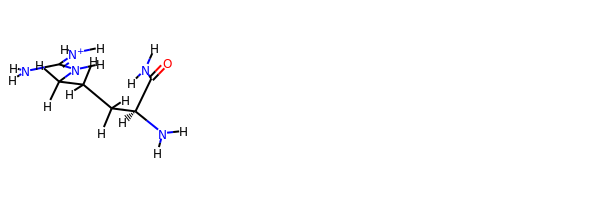

--------
bond
20.36394868256265 kJ/mol 20.36394868256265 kJ/mol True
angle
103.27075826623276 kJ/mol 103.27075826623276 kJ/mol True
nb
48.49942929312007 kJ/mol 48.49942929312007 kJ/mol True
torsion
47.46161864081437 kJ/mol 50.013625380248364 kJ/mol False
219.59575488272986 kJ/mol 222.14776162216384 kJ/mol

DrugBank_2068
     RD


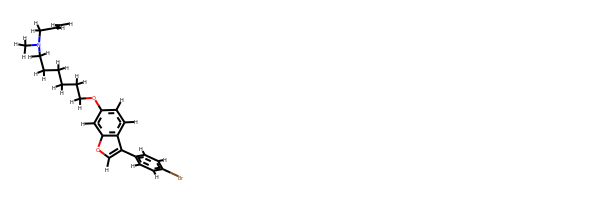

--------
bond
41.90370436315399 kJ/mol 41.90370436315399 kJ/mol True
angle
80.49804847656618 kJ/mol 80.49804847656618 kJ/mol True
nb
81.08324528905254 kJ/mol 81.08324528905254 kJ/mol True
torsion
8.066930905144714 kJ/mol 8.066930905144716 kJ/mol False
211.55192903391742 kJ/mol 211.55192903391745 kJ/mol

DrugBank_2087
     RD


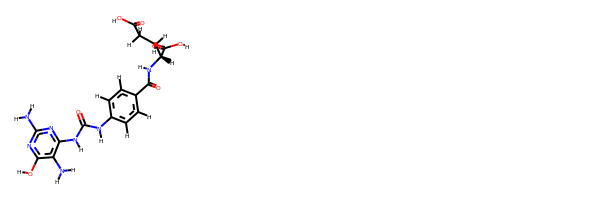

--------
bond
25.796486558943453 kJ/mol 25.796486558943453 kJ/mol True
angle
74.16660181808092 kJ/mol 74.16660181808092 kJ/mol True
nb
12.399126717972564 kJ/mol 12.399126717972564 kJ/mol True
torsion
36.335338691994544 kJ/mol 38.71689509123583 kJ/mol False
148.69755378699148 kJ/mol 151.07911018623278 kJ/mol

DrugBank_2097
     RD


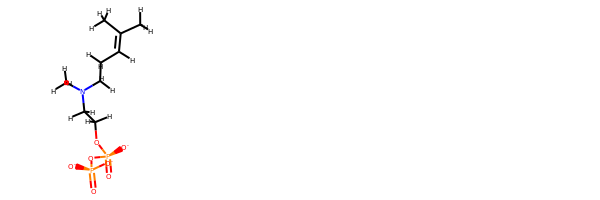

--------


In [ ]:
def compare_energies(rdkmol, oemol):
    if rdkmol == None:
        print("RDK parsing error")
        return False
#     print(Chem.MolToSmiles(rdkmol))
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol], verbose = False)
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol], verbose = False)

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
#     g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_oe, system_oe, system_oe, positions_oe, positions_oe, verbose = False,skip_assert = True)
    if(e1 == e2): return False
    for i in g1:
        print(i)
        print(g1[i], g2[i], g1[i] == g2[i])

    print( e1, e2)
    print('')
    return True

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/DrugBank_tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
# flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
# istream.SetFlavor( oechem.OEFormat_MOL2, flavor)
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oechem.OETriposAtomNames(mol)
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()

fout = open("/home/shuwang/tmp", "w")
counter = 0
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
#     rdkmol = Chem.MolFromMol2Block(mol2, sanitize = True, removeHs = False)
    rdkmol = Chem.MolFromMol2Block(mol2, sanitize = False, removeHs = False)
#     Chem.Kekulize(rdkmol)
    writeToFile = compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1
    if not writeToFile:        continue
    
    print(Chem.MolToMolBlock(rdkmol)[0:21])
    x = Draw.MolsToGridImage([rdkmol], kekulize = False)
    display(x)
    print("--------")
    fout.write(mol2)
fout.close()


In [ ]:
def compare_energies(rdkmol, oemol):
    if rdkmol == None:
        print "RDK parsing error"
        return
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol])
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol])

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
    if e1 == e2:
        return
#     for i in g1:
#         print g1[i] == g2[i]
#     print
    if not e1 < e2:
        print Chem.MolToMolBlock(rdkmol)
    

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"

mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/DrugBank_tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
istream.SetFlavor( oechem.OEFormat_MOL2, flavor)
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oechem.OETriposAtomNames(mol)
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()

counter = 0
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
    rdkmol = Chem.MolFromMol2Block(mol2,  removeHs = False)
    compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1
    


In [ ]:
def compare_energies(rdkmol, oemol):
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol])
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol])

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
    for i in g1:
        print g1[i] == g2[i]
    print e1, e2
    print

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"

mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()

counter = 0
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
    rdkmol = Chem.MolFromMol2Block(mol2,  removeHs = False)
    compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1
    
